In [13]:
import pandas as pd # загружаем необходимые библиотеки
import numpy as np
from pandas import json_normalize
import sys
import json
import ijson
import os
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import seaborn as sns
from scipy.stats import skew, kurtosis, kstest, shapiro, normaltest
from scipy.stats import skew, kurtosis
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import warnings
from typing import Dict, Optional

Государственные деньги у НКО.

 Есть дамп данных обо всех НКО России, в котором содержится информация о получении государственных грантов, госконтрактов и субсидий, регионе и датерегистрации, а также ОКВЭД (классификатор экономической деятельности). Задача—проверить, есть ли зависимость вероятности получения грантов от государства/госконтрактов: ➔ от региона регистрации организации; ➔ от возраста организации; ➔ от экономической деятельности организации. Пожеланиювыможетепровестилюбыедополнительныепроверкиисих помощью обогатить основные выводы.

Характеристики и расшифровки открытых данных
Anna Sakoyan edited this page on Dec 4, 2019 · 1 revision
addOkved: дополнительный ОКВЭД (тип: array, содержит элементы типа object)
addOkved.code: код дополнительного ОКВЭД(тип: string)
addOkved.name: расшифровка кода дополнительного ОКВЭД (тип: string)
addOkved.version: версия дополнительного ОКВЭД (тип: string)
address: юридический адрес (тип: string)
administrators: руководители организации (тип: array, содержит элементы типа object)
administrators.name: имя руководителя (тип: string)
administrators.title: должность руководителя (тип: string)
charter: ссылка на устав организации (тип: string, null)
dateLiquid: дата ликвидации юрлица (тип: string, null)
dateOgrn: дата присвоения ОГРН - начиная с 2002 года (тип: string)
dateReg: дата регистрации организаций - указывается только для организаций, зарегистрированных до 2002 года (тип: string, null)
egrulStatus: статус организации на основании данных ЕГРЮЛ. Варианты: Действует, Ликвидирована (тип: string)
email: email организации (тип: string, null)
foundersConfig: состав учредителей - только юрлица, только физлица или и те, и другие (тип: string, null)
fullName: полное наименование организации (тип: string)
hasRegionalSupport: наличие сведений о том, что организация была получателем региональной поддержки в качестве СО НКО (тип: boolean)
incomeDetail: детализация сведений о доходах (тип: object)
incomeDetail.contracts223: сведения о доходах от контрактации по 223-ФЗ (тип: object)
incomeDetail.contracts223.[ГОД]: сведения о доходах от контрактации по 223-ФЗ в ... году (тип: object)
incomeDetail.contracts223.[ГОД].count: число договоров по 223-ФЗ за ... год (тип: number)
incomeDetail.contracts223.[ГОД].sum: сумма договоров по 223-ФЗ за ... год (тип: number)
incomeDetail.contracts223.totalCount: общее число договоров по 223-ФЗ (тип: number)
incomeDetail.contracts223.totalSum: общая сумма договоров по 223-ФЗ (тип: number)
incomeDetail.contracts44: сведения о доходах от контрактации по 44-ФЗ (тип: object)
incomeDetail.contracts44.[ГОД]: сведения о доходах от контрактации по 44-ФЗ в ... году (тип: object)
incomeDetail.contracts44.[ГОД].count: число контрактов по 44-ФЗ за ... год (тип: number)
incomeDetail.contracts44.[ГОД].sum: сумма контрактов по 44-ФЗ за ... год (тип: number)
incomeDetail.contracts44.totalCount: общее число контрактов по 44-ФЗ (тип: number)
incomeDetail.contracts44.totalSum: общая сумма контрактов по 44-ФЗ (тип: number)
incomeDetail.contracts94: сведения о доходах от контрактации по 94-ФЗ (тип: object)
incomeDetail.contracts94.[ГОД]: сведения о доходах от контрактации по 94-ФЗ в ... году (тип: object)
incomeDetail.contracts94.[ГОД].count: число контрактов по 94-ФЗ за ... год (тип: number)
incomeDetail.contracts94.[ГОД].sum: сумма контрактов по 94-ФЗ за ... год (тип: number)
incomeDetail.contracts94.totalCount: общее число контрактов по 94-ФЗ (тип: number)
incomeDetail.contracts94.totalSum: общая сумма контрактов по 94-ФЗ (тип: number)
incomeDetail.fedSubsidies: сведения о соглашениях о предоставлении федеральных субсидий (тип: object)
incomeDetail.fedSubsidies.[ГОД]: сведения о соглашениях о предоставлении федеральных субсидий в ... году (тип: object)
incomeDetail.fedSubsidies.[ГОД].count: число соглашений за ... год (тип: number)
incomeDetail.fedSubsidies.[ГОД].sum: (полная, необязательно уже выплаченная) сумма соглашений за ... год (тип: number)
incomeDetail.fedSubsidies.totalCount: общее число соглашений (тип: number)
incomeDetail.fedSubsidies.totalSum: общая (полная, необязательно уже выплаченная) сумма соглашений (тип: number)
incomeDetail.grants: сведения о полученных президентских грантах (тип: object)
incomeDetail.grants.[ГОД]: сведения о полученных президентских грантах за ... год (тип: object)
incomeDetail.grants.[ГОД].count: число грантов за год (тип: number)
incomeDetail.grants.[ГОД].sum: сумма грантов за год (тип: number)
incomeDetail.grants.totalCount: общее число грантов (тип: number)
incomeDetail.grants.totalSum: общая сумма грантов (тип: number)
incomeRank: уровень дохода (тип: string)
incomeTotal: общая сумма доходов из известных источников - контрактов, договоров, президентских грантов, федеральных субсидий (тип: number)
inn: ИНН организации (тип: string, null)
kpp: КПП организации (тип: string, null)
logo: ссылка на изображение с логотипом организации (тип: string, null)
mainOkved: сведения об основном ОКВЭД (тип: object)
mainOkved.code: код основного ОКВЭД (тип: string, null)
mainOkved.name: расшифровка кода основного ОКВЭД (тип: string, null)
mainOkved.version: версия основного ОКВЭД (тип: string)
minjustForm: форма НКО, согласно системе Минюста РФ - УНРО (тип: string, null)
minjustRegNum: реестровый номер НКО в системе Минюста РФ - УНРО (тип: string, null)
minjustStatus: статус НКО в системе Минюста РФ - УНРО. Варианты: Исключена, Действует (тип: string, null)
ogrn: ОГРН организации (тип: string)
okato: сведения об ОКАТО (тип: object)
okato.code: код ОКАТО (тип: string, null)
okato.name: расшифровка кода ОКАТО (тип: string, null)
okfs: сведения об ОКФС (тип: object)
okfs.code: код ОКФС (тип: string, null)
okfs.name: расшифровка кода ОКФС (тип: string, null)
okogu: сведения об ОКОГУ (тип: object)
okogu.code: код ОКОГУ (тип: string, null)
okogu.name: расшифровка кода ОКОГУ (тип: string, null)
okpo: ОКПО (тип: string, null)
oktmo: сведения об ОКТМО (тип: object)
oktmo.code: код ОКТМО (тип: string, null)
oktmo.name: расшифровка кода ОКТМО (тип: string, null)
opf: сведения об организационно-правовой форме (ОПФ) организации на основании данных ЕГРЮЛ (тип: object)
opf.code: код ОПФ (тип: string, null)
opf.name: расшифровка кода ОПФ (тип: string)
opf.version: версия классификатора ОПФ (тип: string)
opfType: тип ОПФ - генерализованная категория организации, выведенная на основании ее ОПФ и формы по Минюсту РФ (тип: string)
regionCode: код региона организации (тип: string)
regionName: название региона организации (тип: string, null)
reports: отчеты организации, поданные в Минюст РФ (тип: array, содержит элементы типа object)
reports.localUrl: ссылка на PDF-копию отчета, размещенную на сервере проекта "Открытые НКО" (тип: string, null)
reports.minjustUrl: ссылка на PDF-копию отчета, размещенную на сайте УНРО Минюста РФ (тип: string)
reports.publishYear: год публикации отчета (тип: string)
reports.reportId: ID отчета (тип: string)
reports.reportYear: год отчета (тип: null)
reports.type: тип отчета (тип: string)
shortName: сокращенное наименование организации (тип: string, null)
socialMedia: сведения об учетных записях организации в соцсетях (тип: object)
socialMedia.facebook: адрес учетной записи в Facebook (тип: string, null)
socialMedia.instagram: адрес учетной записи в Instagram (тип: string, null)
socialMedia.ok: адрес учетной записи в "Одноклассниках" (тип: string, null)
socialMedia.twitter: адрес учетной записи в Twitter (тип: string, null)
socialMedia.vk: адрес учетной записи в VK (тип: string, null)
socialMedia.youtube: адрес канала на YouTube (тип: string, null)
website: домен вебсайта организации (тип: string, null)

Задача — проверить, есть ли зависимость вероятности получения грантов от государства/госконтрактов: ➔ от региона регистрации организации; ➔ от возраста организации; ➔ от экономической деятельности организации.

Если загружать все полные файлы json и соединять их, то получается очень большой датафрейм. Если загружать и обрабатывать файлы по отдельности, датасеты после пропусков и выбросов могут оказаться с разными свойствами. Поэтому будем загружать только те признаки, которые могут определять наши целевые признаки и признаки от которых надо искать зависимость вероятности, а также признаки определяющие однозначно НКО. После изучения представленной структуры json файлов, были отобраны следующие признаки.

'dateReg',
'minjustForm',
'ogrn',
'egrulStatus',
'mainOkved.code',
'regionCode',
'incomeTotal',
'incomeDetail',
'totalSum',
'originDate',
'dateLiquid',
'address',
'hasRegionalSupport',
'dateOgrn'

In [14]:
# Directory containing JSON files
# Пытался загрузить все дампы одновременно. Машина не потянула. Всё очень долго. Не хватает памяти.
'''
json_dir = './data'

# List to store processed rows
rows = []

# Loop through each file
for filename in os.listdir(json_dir):
    if filename.endswith('.json'):
        file_path = os.path.join(json_dir, filename)
        
        # Process each file incrementally
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                # Parse each line as a JSON object
                item = json.loads(line)
                
                # Append to the list
                rows.append(item)
# далее не хватает памяти остается список словарей rows


###########
# Convert the list of rows into a DataFrame
# Use json_normalize to handle nested structures
combined_df = pd.json_normalize(rows)

# Handle null columns (e.g., drop columns with all nulls)
combined_df.dropna(axis=1, how='all', inplace=True)

# Save the combined dataset to a file (optional)
combined_df.to_csv('./data/combined_dataset_f.csv', index=False)

print("Combined dataset shape:", combined_df.shape)
print("Columns in the DataFrame:", combined_df.columns)'''

'\njson_dir = \'./data\'\n\n# List to store processed rows\nrows = []\n\n# Loop through each file\nfor filename in os.listdir(json_dir):\n    if filename.endswith(\'.json\'):\n        file_path = os.path.join(json_dir, filename)\n        \n        # Process each file incrementally\n        with open(file_path, \'r\', encoding=\'utf-8\') as f:\n            for line in f:\n                # Parse each line as a JSON object\n                item = json.loads(line)\n                \n                # Append to the list\n                rows.append(item)\n# далее не хватает памяти остается список словарей rows\n\n\n###########\n# Convert the list of rows into a DataFrame\n# Use json_normalize to handle nested structures\ncombined_df = pd.json_normalize(rows)\n\n# Handle null columns (e.g., drop columns with all nulls)\ncombined_df.dropna(axis=1, how=\'all\', inplace=True)\n\n# Save the combined dataset to a file (optional)\ncombined_df.to_csv(\'./data/combined_dataset_f.csv\', index=False)

In [15]:
# Практически тот же код. Только предварительно создаёт список путей к файлам.
# Если сразу объединить все файлы
# сделаем список file_paths json файлов с относительным путем
# Директория с JSON-файлами
# json_dir = './data'
# # Создание списка путей к файлам
# file_paths = [os.path.join(json_dir, filename) for filename in os.listdir(json_dir) if filename.endswith('.json')]
# # Список для хранения данных
# rows = []
# # Проход по всем файлам в директории
# for filepath in file_paths:
# # Чтение JSON-файла
#    with open(filepath, 'r', encoding='utf-8') as f:
#       for line in f:
#         # Парсинг каждой строки как JSON-объекта
#         item = json.loads(line)
#         rows.append(item)
     
# Преобразование списка в DataFrame с разворачиванием вложенных структур
#comb_df = pd.json_normalize(rows)

# Сохранение результата в CSV (опционально)
#comb_df.to_csv('./data/combined_data.csv', index=False)

#print("Combined DataFrame shape:", comb_df.shape)

Загружаем данные

In [16]:
# 1. Работаем с каждым файлом отдельно. В датасетах более, чем достаточное к-во экземпляров для ML.
# Явно задавая его имя.
# Читаем json для одного файла
rows = []

# Чтение single JSON-файла построчно
with open('./data/ngo_dump_01.json', 'r', encoding='utf-8') as f:
    for line in f:
        item = json.loads(line)
        rows.append(item)

In [17]:
# 2
# Ключи, которые нужно оставить
keys_to_keep = {'dateReg',
'minjustForm',
'ogrn',
'egrulStatus',
'mainOkved',
'addOkved',
'regionCode',
'incomeTotal',
'incomeDetail',
'originDate',
'dateLiquid',
'address',
'hasRegionalSupport',
'dateOgrn'}
new_rowss = []
# Создание нового словаря с нужными ключами
for rowss in rows:
   filtered_data = {key: rowss[key] for key in keys_to_keep}
   new_rowss.append(filtered_data)
# Вывод результата

In [18]:
#3 с разворачиванием сложных структур
df = pd.json_normalize(new_rowss)

In [19]:
df.shape

(50000, 111)

In [20]:
# Выполняется 1 раз.
# Начальная обработка датафрейма
# Удалим столбцы полностью пустые,
#df.loc[:, :].dropna(axis=1, how='all', inplace=True)
# Оставим след. столбцы
col_ch=['ogrn',
 'regionCode',
 'hasRegionalSupport',
 'minjustForm',
 'address',
 'incomeTotal',
 'egrulStatus',
 'dateOgrn.$date',
 'mainOkved.name',
 'mainOkved.code',
 'addOkved',
 'incomeDetail.grants.totalCount',
 'incomeDetail.grants.totalSum',
 'incomeDetail.fedSubsidies.totalCount',
 'incomeDetail.fedSubsidies.totalSum',
 'incomeDetail.contracts44.totalCount',
 'incomeDetail.contracts44.totalSum',
 'incomeDetail.contracts223.totalCount',
 'incomeDetail.contracts223.totalSum',
 'incomeDetail.contracts94.totalCount',
 'incomeDetail.contracts94.totalSum',
 'originDate.$date',
 'dateLiquid.$date',
 'dateReg.$date']
# Оставим след. столбцы после обработки 'incomeDetail.contracts.totalCount'
col_ch_contracts=['ogrn',
 'regionCode',
 'hasRegionalSupport',
 'minjustForm',
 'address',
 'incomeTotal',
 'egrulStatus',
 'dateOgrn.$date',
 'mainOkved.name',
 'mainOkved.code',
 'addOkved',
 'incomeDetail.grants.totalCount',
 'incomeDetail.grants.totalSum',
 'incomeDetail.fedSubsidies.totalCount',
 'incomeDetail.fedSubsidies.totalSum',
 'incomeDetail.contracts.totalCount',
 'incomeDetail.contracts.totalSum',
 'originDate.$date',
 'dateLiquid.$date',
 'dateReg.$date']
# Предварительный Датафрейм с номерными контрактами ex: 'incomeDetail.contracts44.totalSum'
df = df[col_ch]
# Соберем данные номерных контрактов в общие колонки
df.loc[:, 'incomeDetail.contracts.totalSum'] = df.loc[:, 'incomeDetail.contracts44.totalSum'] + \
			df.loc[:, 'incomeDetail.contracts223.totalSum'] + df.loc[:, 'incomeDetail.contracts94.totalSum']
df.loc[:, 'incomeDetail.contracts.totalCount'] = df.loc[:, 'incomeDetail.contracts44.totalCount'] + \
			df.loc[:, 'incomeDetail.contracts223.totalCount'] + df.loc[:, 'incomeDetail.contracts94.totalCount']
# Посчитаем количество дополнительных Видов деятельности, как длина списка в 'addOkved'
df['addOkved'] = df['addOkved'].apply(len)
# окончательный рабочий Датафрейм с нужными столбцами
df = df[col_ch_contracts]
# переименуем колонки для удобства
df.rename(columns={
    'dateOgrn.$date': 'ogrnDate',
    'mainOkved.name': 'mainOkvedName',
    'mainOkved.code': 'mainOkvedCode',
    'addOkved': 'addOkvedCount',
    'incomeDetail.grants.totalCount' : 'grantsCount',
	'incomeDetail.grants.totalSum' : 'grantsSum',
	'incomeDetail.fedSubsidies.totalCount' : 'fedSubsCount',
	'incomeDetail.fedSubsidies.totalSum': 'fedSubsSum',
	'incomeDetail.contracts.totalCount' : 'contrCount',
	'incomeDetail.contracts.totalSum' : 'contrSum',
 	'originDate.$date' : 'originDate',
	'dateLiquid.$date' : 'liquidDate',
 	'dateReg.$date' : 'regDate'
}, inplace=True)

In [21]:
# Пропуски в df
cols_null_persent = df.isnull().mean() * 100
cols_with_null = cols_null_persent[cols_null_persent>0].sort_values(ascending=False)
display(cols_with_null)

regDate          65.138
liquidDate       55.262
mainOkvedName    18.434
mainOkvedCode    18.434
minjustForm       8.714
dtype: float64

In [22]:
# Обработаем столбцы с датами
def date_feature(df, column_name):
    """
    Преобразует столбец с датами в формате строки ('YYYY-MM-DDTHH:MM:SS.sssZ') в формат datetime.
	Оставляем только дату.
    Параметры:
    - df: DataFrame, содержащий столбец с датами.
    - column_name: Имя столбца, который нужно преобразовать.

    Возвращает:
    - DataFrame с преобразованным столбцом.
    """
    # Преобразуем столбец в формат datetime
    df[column_name] = pd.to_datetime(
        df[column_name],
        format='%Y-%m-%dT%H:%M:%S.%fZ',  # Указываем формат строки
        errors='coerce'  # Некорректные значения заменяем на NaT
   											).dt.date
    
    return df
# Обрабатываем столбцы с датами
col_date = ['ogrnDate',
            'originDate',
 				'liquidDate',
 				'regDate']
# Цикл по колонкам с датами. Даты преобразуем в datetime (дата без времени)
for col in col_date:
	df = date_feature(df, col)
# Разберемся с датами. 
# Для определения возравста НКО, необходимо знать дату начала и конца работы НКО
# Дату окончания выберем или dateLiquid или (если она NaT)- '2021-08-26' - дата последней актуальности
# Дату начала наименьшую из originDate, regDate, ogrnDate
# Создадим признак nkoAge_days, равный разности даты начала и окончания.
# Задаем дату по умолчанию для dateLiquid, если он NaT
default_date = pd.Timestamp('2021-08-26')
# Вычисляем наименьшую дату из 'originDate', 'regDate', 'ogrnDate', исключая NaT. Если все же все три даты 
# для вычисления начала - NaT то результат Nat.
#df['min_date'] = df[['originDate', 'regDate', 'ogrnDate']].apply(lambda row: min(x for x in row if pd.notna(x)), axis=1)
df['min_date'] = df[['originDate', 'regDate', 'ogrnDate']].apply(
    lambda row: min(x for x in row if pd.notna(x)) if any(pd.notna(x) for x in row) else pd.NaT, axis=1)
# Преобразуем liquidDate в datetime64[ns]
df['liquidDate'] = pd.to_datetime(df['liquidDate'])
# Заполняем пропущенные значения в liquidDate датой актуальности
df['liquidDate'] = df['liquidDate'].fillna(default_date)
# Преобразуем min_date в datetime64[ns] также
df['min_date'] = pd.to_datetime(df['min_date'])
# Вычисляем разницу и переводим в дни
df['nkoAge_days'] = (df['liquidDate'] - df['min_date']).dt.days
# удалим вспомагат. признак 'min_date'и 'regDate' он повторяет originDate но имеет пропуски
df.drop(['min_date'], axis=1, inplace=True)
df.drop(['ogrnDate'], axis=1, inplace=True)
df.drop(['originDate'], axis=1, inplace=True)
df.drop(['liquidDate'], axis=1, inplace=True)
df.drop(['regDate'], axis=1, inplace=True)  
#regDate and other date cols тоже надо удалить

In [23]:
def process_categorical_feature(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """
    Process categorical features in DataFrame according to specific rules.
    
    Args:
        df: Input DataFrame
        column_name: Name of the column to process
        
    Returns:
        Processed DataFrame
    """
    if column_name == 'egrulStatus':
        df[column_name] = (df[column_name] == 'Действует').astype('int8')
        
    elif column_name == 'hasRegionalSupport':
        df[column_name] = df[column_name].astype('int8')
        
    elif column_name == 'regionCode':
        df = _process_region_code(df)
        
    elif column_name == 'ogrn':
        df = _process_ogrn(df)
        
    elif column_name == 'minjustForm':
        df = _process_minjust_form(df)
        
    elif column_name == 'mainOkvedName':
        df = _process_okved_data(df)
        
    return df


def _process_region_code(df: pd.DataFrame) -> pd.DataFrame:
    """Process region code column."""
    if df['regionCode'].isna().any() or (df['regionCode'] == '').any():
        df = _fill_missing_region_codes(df)
    df['regionCode'] = df['regionCode'].astype('category')
    return df


def _process_ogrn(df: pd.DataFrame) -> pd.DataFrame:
    """Process OGRN column."""
    if df['ogrn'].isna().any() or (df['ogrn'] == '').any():
        df = df.dropna(subset=['ogrn'])
        df = df[df['ogrn'] != '']
    df['ogrn'] = df['ogrn'].astype('category')
    return df


def _process_minjust_form(df: pd.DataFrame) -> pd.DataFrame:
    """Process minjust form column."""
    if df['minjustForm'].isna().any() or (df['minjustForm'] == '').any():
        mode_val = df['minjustForm'].mode()[0]
        df['minjustForm'] = df['minjustForm'].fillna(mode_val)
        df['minjustForm'] = df['minjustForm'].replace('', mode_val)
    df['minjustForm'] = df['minjustForm'].astype('category')
    return df


def _process_okved_data(df: pd.DataFrame) -> pd.DataFrame:
    """Process OKVED related columns."""
    okved_columns = ['mainOkvedCode', 'mainOkvedName']
    
    if (df[okved_columns].isna().any().any() or 
        (df[okved_columns] == '').any().any()):
        
        df['mainOkvedCode'] = df['mainOkvedCode'].fillna('0.0')
        df['mainOkvedName'] = df['mainOkvedName'].fillna('Unknown')
        df['mainOkvedCode'] = df['mainOkvedCode'].replace('', '0.0')
        df['mainOkvedName'] = df['mainOkvedName'].replace('', 'Unknown')
        
        df.loc[df['mainOkvedCode'] == '0.0', 'addOkvedCount'] = 0
    
    df['mainOkvedCode'] = df['mainOkvedCode'].astype('category')
    df['mainOkvedName'] = df['mainOkvedName'].astype('category')
    return df


def _fill_missing_region_codes(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing region codes based on address."""
    REGION_CODES = {
        "Республика Адыгея": "01",
			"Республика Башкортостан": "02",
			"Республика Бурятия": "03",
			"Республика Алтай": "04",
			"Республика Дагестан": "05",
			"Республика Ингушетия": "06",
			"Кабардино-Балкарская Республика": "07",
			"Республика Калмыкия": "08",
			"Карачаево-Черкесская Республика": "09",
			"Республика Карелия": "10",
			"Республика Коми": "11",
			"Республика Крым": "91",
			"Республика Марий Эл": "12",
			"Республика Мордовия": "13",
			"Республика Саха (Якутия)": "14",
			"Республика Северная Осетия - Алания": "15",
			"Республика Татарстан": "16",
			"Республика Тыва": "17",
			"Удмуртская Республика": "18",
			"Республика Хакасия": "19",
			"Чеченская Республика": "20",
			"Чувашская Республика": "21",
			"Алтайский край": "22",
			"Краснодарский край": "23",
			"Красноярский край": "24",
			"Приморский край": "25",
			"Ставропольский край": "26",
			"Хабаровский край": "27",
			"Амурская область": "28",
			"Архангельская область": "29",
			"Астраханская область": "30",
			"Белгородская область": "31",
			"Брянская область": "32",
			"Владимирская область": "33",
			"Волгоградская область": "34",
			"Вологодская область": "35",
			"Воронежская область": "36",
			"Ивановская область": "37",
			"Иркутская область": "38",
			"Калининградская область": "39",
			"Калужская область": "40",
			"Камчатский край": "41",
			"Кемеровская область": "42",
			"Кировская область": "43",
			"Костромская область": "44",
			"Курганская область": "45",
			"Курская область": "46",
			"Ленинградская область": "47",
			"Липецкая область": "48",
			"Магаданская область": "49",
			"Московская область": "50",
			"Мурманская область": "51",
			"Нижегородская область": "52",
			"Новгородская область": "53",
			"Новосибирская область": "54",
			"Омская область": "55",
			"Оренбургская область": "56",
			"Орловская область": "57",
			"Пензенская область": "58",
			"Пермский край": "59",
			"Псковская область": "60",
			"Ростовская область": "61",
			"Рязанская область": "62",
			"Самарская область": "63",
			"Саратовская область": "64",
			"Сахалинская область": "65",
			"Свердловская область": "66",
			"Смоленская область": "67",
			"Тамбовская область": "68",
			"Тверская область": "69",
			"Томская область": "70",
			"Тульская область": "71",
			"Тюменская область": "72",
			"Ульяновская область": "73",
			"Челябинская область": "74",
			"Забайкальский край": "75",
			"Ярославская область": "76",
			"Москва": "77",
			"Санкт-Петербург": "78",
			"Еврейская автономная область": "79",
			"Ненецкий автономный округ": "83",
			"Ханты-Мансийский автономный округ - Югра": "86",
			"Чукотский автономный округ": "87",
			"Ямало-Ненецкий автономный округ": "89",
			"Севастополь": "92"
    }
    
    def find_region_code(address: str) -> Optional[str]:
        if not isinstance(address, str):
            return None
        for region, code in REGION_CODES.items():
            if region.lower() in address.lower():
                return code
        return None
    
    mask = df['regionCode'].isna() | (df['regionCode'] == '')
    df.loc[mask, 'regionCode'] = df.loc[mask, 'address'].apply(find_region_code)
    
    # Remove rows where regionCode is still missing or empty
    df = df[~df['regionCode'].isna() & (df['regionCode'] != '')]
    return df


# Example usage
if __name__ == "__main__":
    categorical_columns = [
        'egrulStatus',
        'hasRegionalSupport',
        'regionCode', 
        'ogrn',
        'minjustForm',
        'mainOkvedName'
    ]
    
    for col in categorical_columns:
        df = process_categorical_feature(df, col)

In [24]:
df.isna().sum()

ogrn                  0
regionCode            0
hasRegionalSupport    0
minjustForm           0
address               0
incomeTotal           0
egrulStatus           0
mainOkvedName         0
mainOkvedCode         0
addOkvedCount         0
grantsCount           0
grantsSum             0
fedSubsCount          0
fedSubsSum            0
contrCount            0
contrSum              0
nkoAge_days           0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ogrn                50000 non-null  category
 1   regionCode          50000 non-null  category
 2   hasRegionalSupport  50000 non-null  int8    
 3   minjustForm         50000 non-null  category
 4   address             50000 non-null  object  
 5   incomeTotal         50000 non-null  float64 
 6   egrulStatus         50000 non-null  int8    
 7   mainOkvedName       50000 non-null  category
 8   mainOkvedCode       50000 non-null  category
 9   addOkvedCount       50000 non-null  int64   
 10  grantsCount         50000 non-null  int64   
 11  grantsSum           50000 non-null  float64 
 12  fedSubsCount        50000 non-null  int64   
 13  fedSubsSum          50000 non-null  float64 
 14  contrCount          50000 non-null  int64   
 15  contrSum            50000 non-null  

Нас интересуют признаки nkoAge_days (int), regionCode (catecory), mainOkvedCode (categoru), addOkvedCount (category).
Признаки для целевой переменной:
 
 grantsCount  int64         
 grantsSum    float64      
 fedSubsCount int64         
 fedSubsSum   float64       
 contrCount   int64         
 contrSum	  float64

 Исследуем данные признаки на выбросы и дубликаты.
 

Дубликаты. ОГРН- уникальны с ним нет дупликатов. Если ЕГРН не учитывать нашлось 0.17% дупликатов. С одной стороны это не много, с другой эти записи, дествительно, подозрительные - в них все поля равны кроме ОГРН. Я решил избавиться от них. Проверка дизбаланса. Создание признаков getFunds и log_income.

In [26]:
# выполнять 1 раз. Второй раз не будет дубликатов.
# Проверим на дубликаты. И признаки 'getFunds', 'log_income'.
dupl_columns = list(df.columns)
# огрн не повторяются. Проверим бе учета огрн.
dupl_columns.remove('ogrn')

mask = df.duplicated(subset=dupl_columns)
df_duplicates = df[mask]
print(f'Число найденных дубликатов: {df_duplicates.shape[0]}')
df_dedupped = df.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {df_dedupped.shape[0]}')
# рабочий датафрейм без дубликатов.
df = df_dedupped.copy()
# оценим размер групп.
print(f"Группа не получивших финансы {df[df['incomeTotal'] == 0.0].shape[0]}")
print(f"Группа получивших финансы {df[df['incomeTotal'] > 0.0].shape[0]}")
# Закодируем 1/0 признак 'getFunds' - получены или нет фонды.
df['getFunds'] = df['incomeTotal'].gt(0).astype(np.int8)
# Логарифмирование (incomeTotal))
df['incomeTotal_log'] = np.log1p(df['incomeTotal'])

Число найденных дубликатов: 84
Результирующее число записей: 49916
Группа не получивших финансы 49117
Группа получивших финансы 799


Наблюдается сильный дизбаланс в группах получивших и не получивших финансирование.

In [27]:
# Признак 'nkoAge_days'
df['nkoAge_days'].describe()

count    49916.000000
mean      3532.669665
std       3552.961998
min          0.000000
25%        366.000000
50%       2607.500000
75%       5678.000000
max      50613.000000
Name: nkoAge_days, dtype: float64

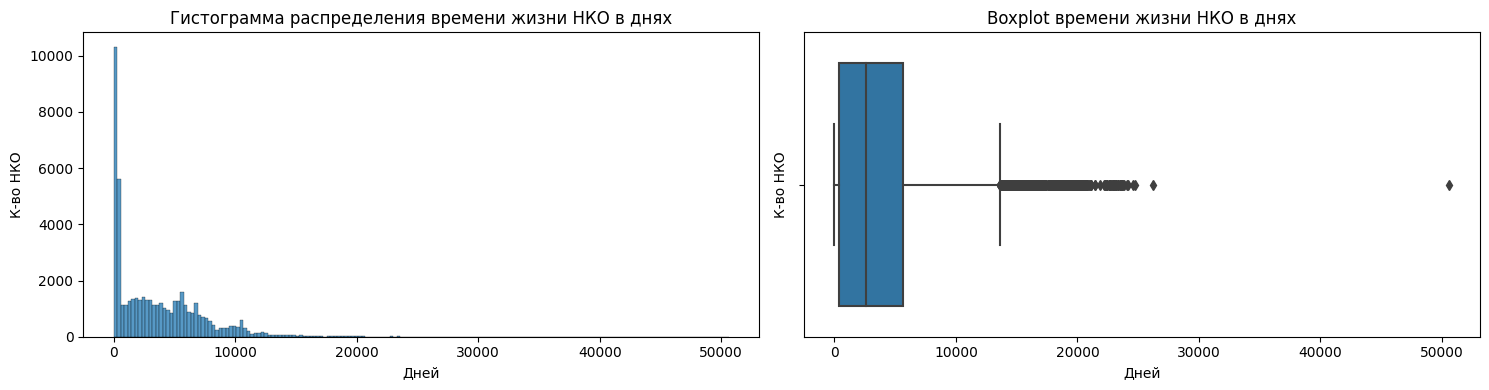

In [28]:
# Для первичного знакомства выберем признак 'nkoAge_days'.
# Строим гистограмму и Boxplot признака 'nkoAge_days'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='nkoAge_days', ax=axes[0])
histplot.set(xlabel="Дней", ylabel="К-во НКО", title="Гистограмма распределения времени жизни НКО в днях")
boxplot = sns.boxplot(data=df, x='nkoAge_days', ax=axes[1])
boxplot.set(xlabel="Дней", ylabel="К-во НКО", title="Boxplot времени жизни НКО в днях")
plt.tight_layout();

Все комментарии для первого датасета. Могут расходиться с текущим.

Очень много НКО с очень малениким возрастом.

Похоже на логнормальное распределение.

Есть выбросы.

Данные содержат далеко более 5000 образцов. Поэтому тесты на нормальность (например, Шапиро-Уилка или даже Колмогорова-Смирнова) не работают. По визуальной оценке, данные не являются нормально-распределенными, распределение даже не является симметричным. Попробуем логарифмировать признаки. Проведем анализ на нормальное распределение числовых признаков.

Исследуем на нормальность числовые признаки, задействованые в исследании.

Итак датасет большой и имеет дизбаланс. Много нулевых значений.
Для целей изучения зависимостей между признаками (статистических тестов) я выбрал датасет без нулей в определяющем признаке 'incomeTotal' и признаках его составляющих. Т.к нас интересует прежде всего то, как зависит от других признаков именно финансирование, а не его отсутствие.

Для главной цели- зависимость вероятности получения грантов уже необходимо рассматривать полный датасет, т.к. здесь уже необходимы случаи с нулевым финансированием.

Разделим анализ на нормальность на две части для: 1. Для 'incomeTotal' больше нуля; 2. Для всего датасета.
Также в рамках этих двух случаев будем применять логарифмирование или не применять его.

Для полного датасета (далеко более 5000) не подходят стандартные тесты на нормальность. Проведем косвенные исследования. Для больших данных оценим практические критерии. 

Графики (Q-Q, гистограмма).
Асимметрия (Skewness) и Эксцесс (Kurtosis) в пределах -1 до 1
Разница между средним и медианой < 5% от SD.

Посмотрим на распределение цифровых признаков без нулей и с нулями без логарифмирования и с логарифмированием.

Числовые признаки без нулей: 1.Распределение. 2 Log рапределение. 3. Q-Q plot Log рапределения.

Анализ колонки: contrCount


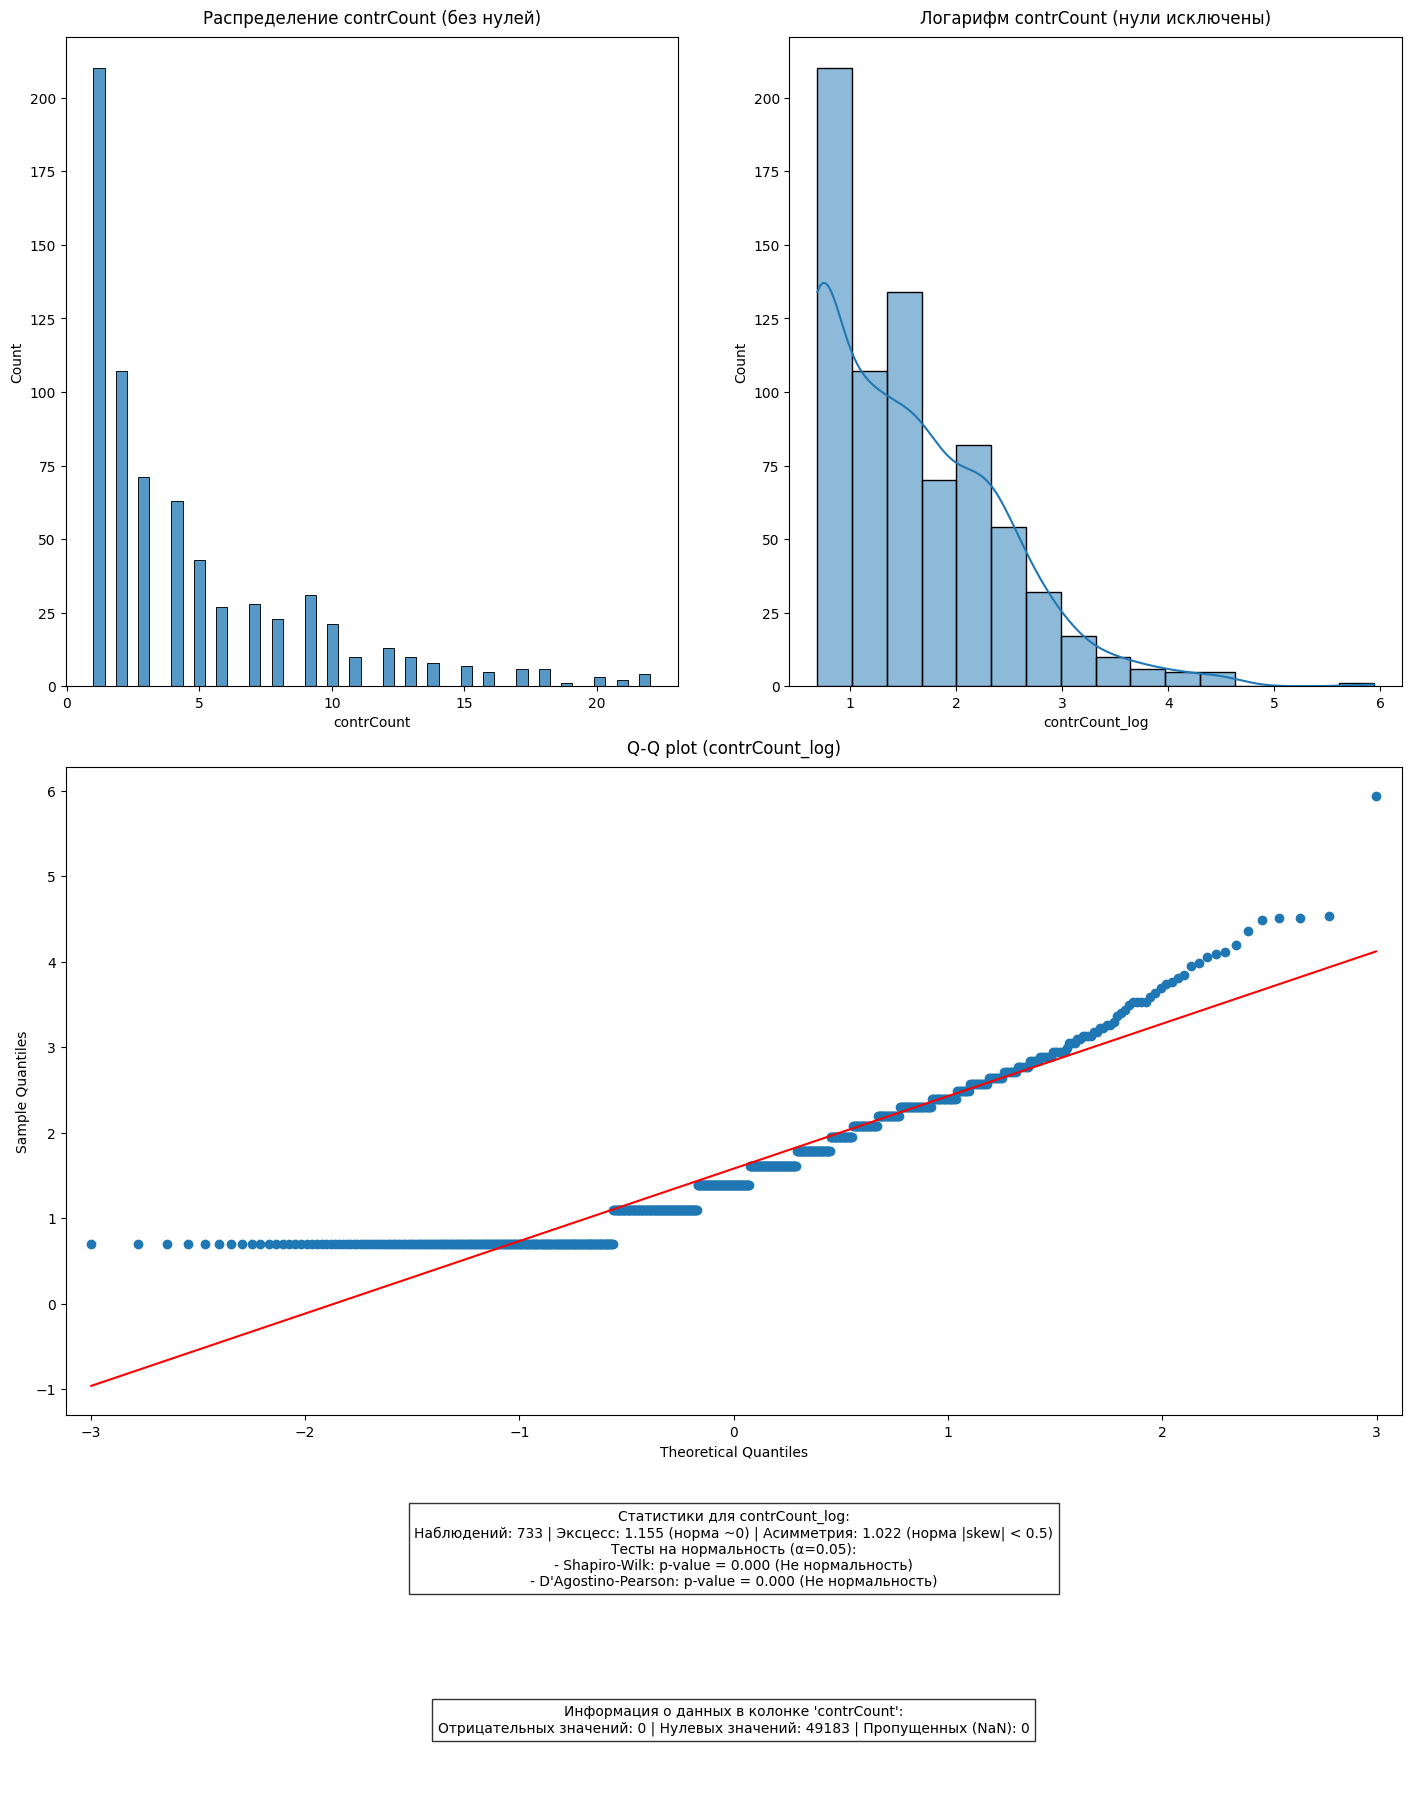


Анализ колонки: fedSubsSum


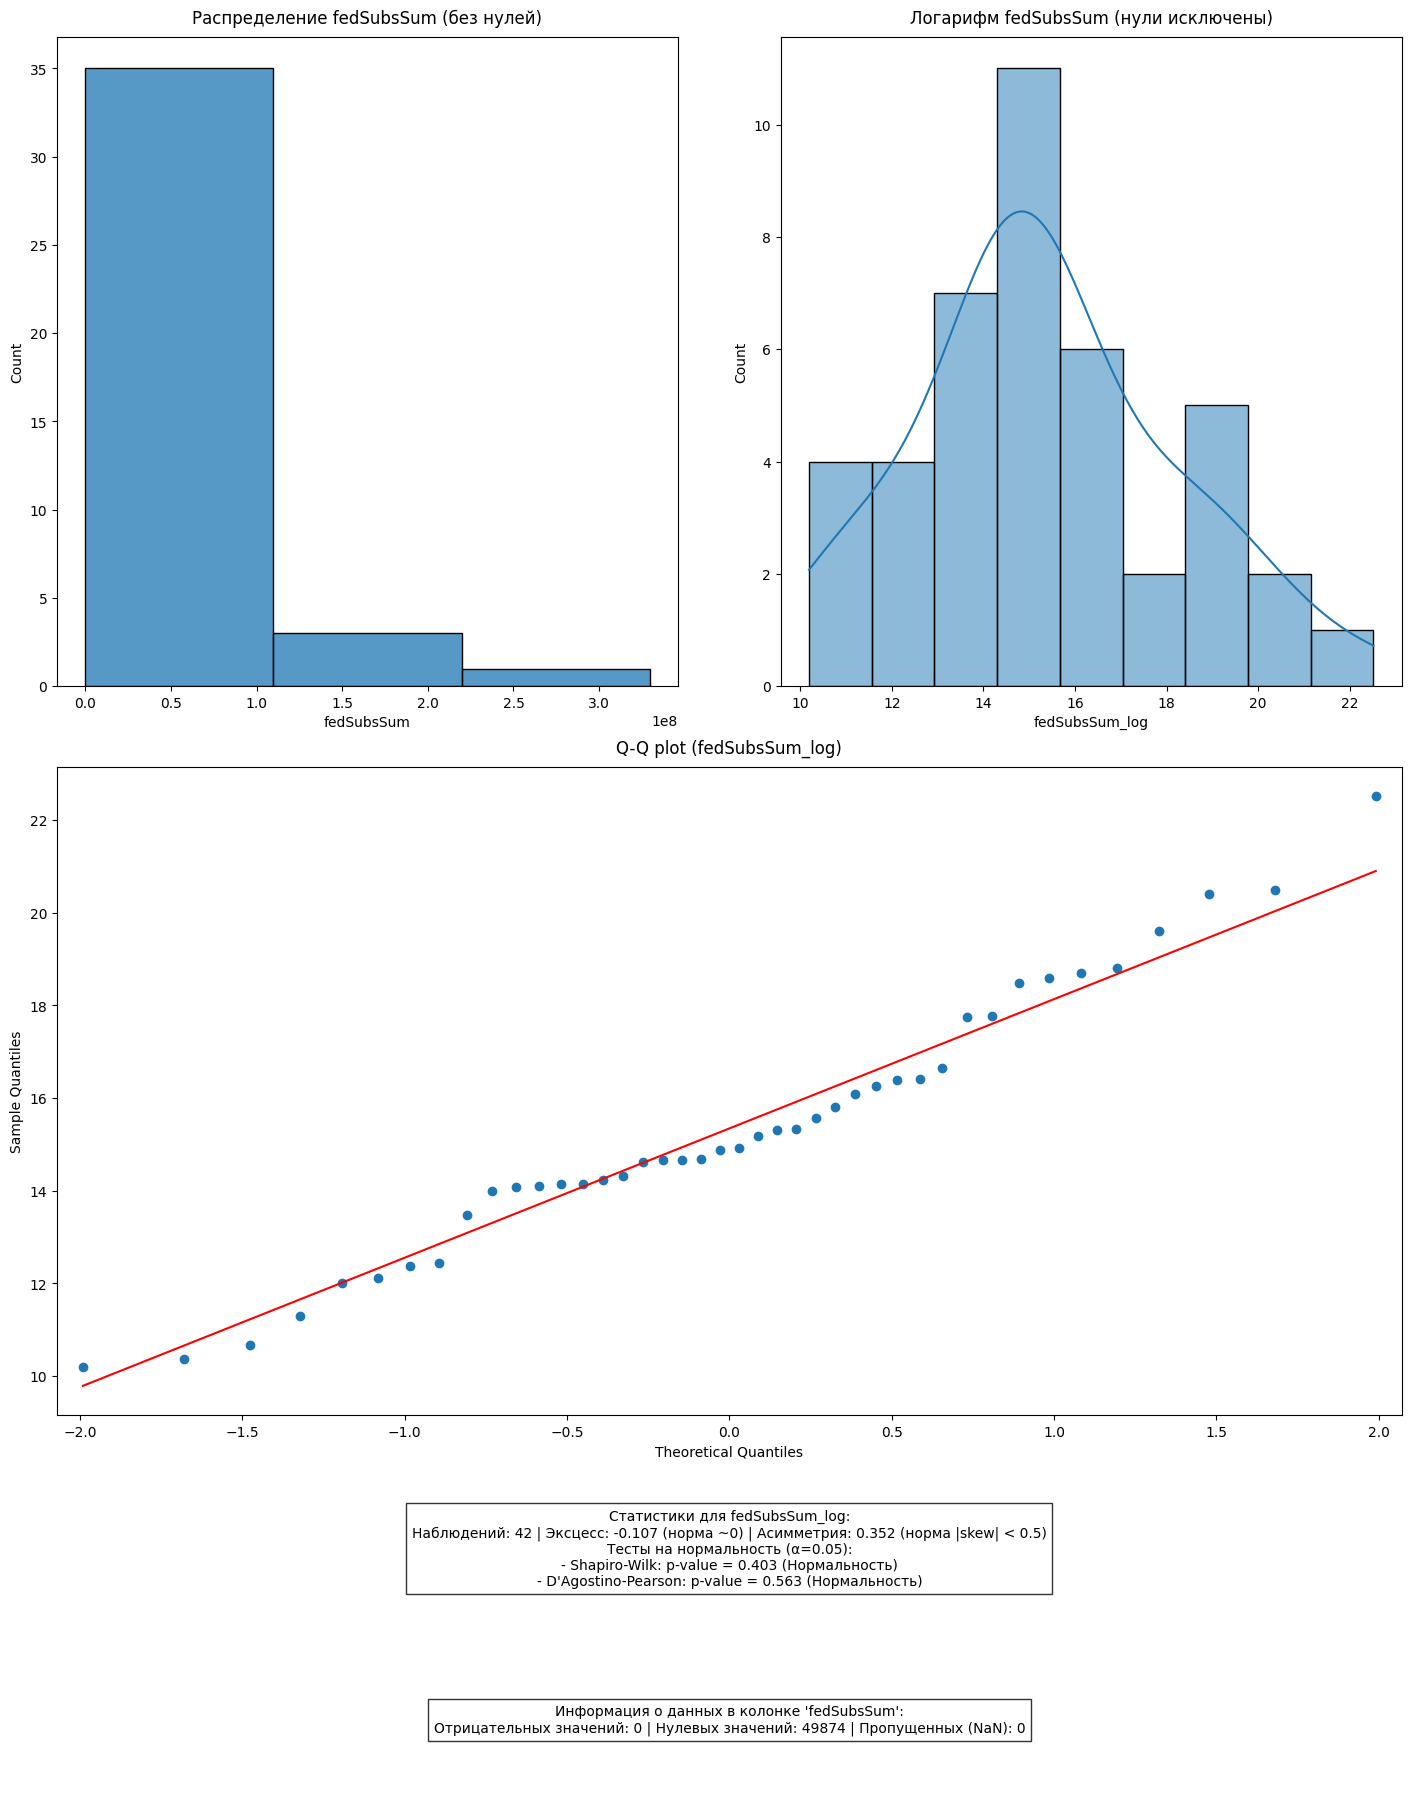


Анализ колонки: fedSubsCount


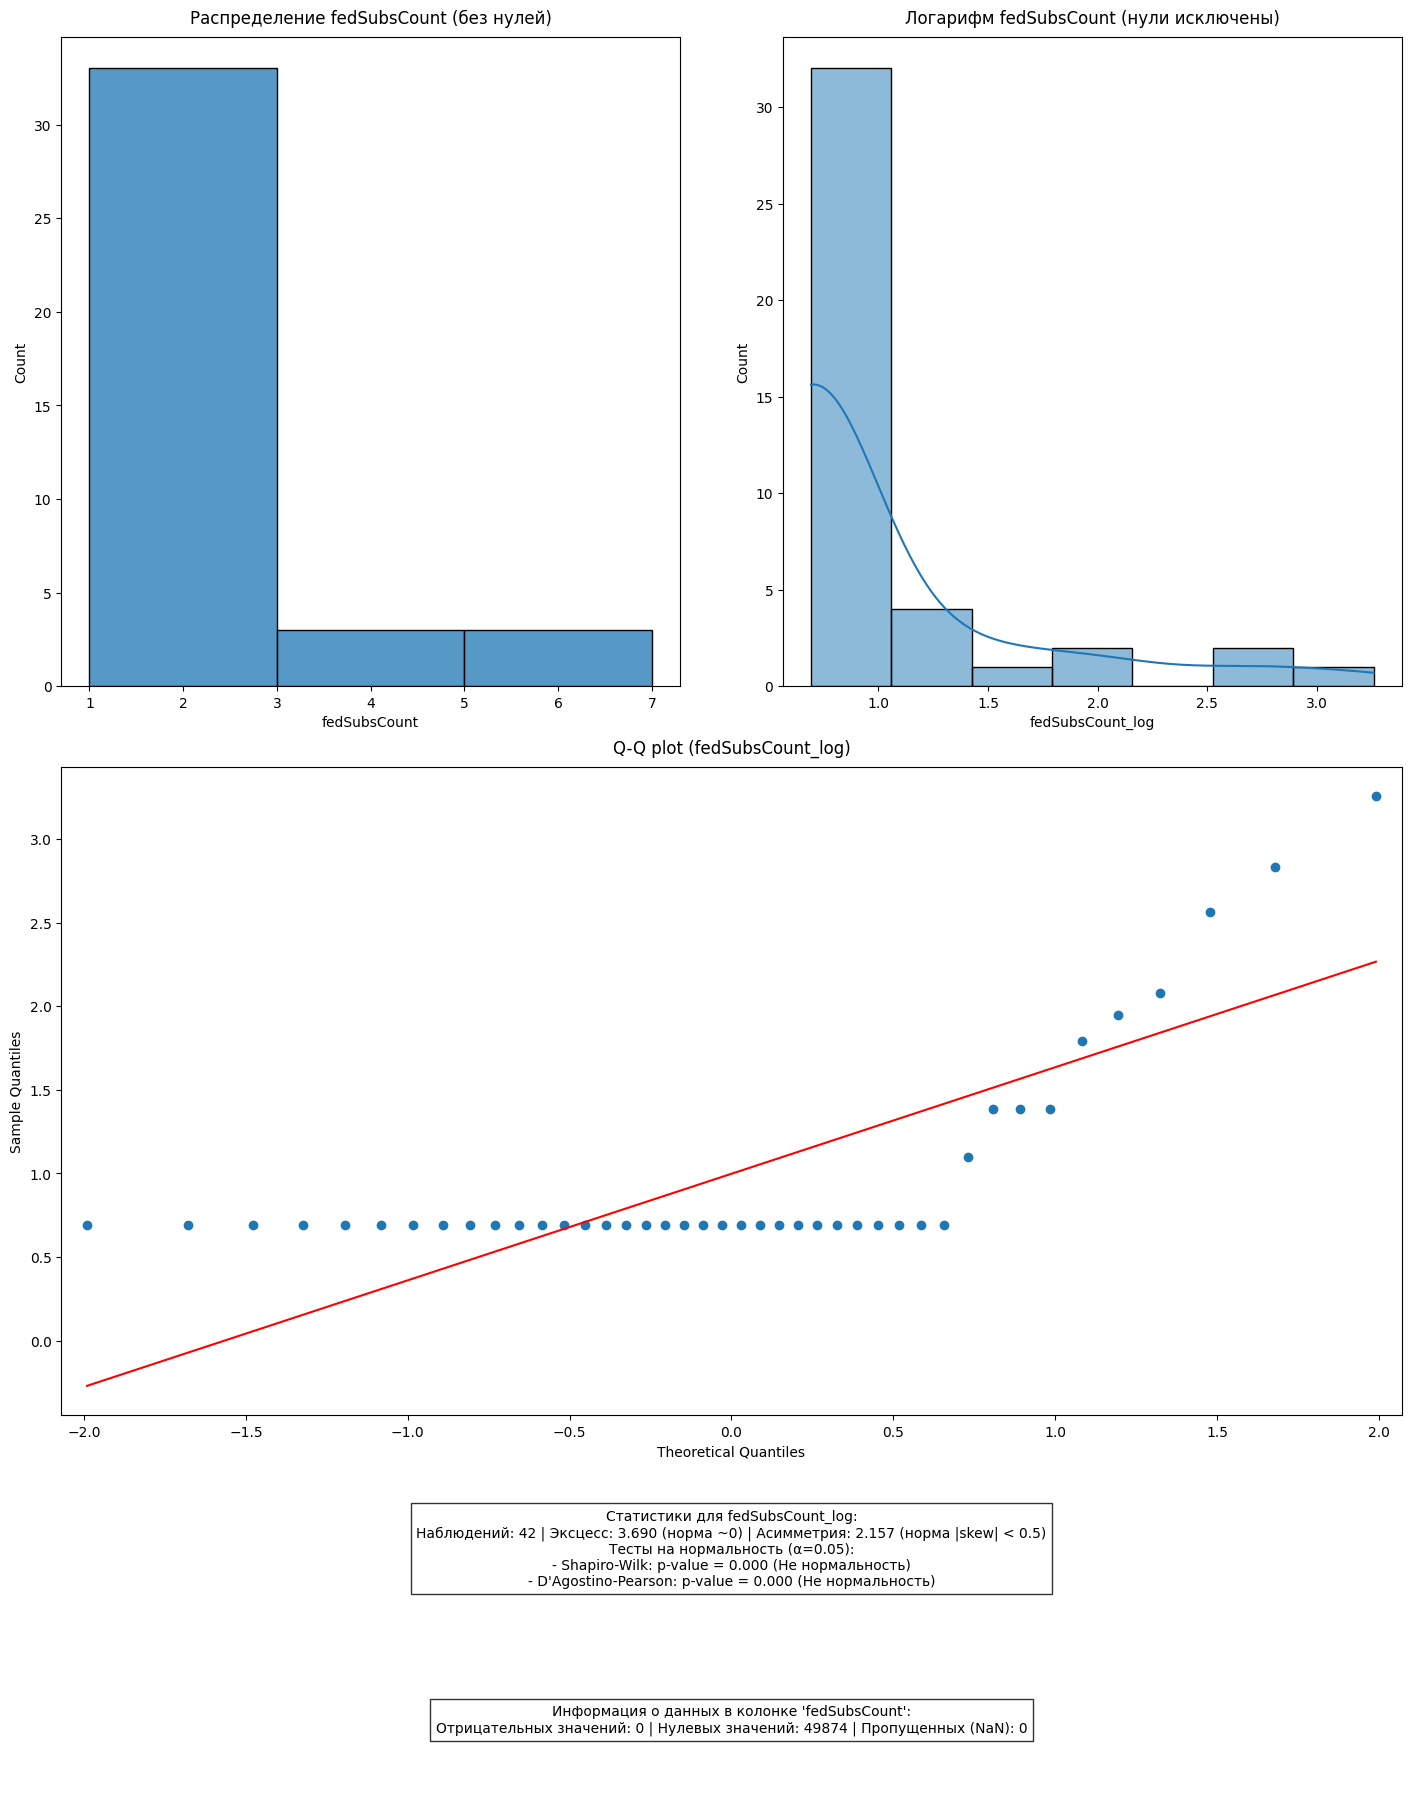


Анализ колонки: incomeTotal


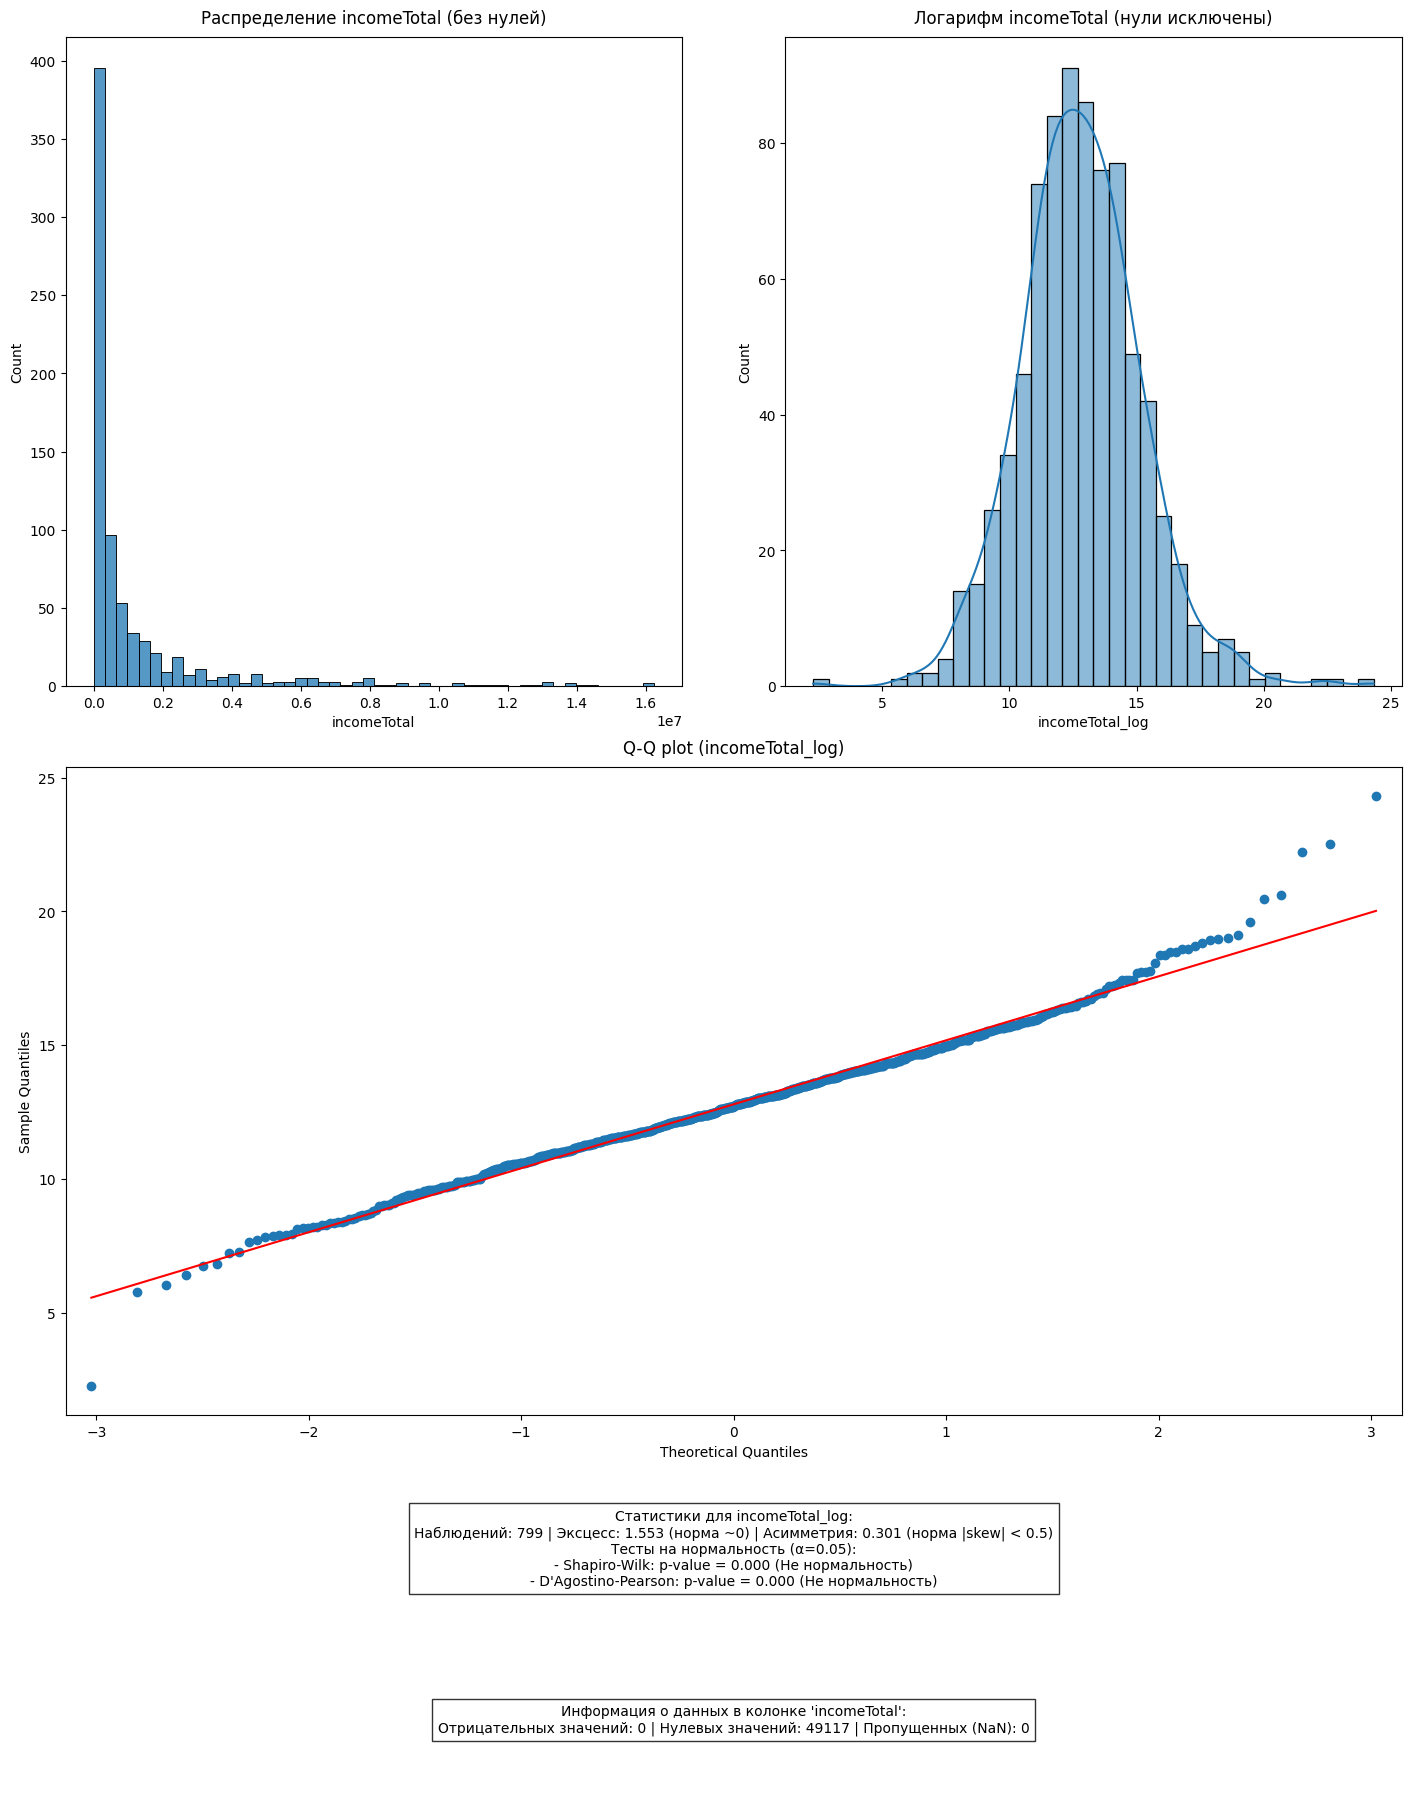


Анализ колонки: grantsCount


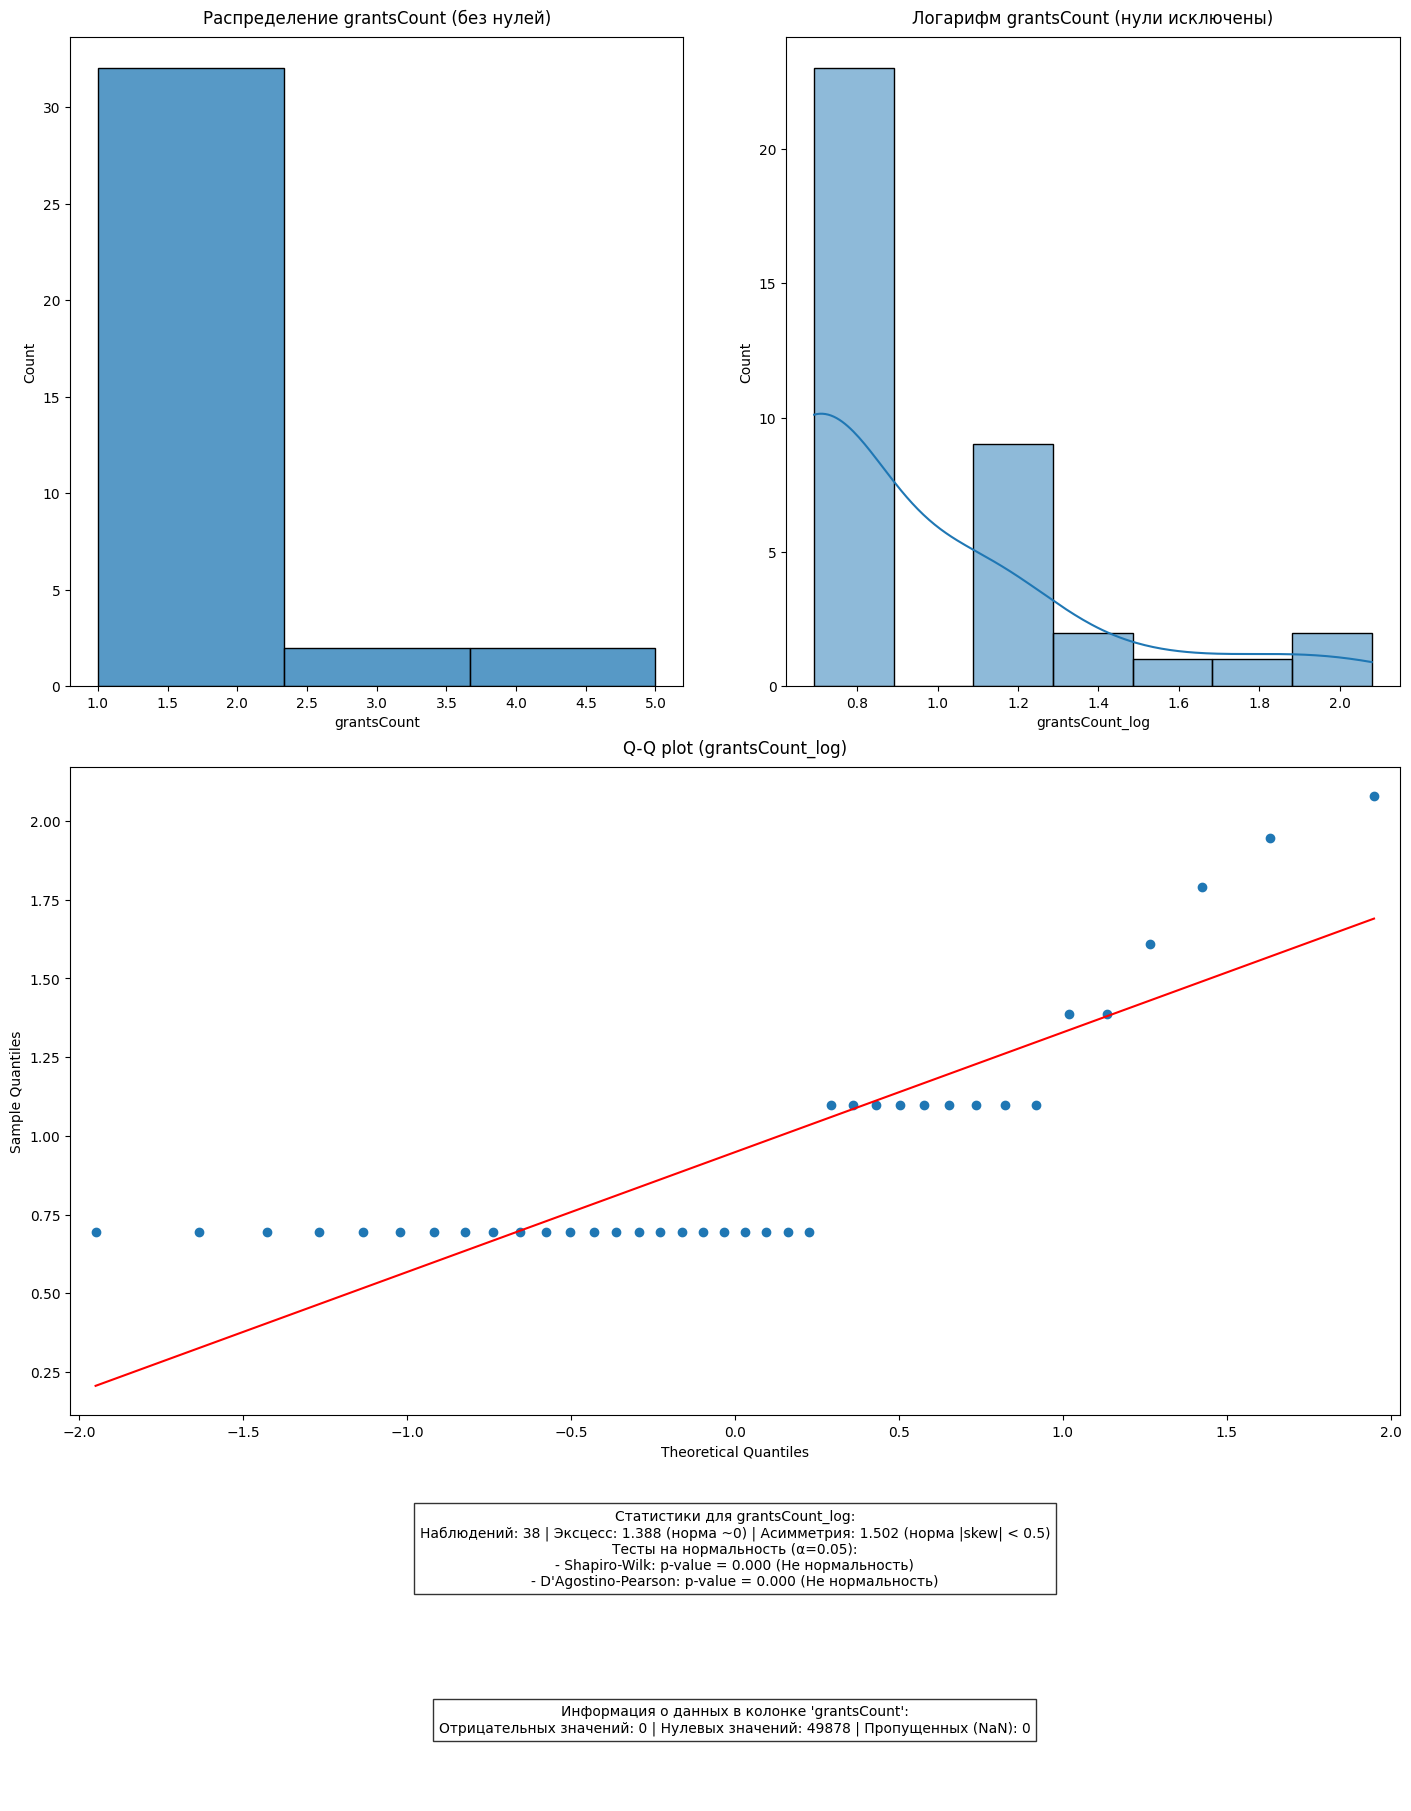


Анализ колонки: addOkvedCount


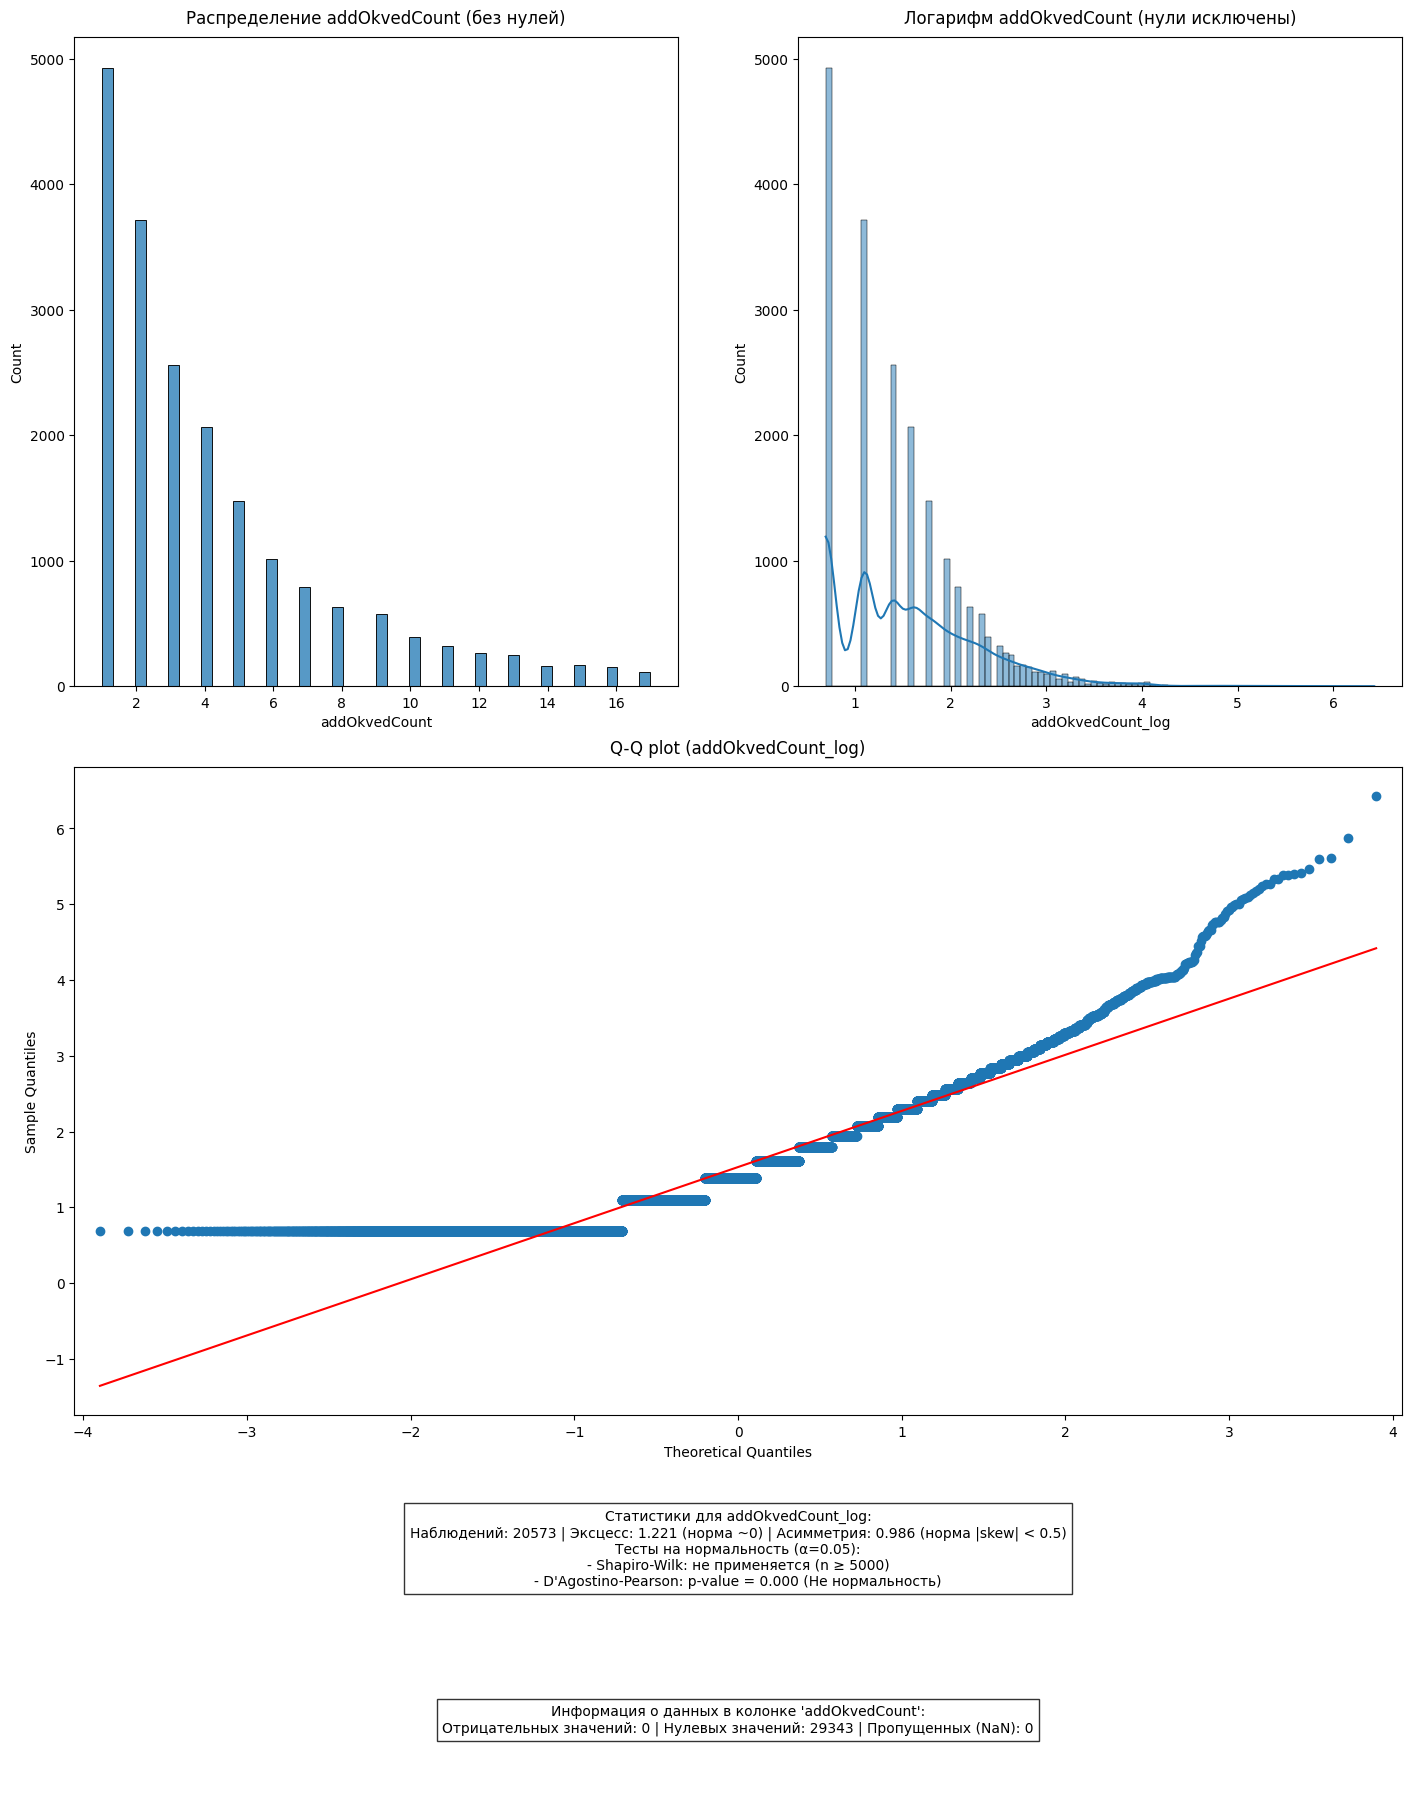


Анализ колонки: contrSum


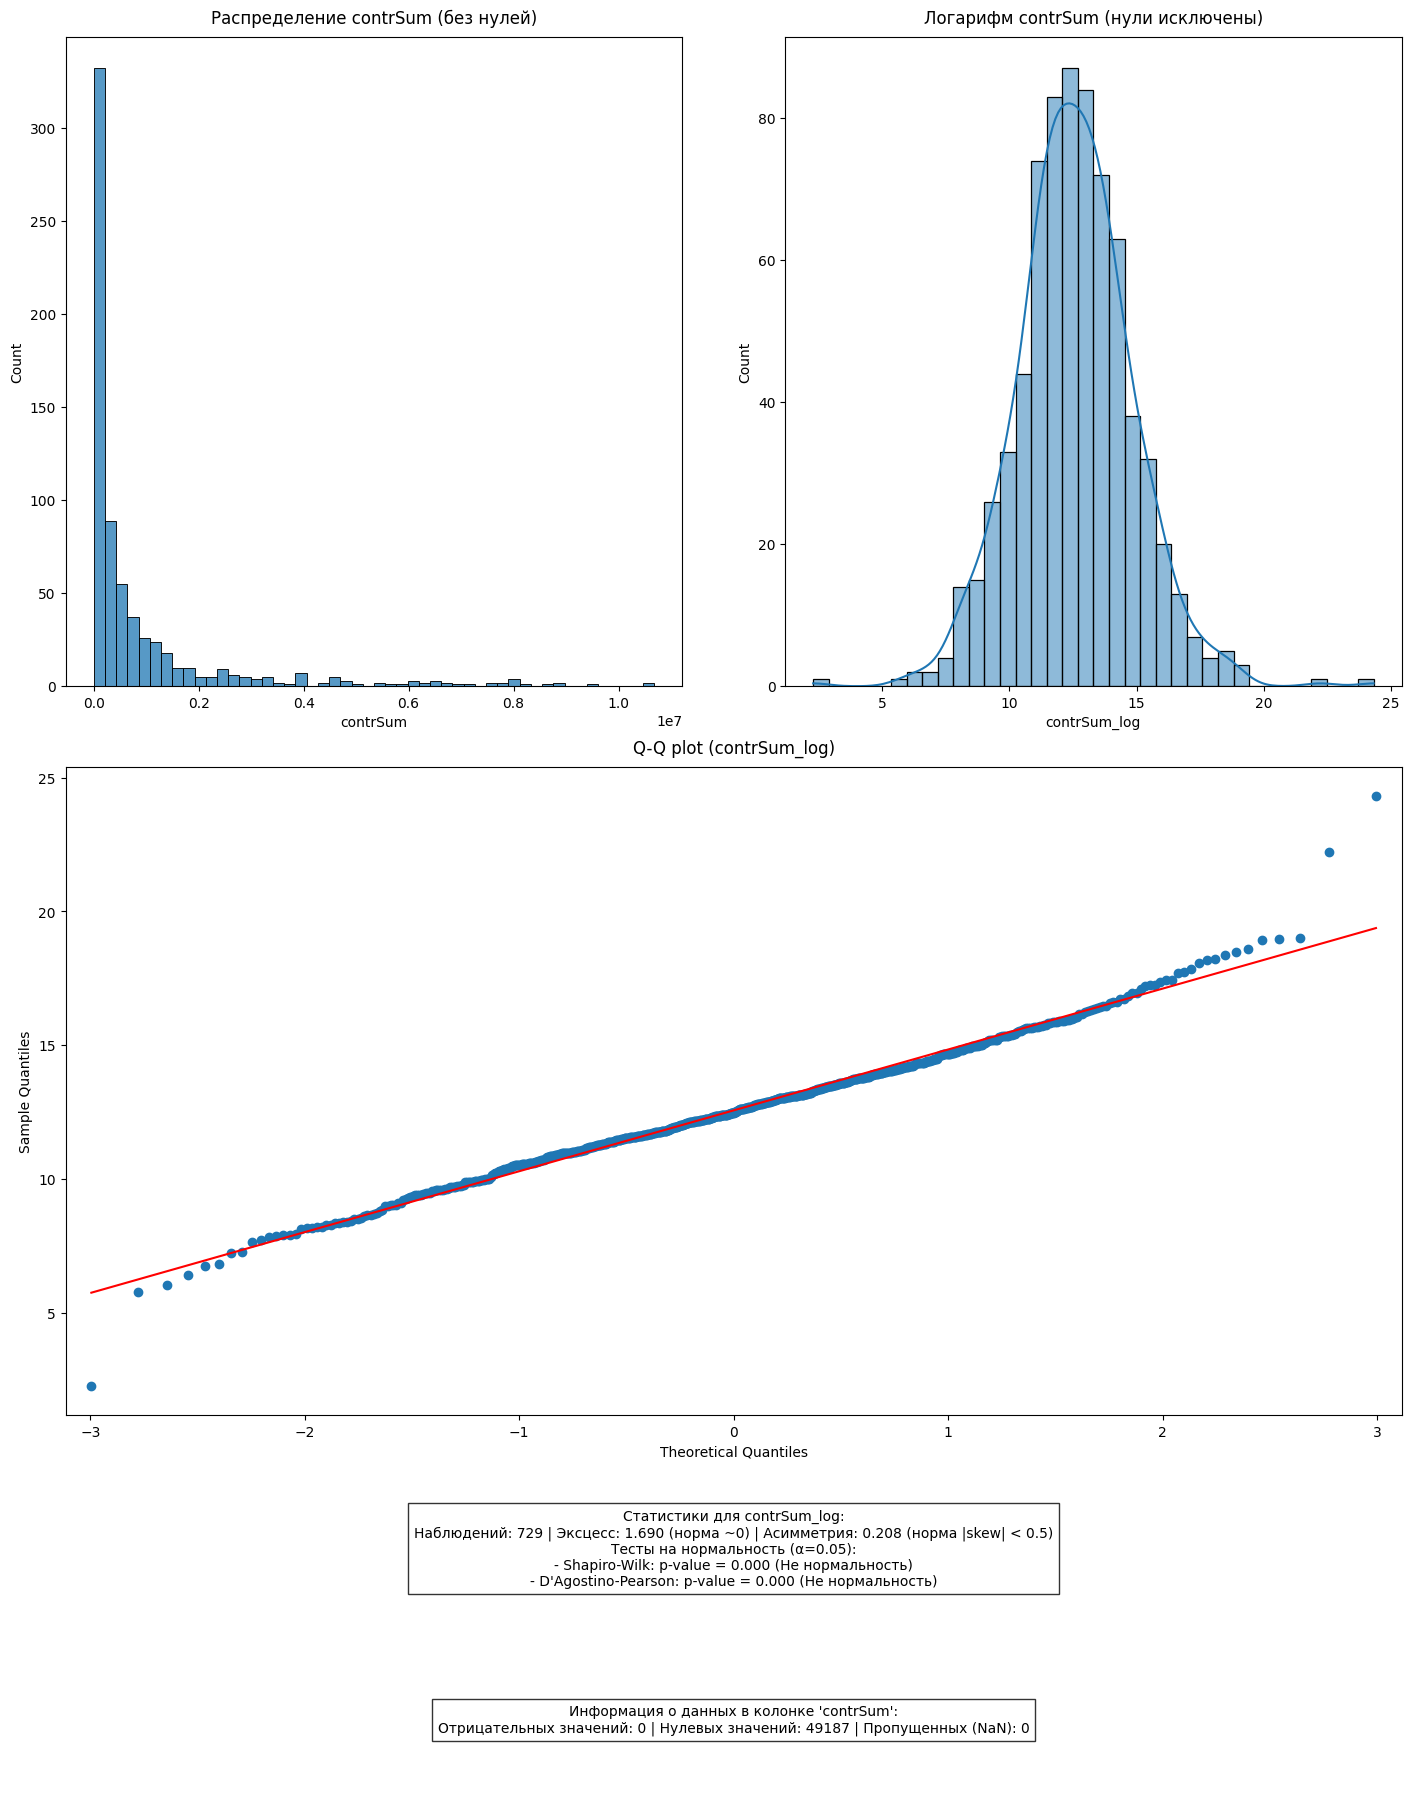


Анализ колонки: nkoAge_days


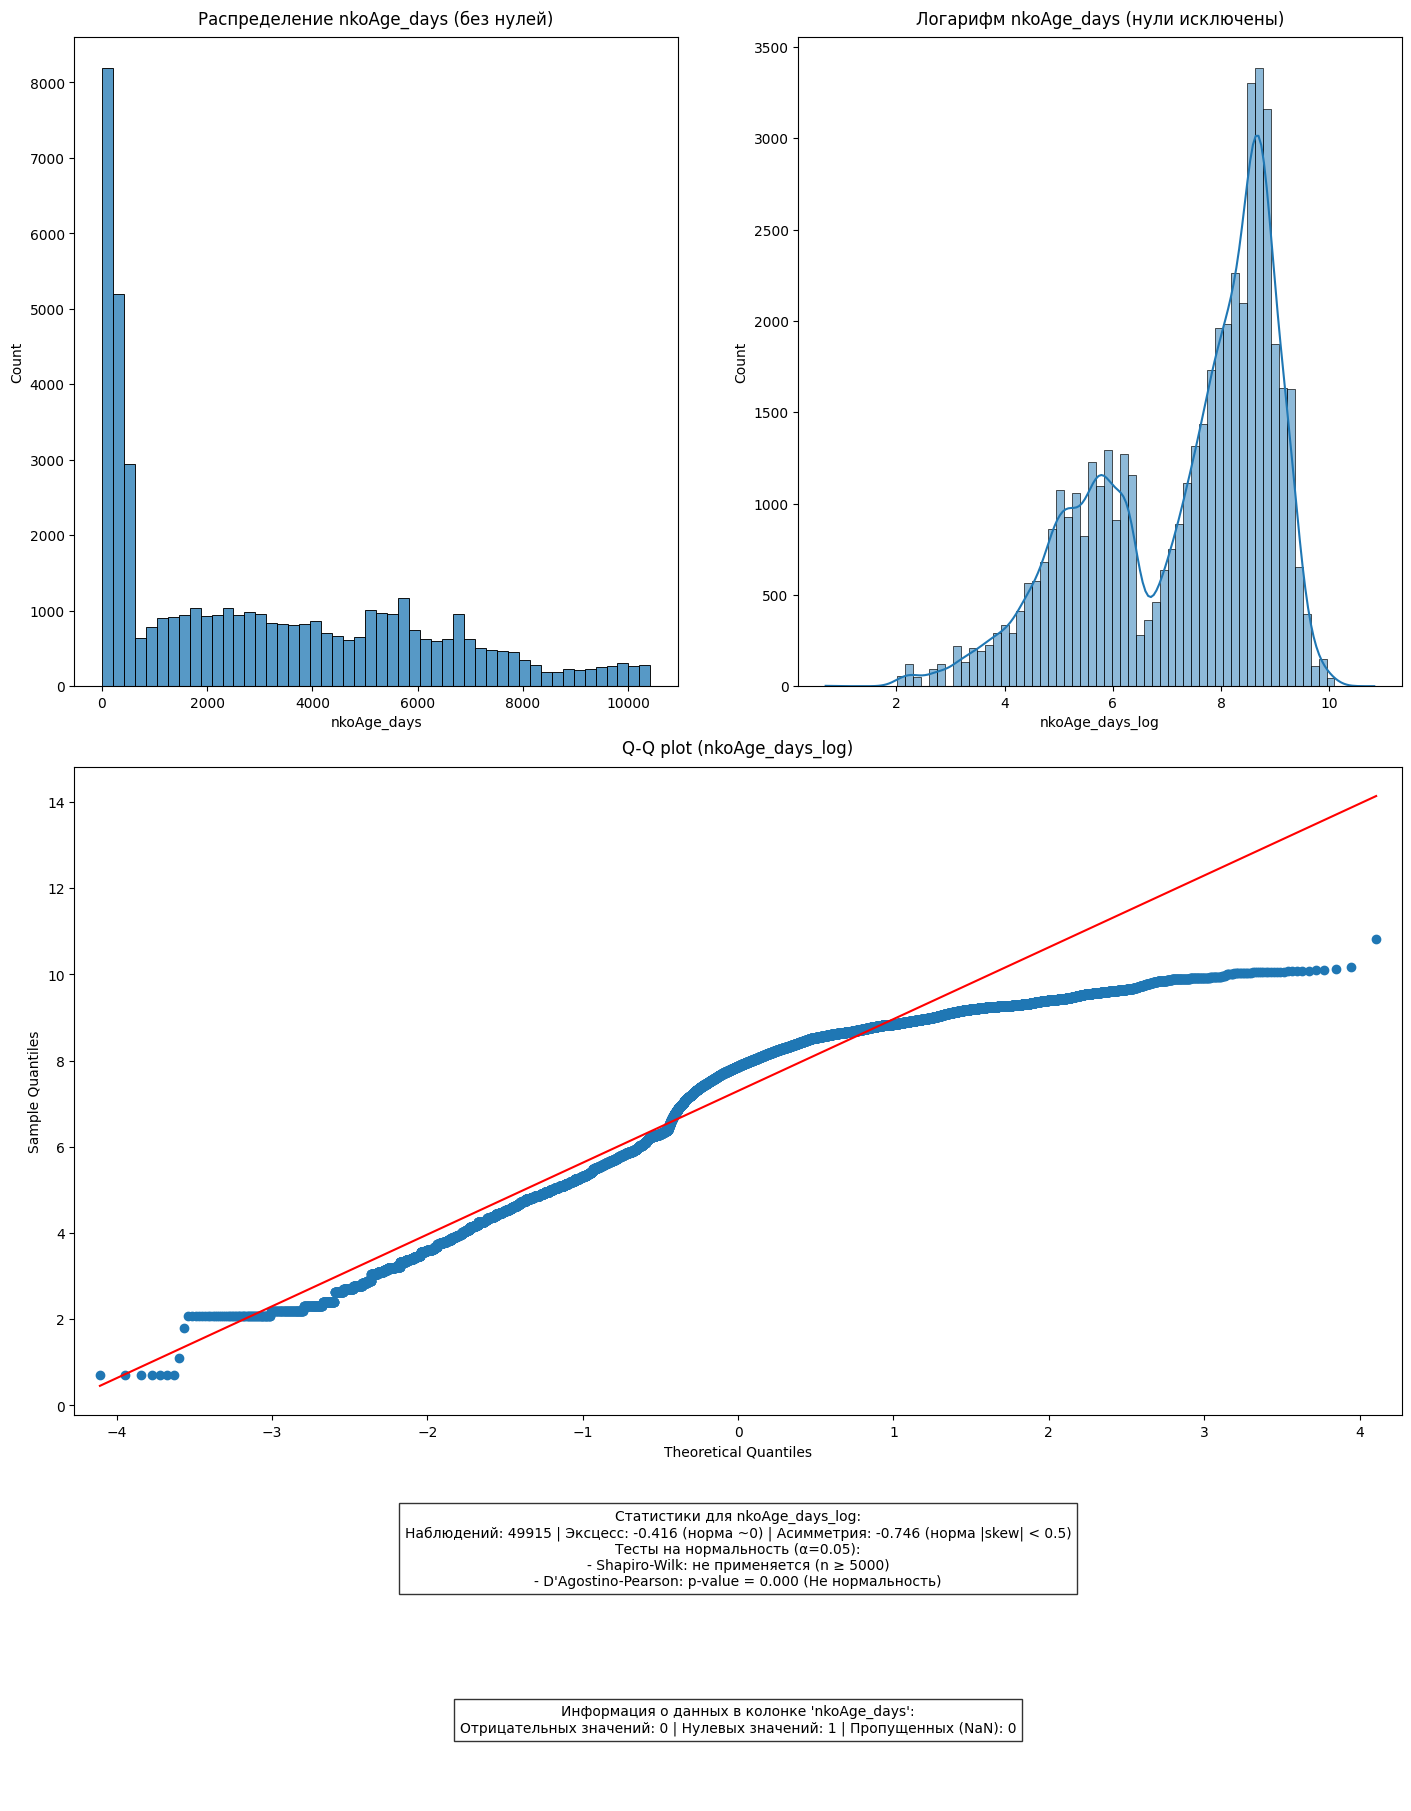


Анализ колонки: grantsSum


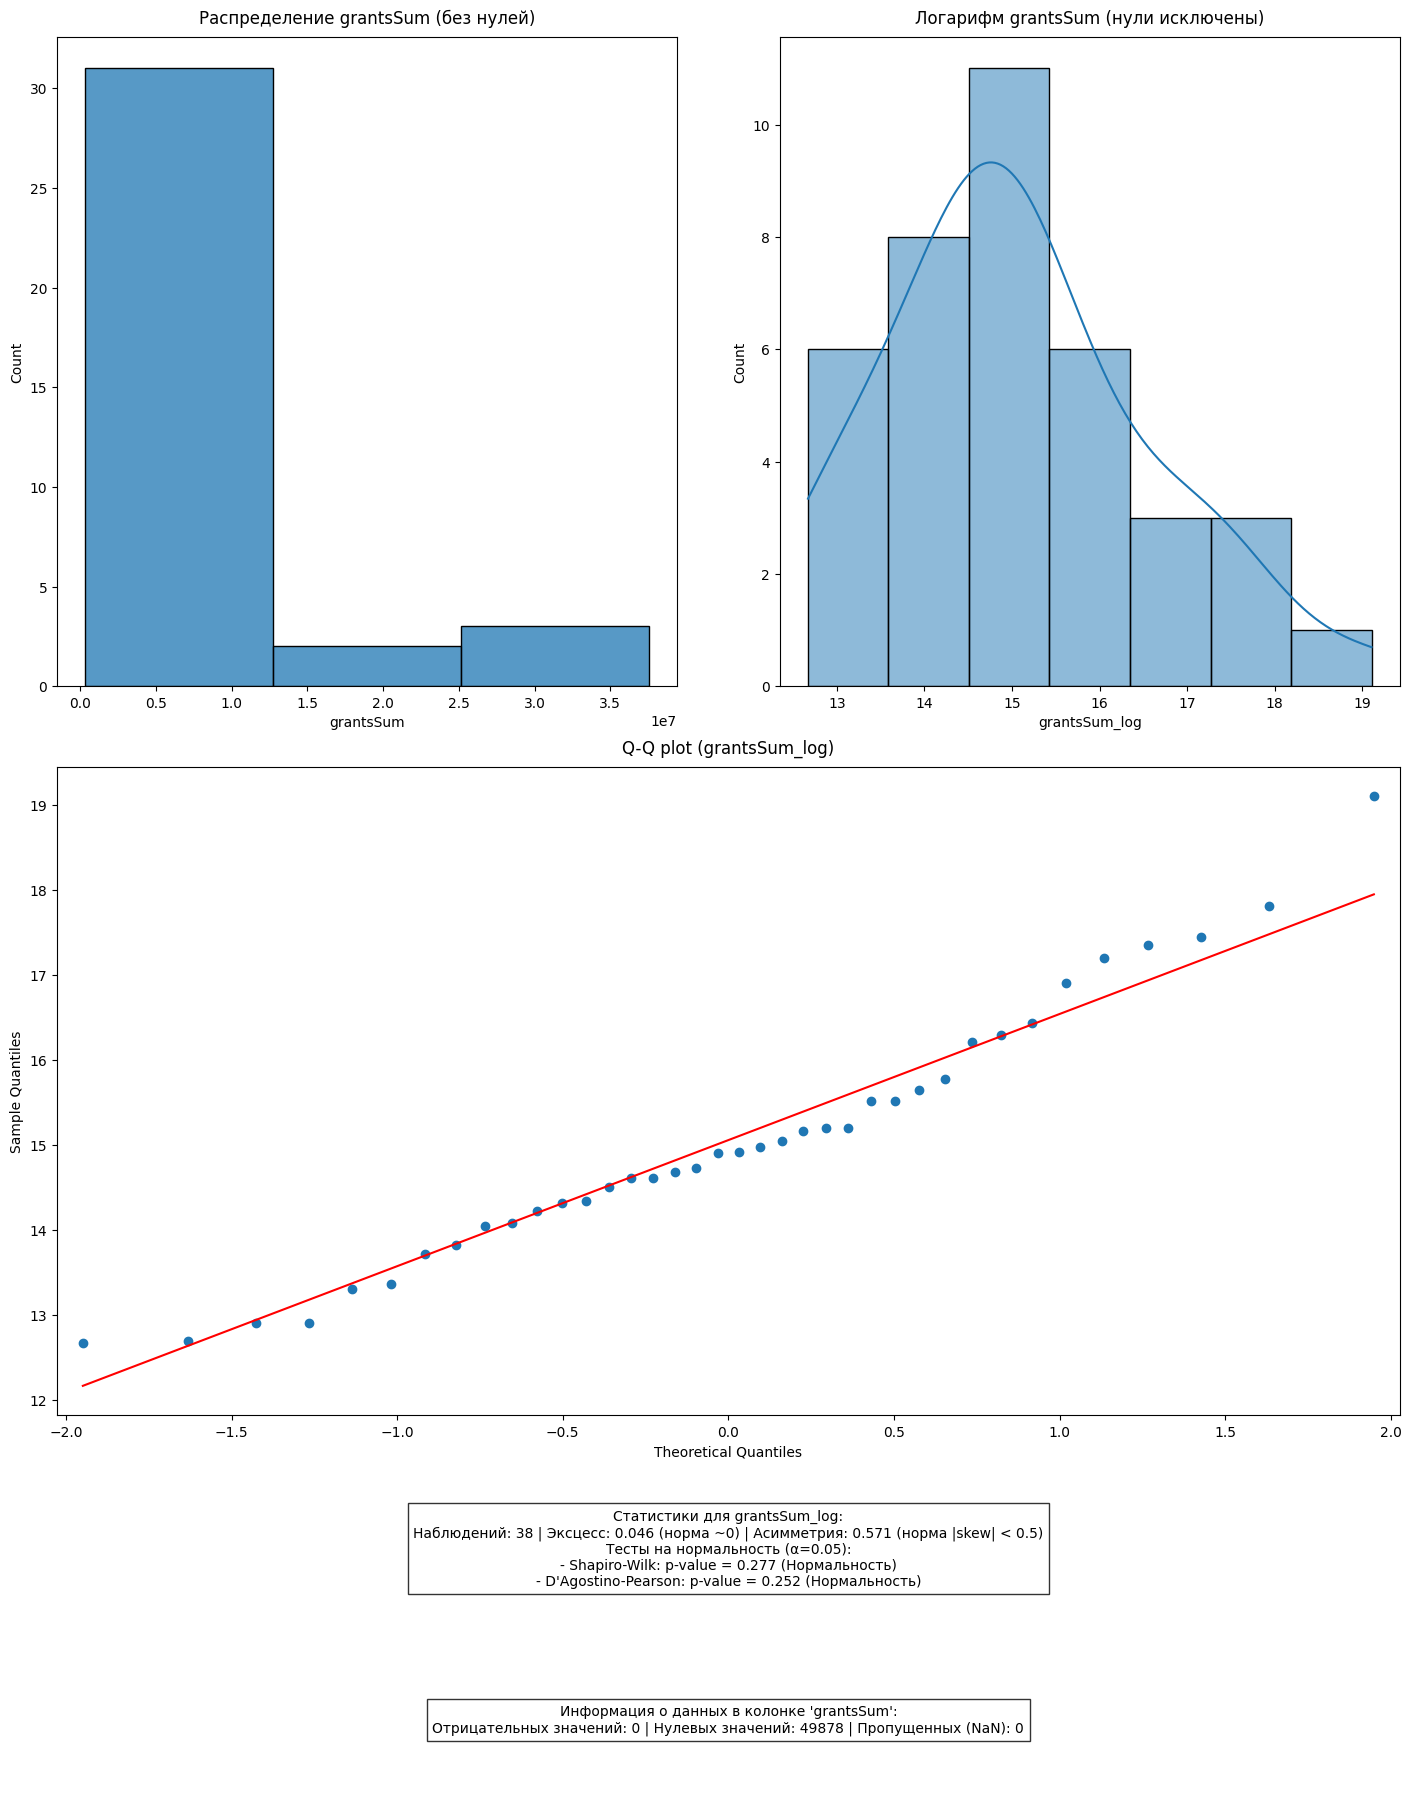

Числовые признаки с нулями: 1.Распределение. 2 Log рапределение. 3. Q-Q plot Log рапределения.

Анализ колонки: contrCount


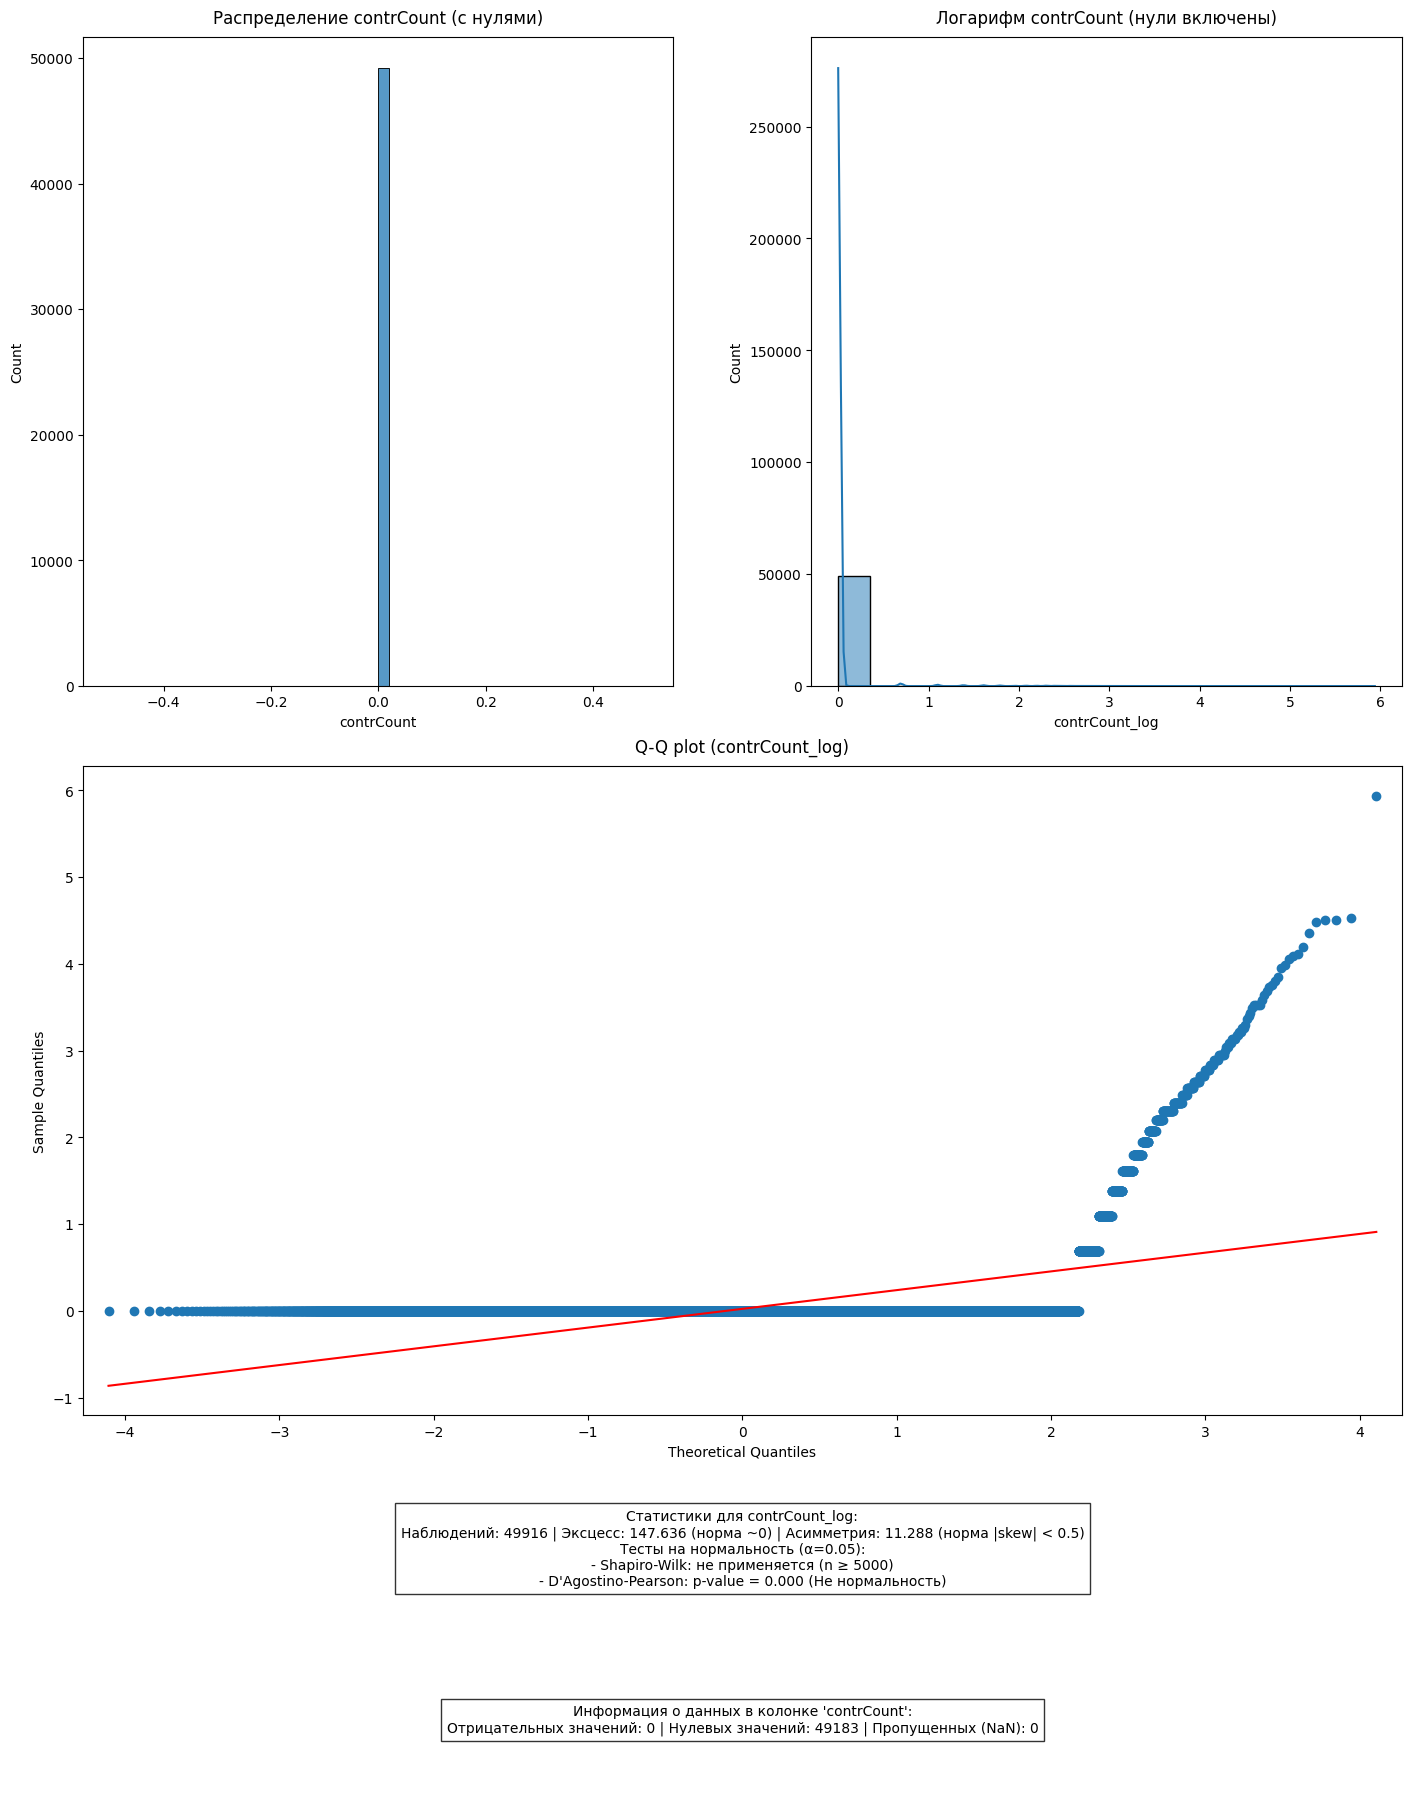


Анализ колонки: fedSubsSum


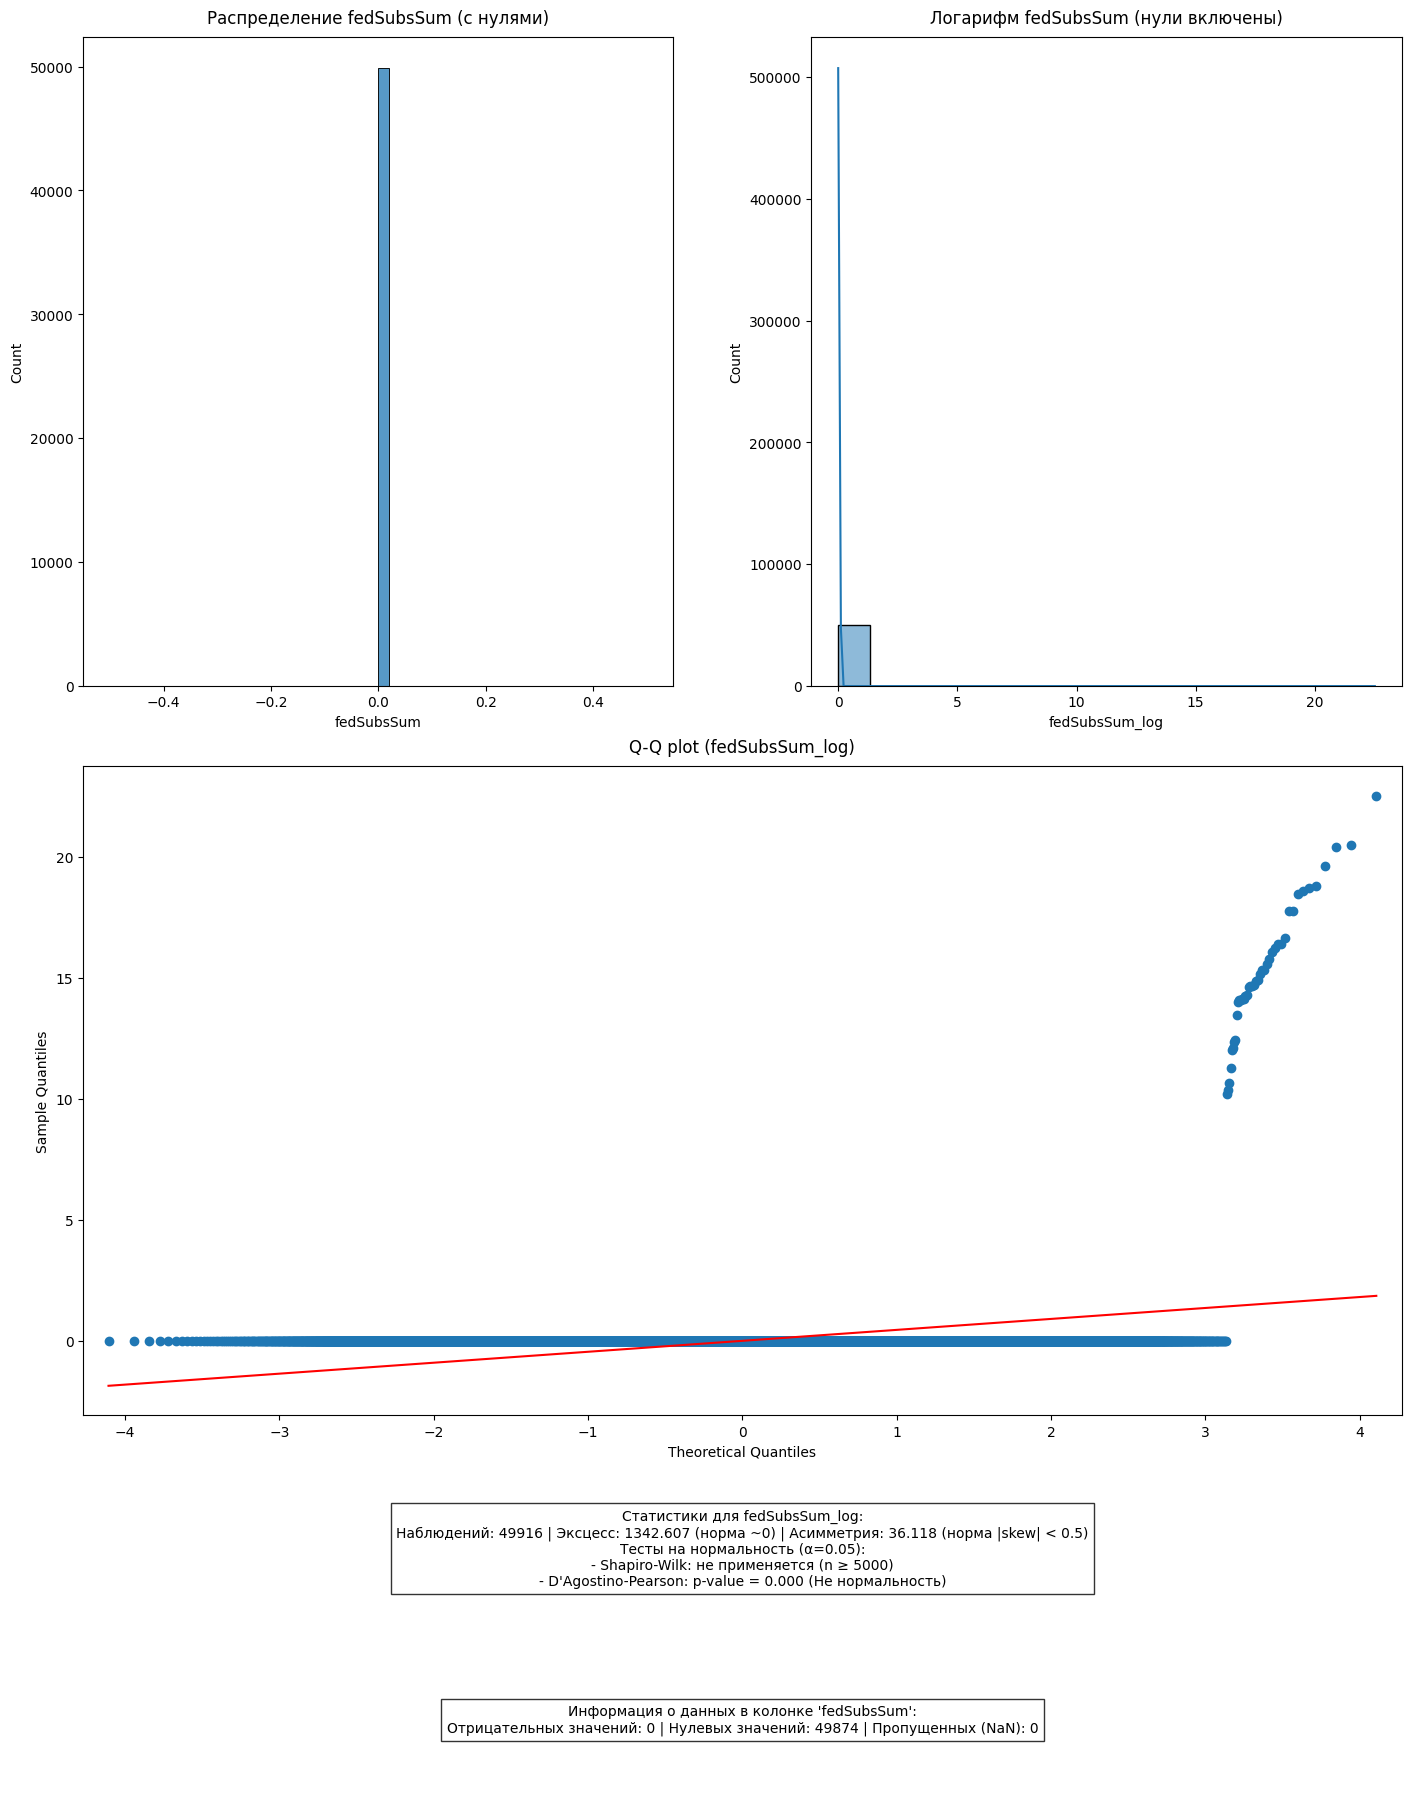


Анализ колонки: fedSubsCount


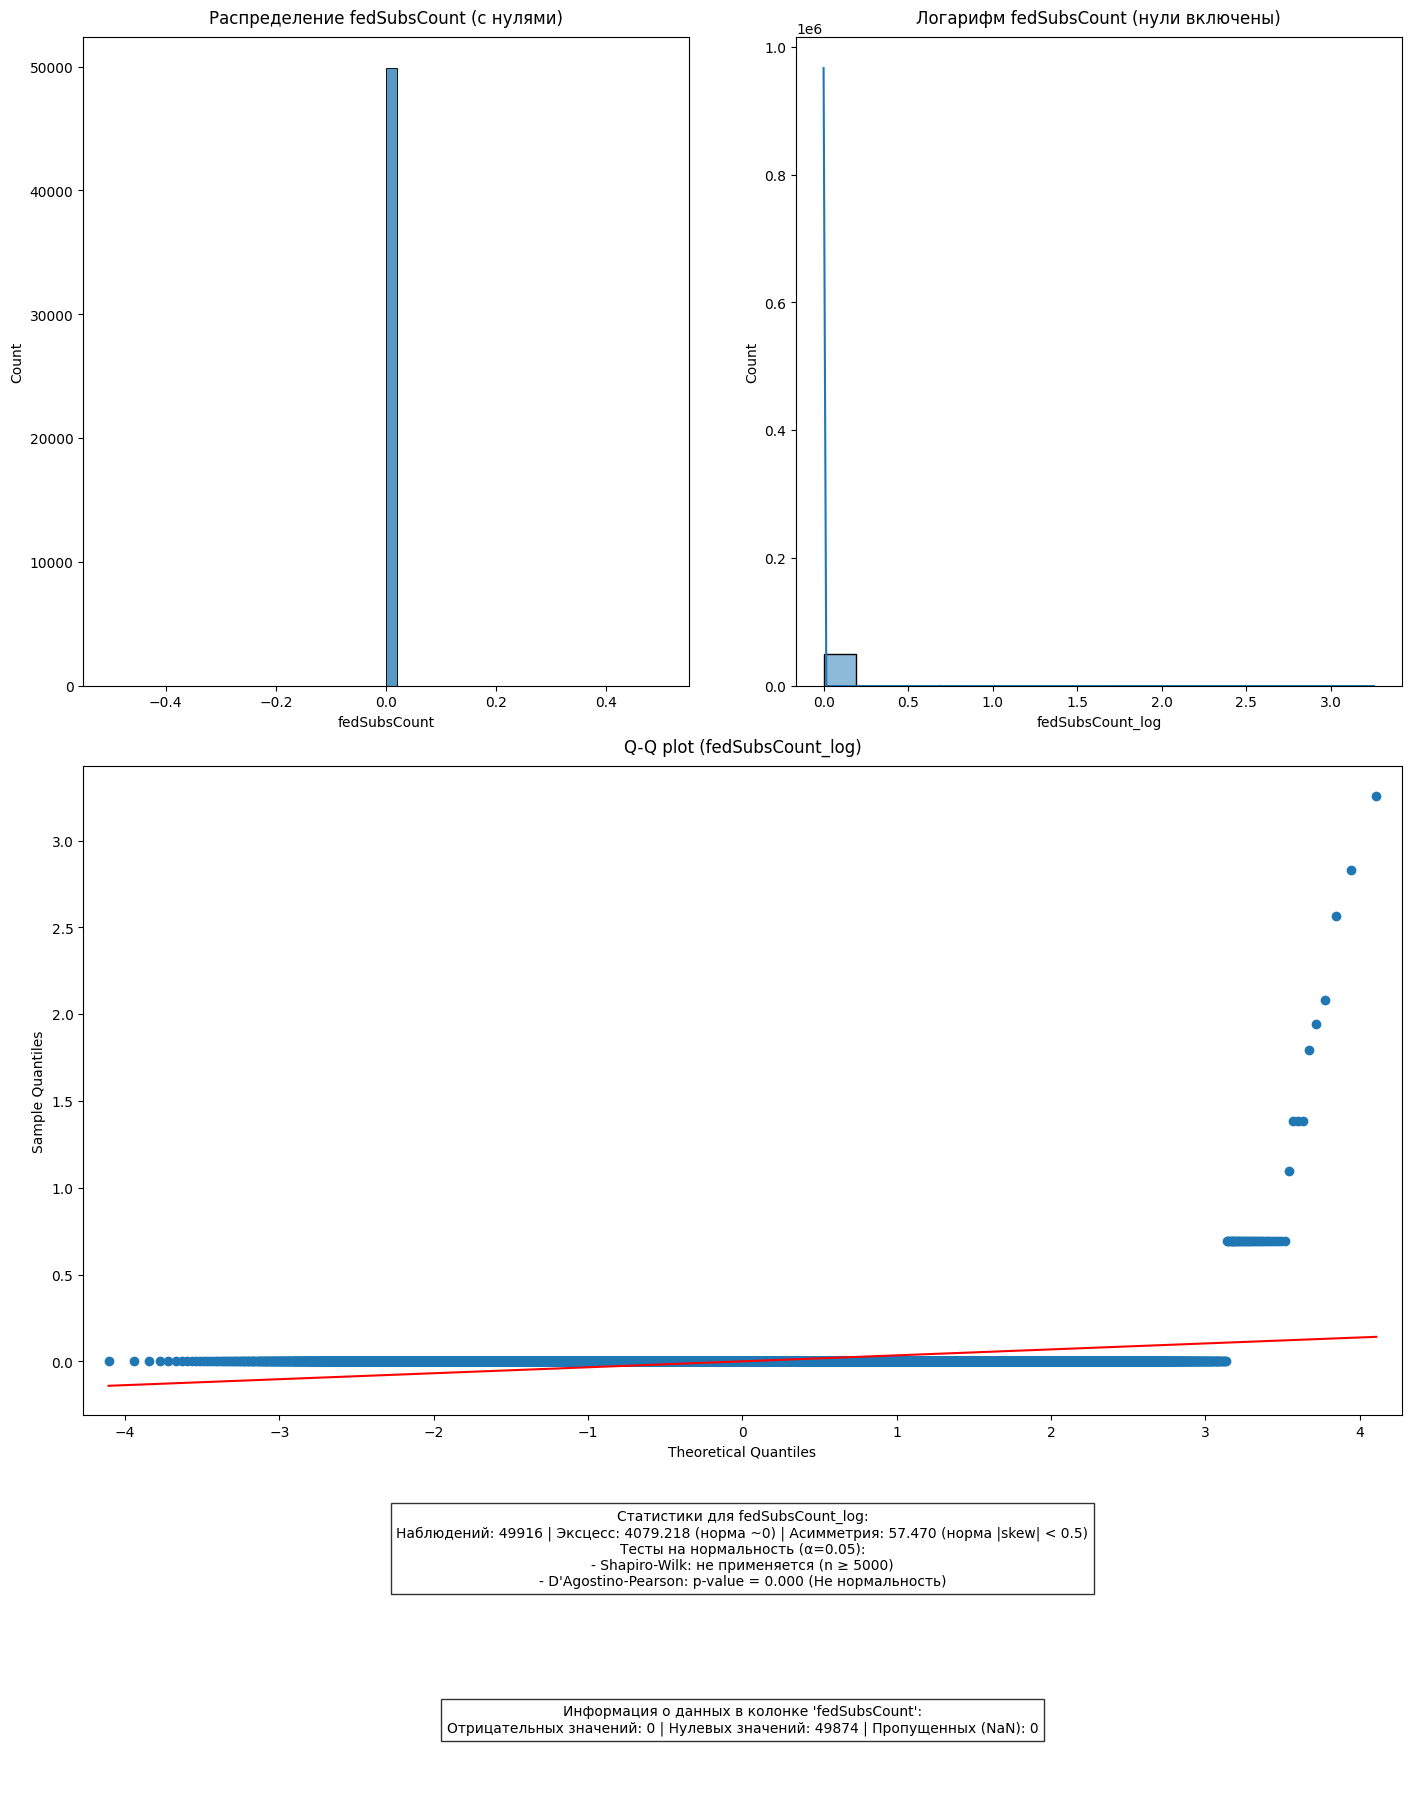


Анализ колонки: incomeTotal


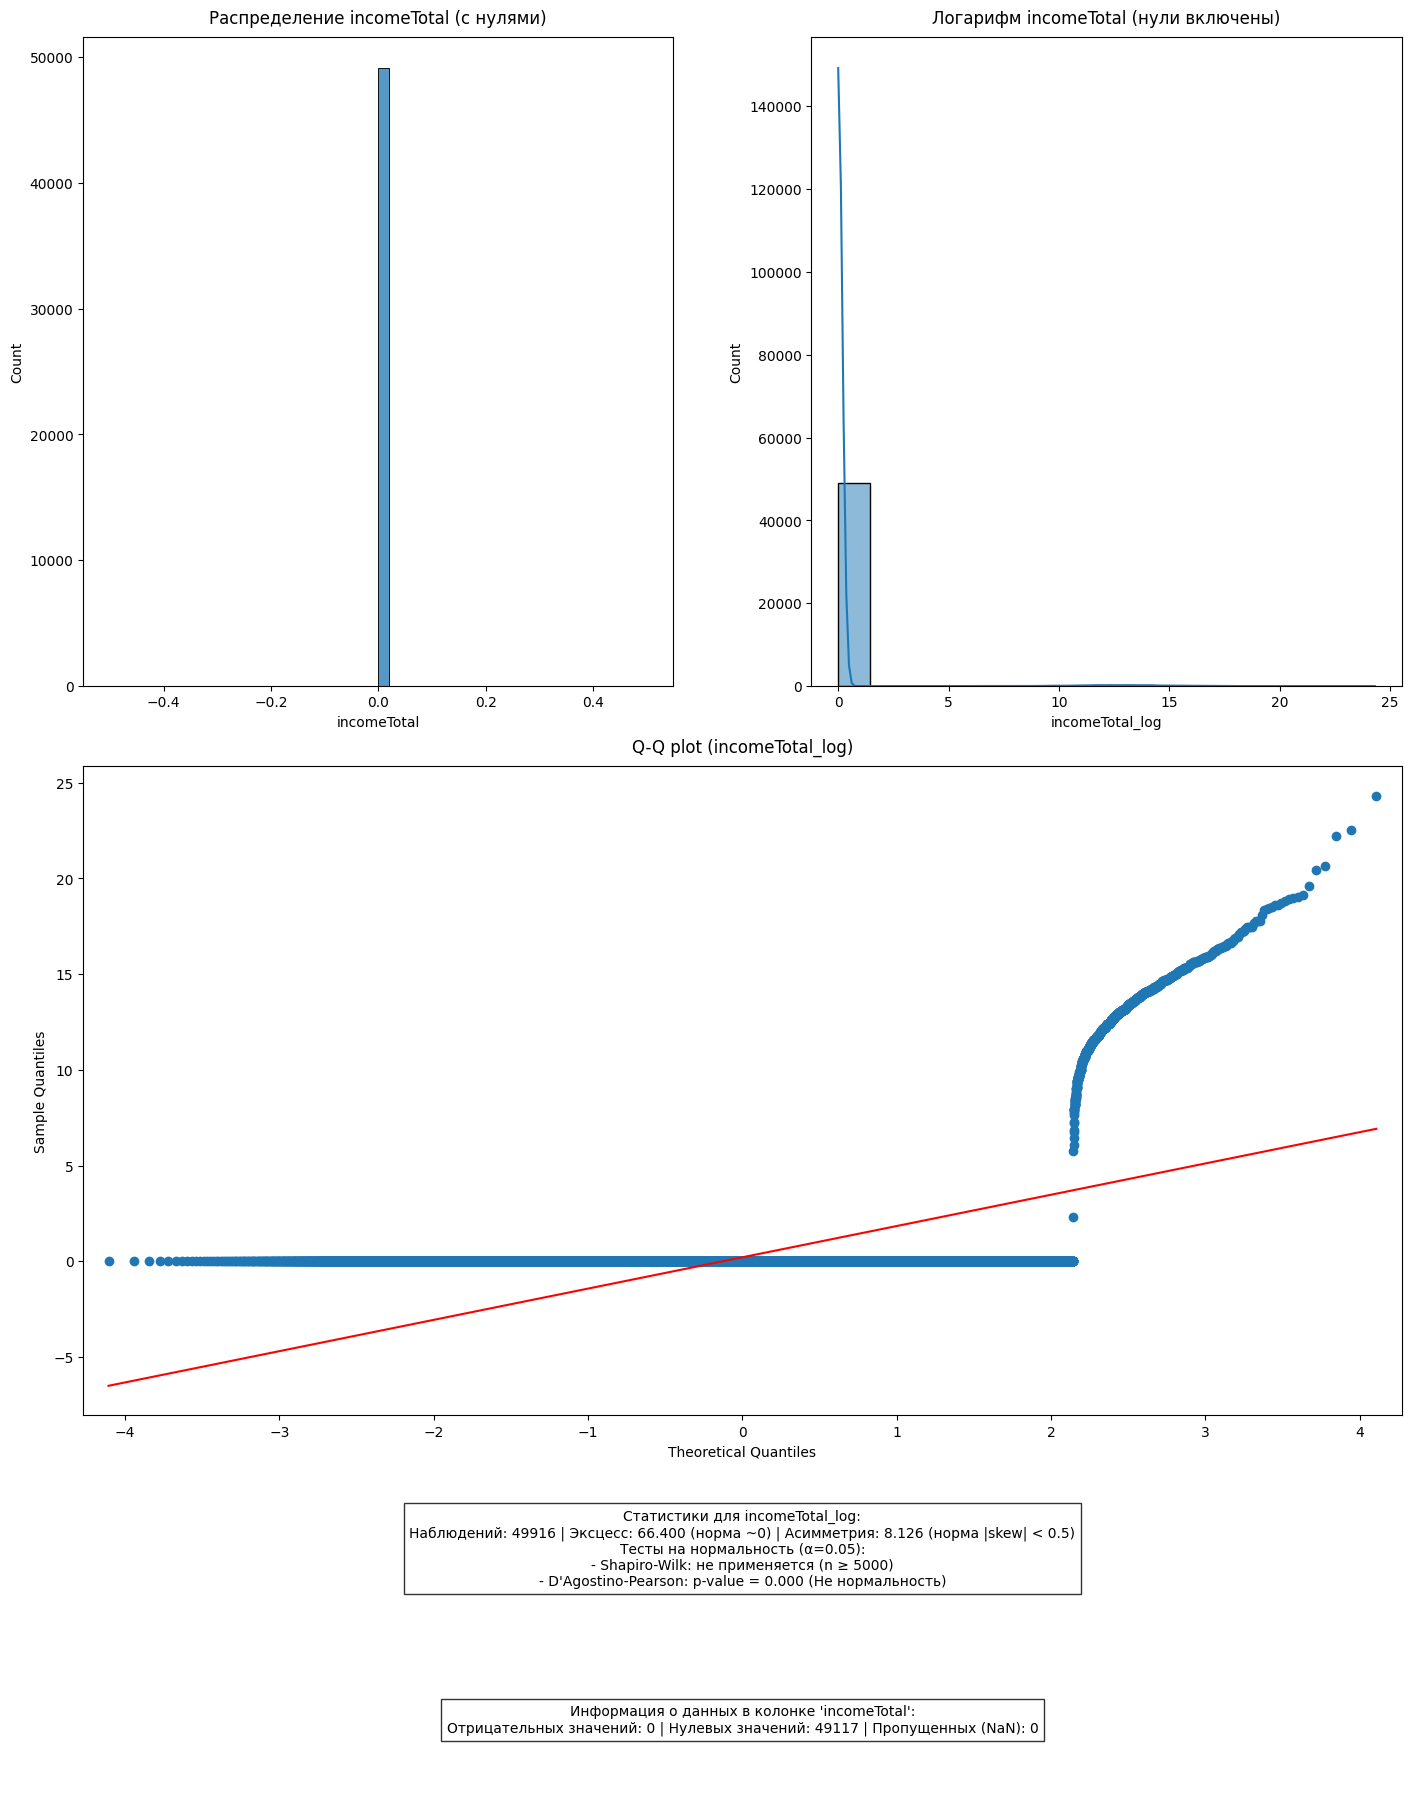


Анализ колонки: grantsCount


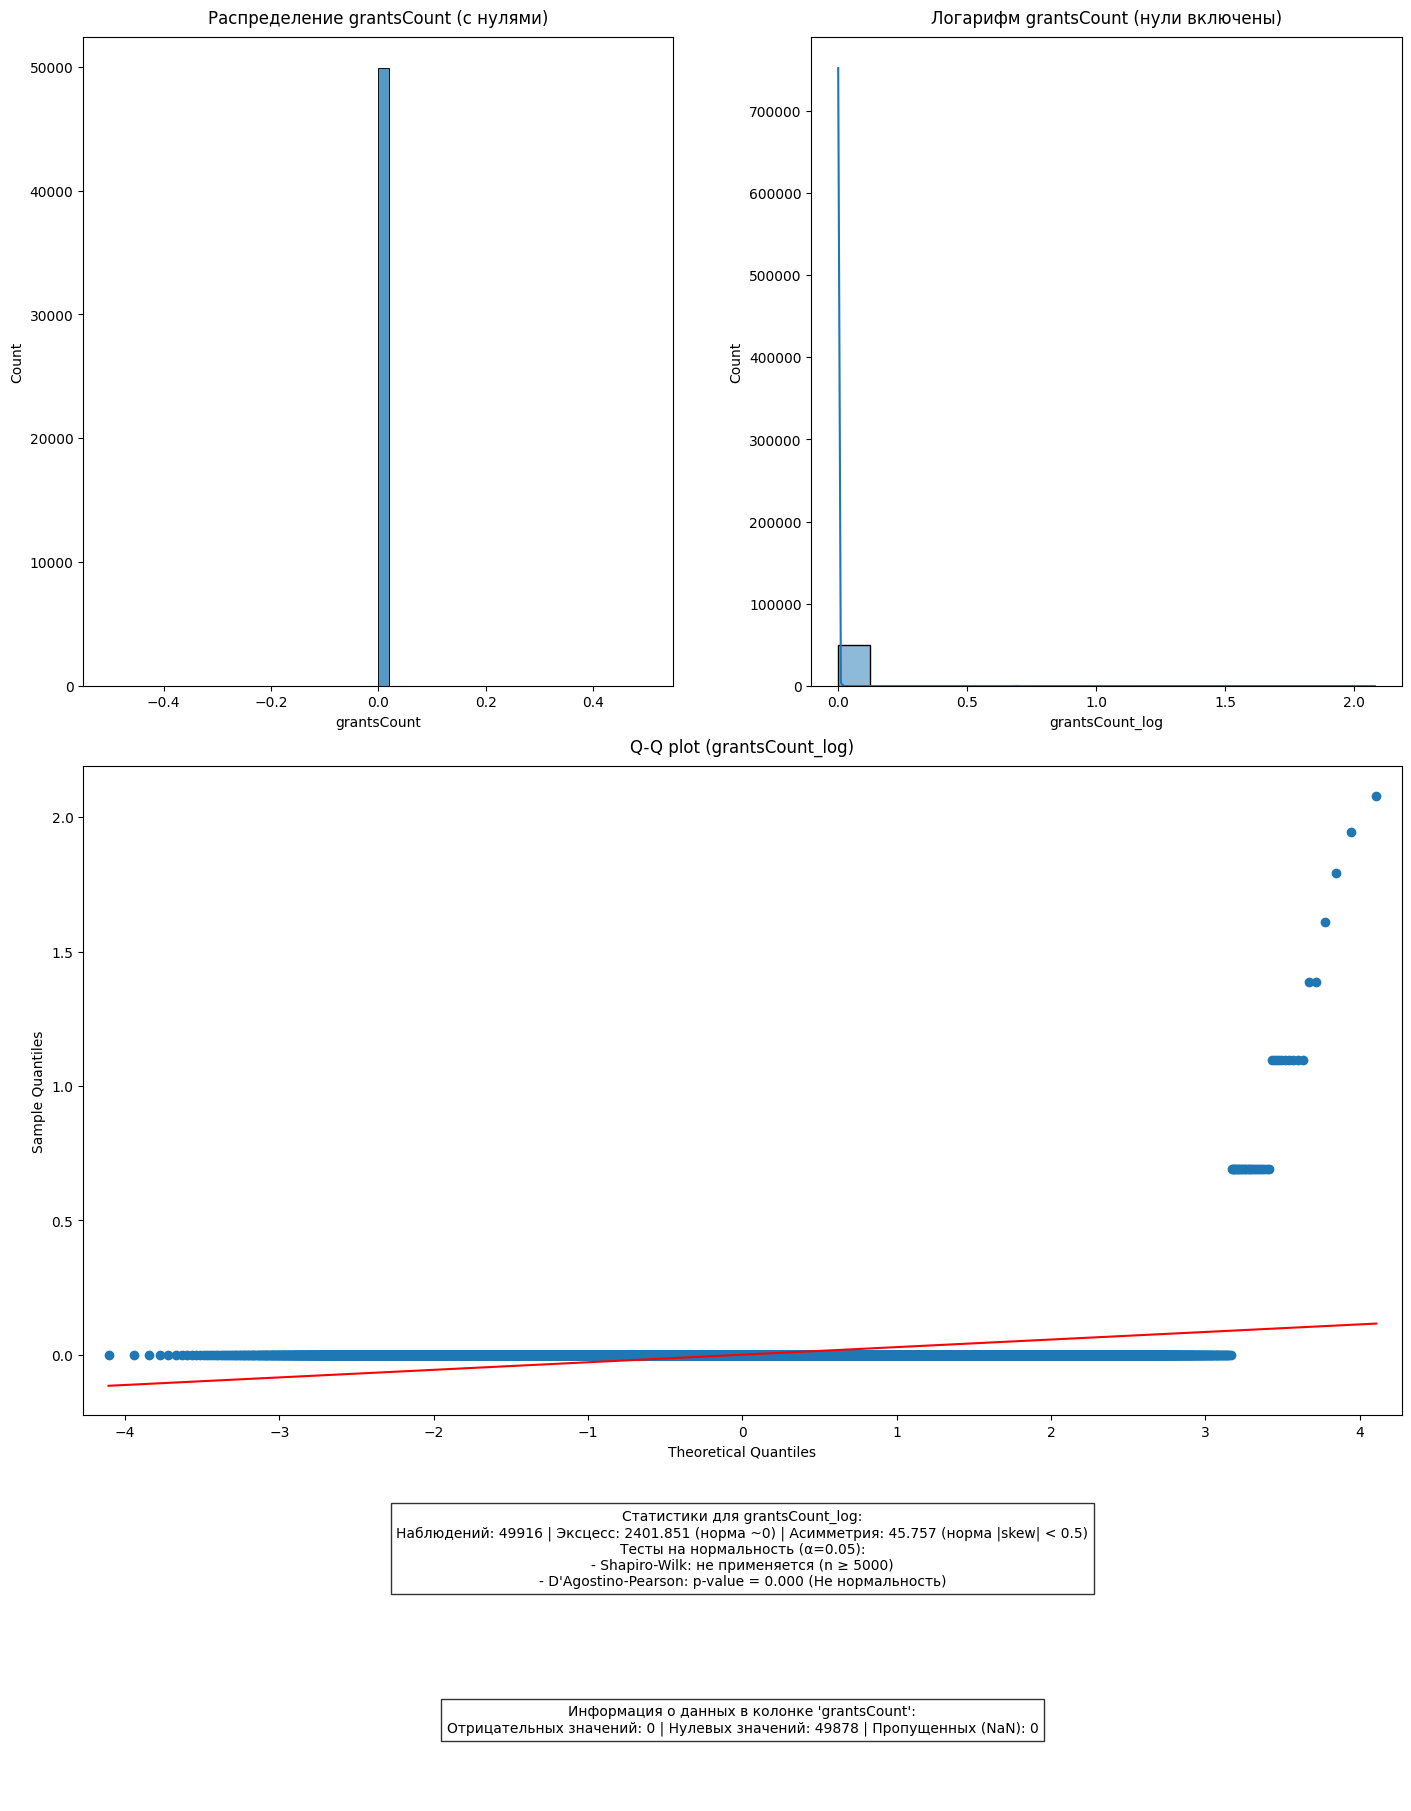


Анализ колонки: addOkvedCount


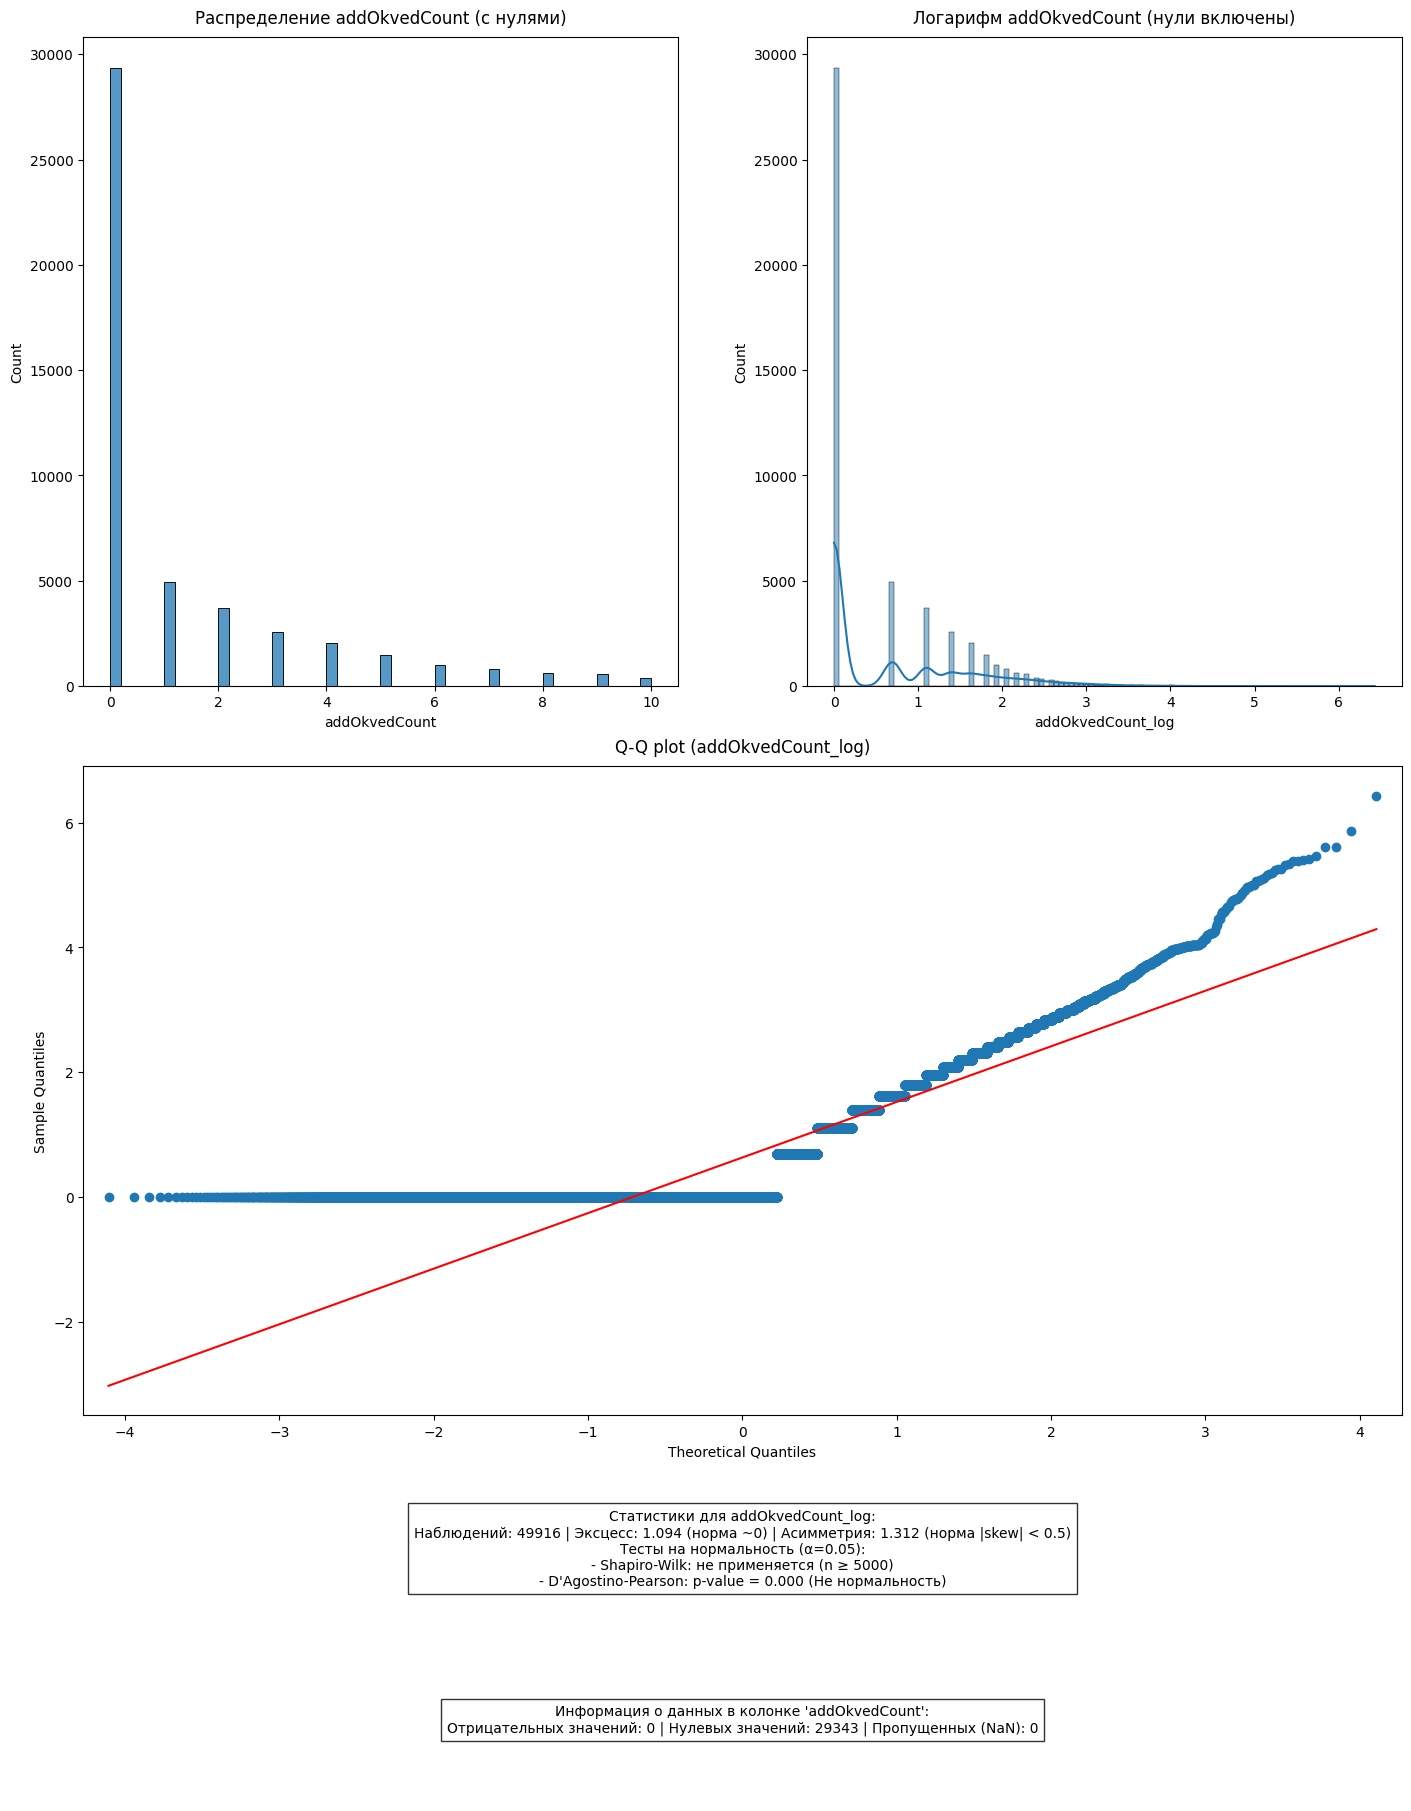


Анализ колонки: contrSum


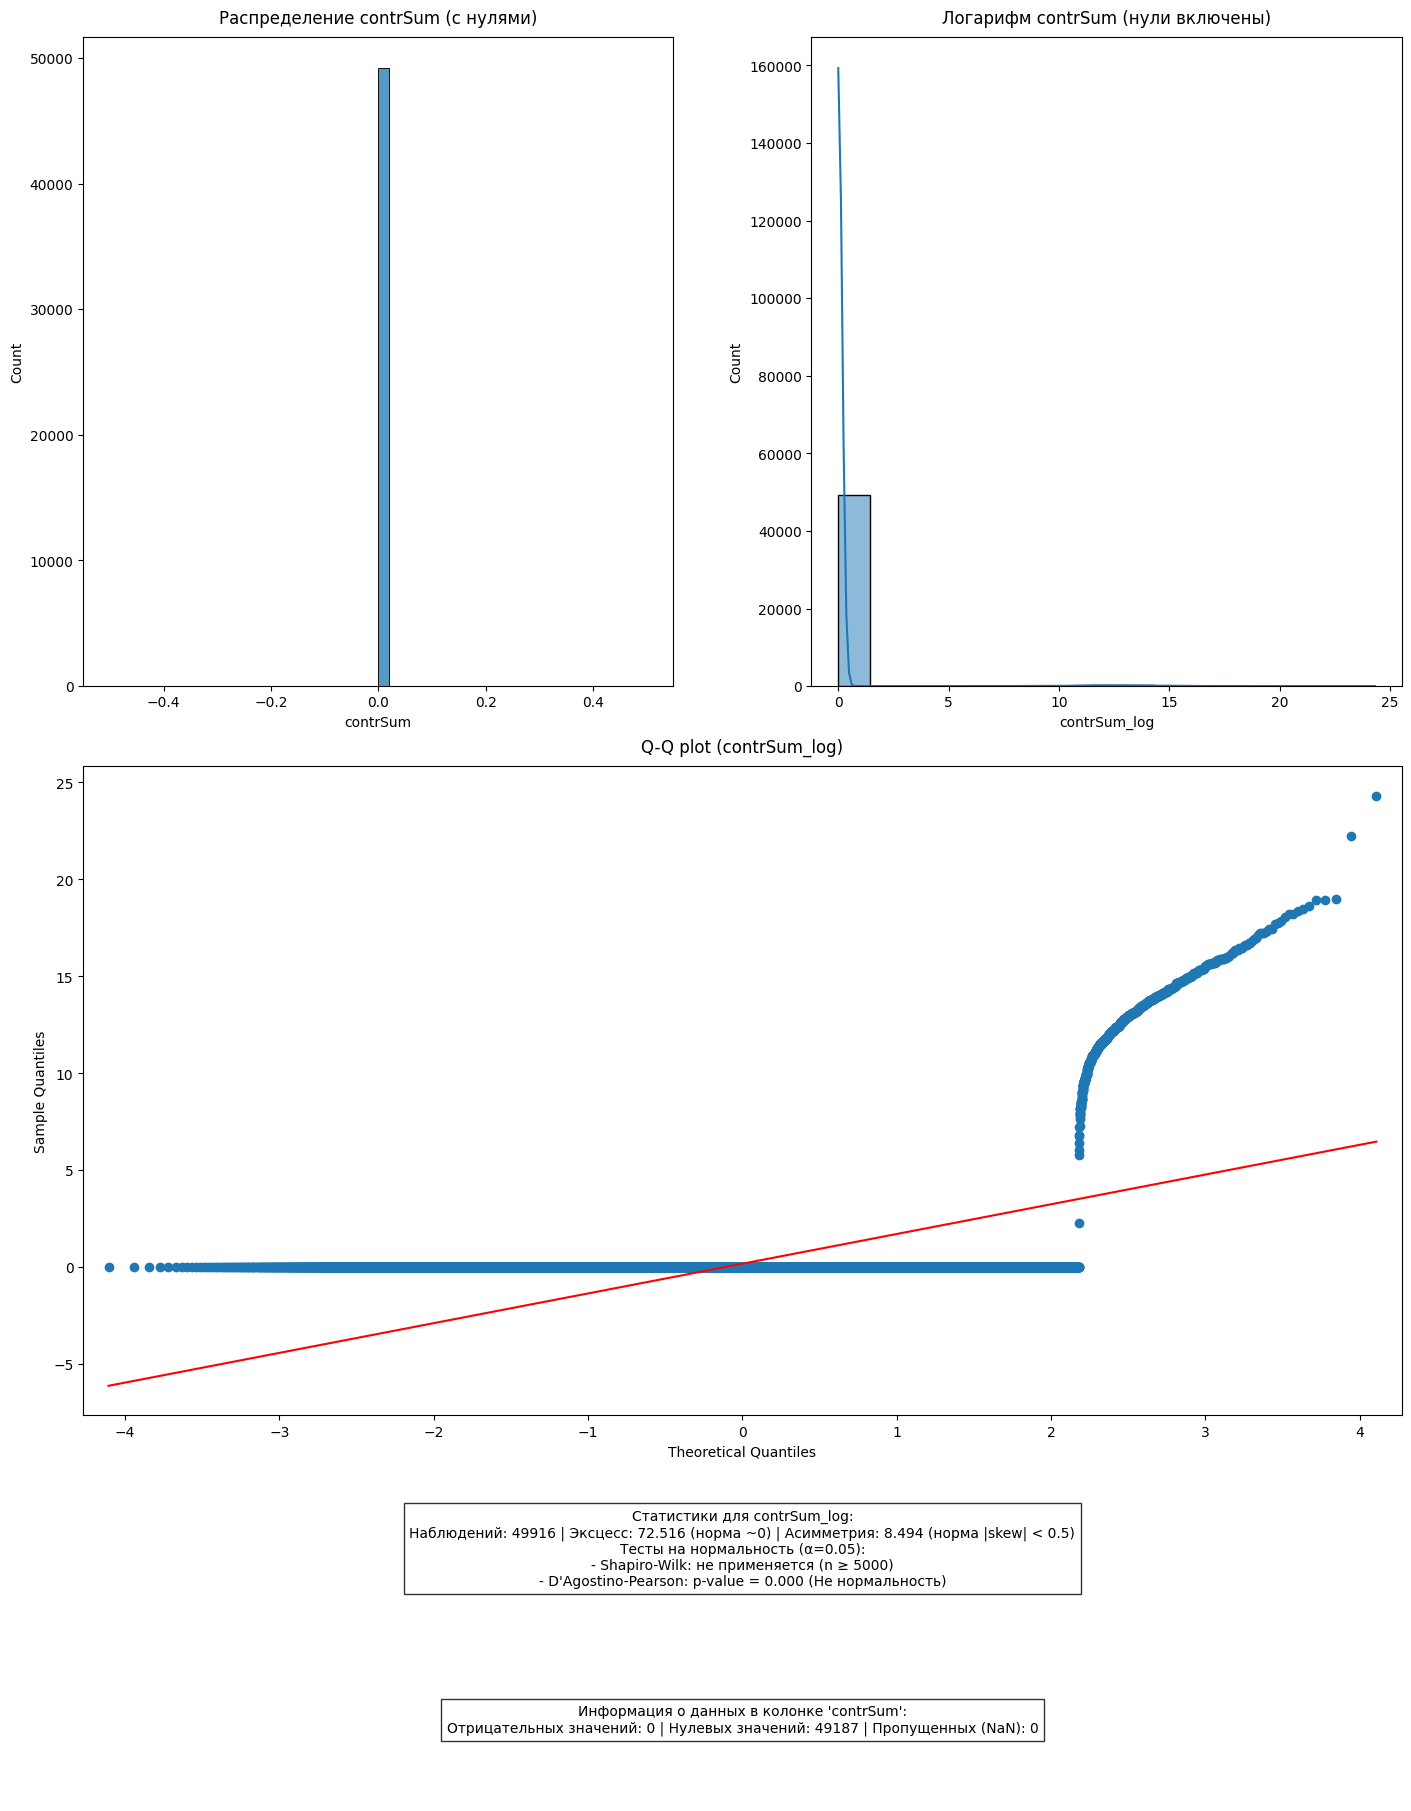


Анализ колонки: nkoAge_days


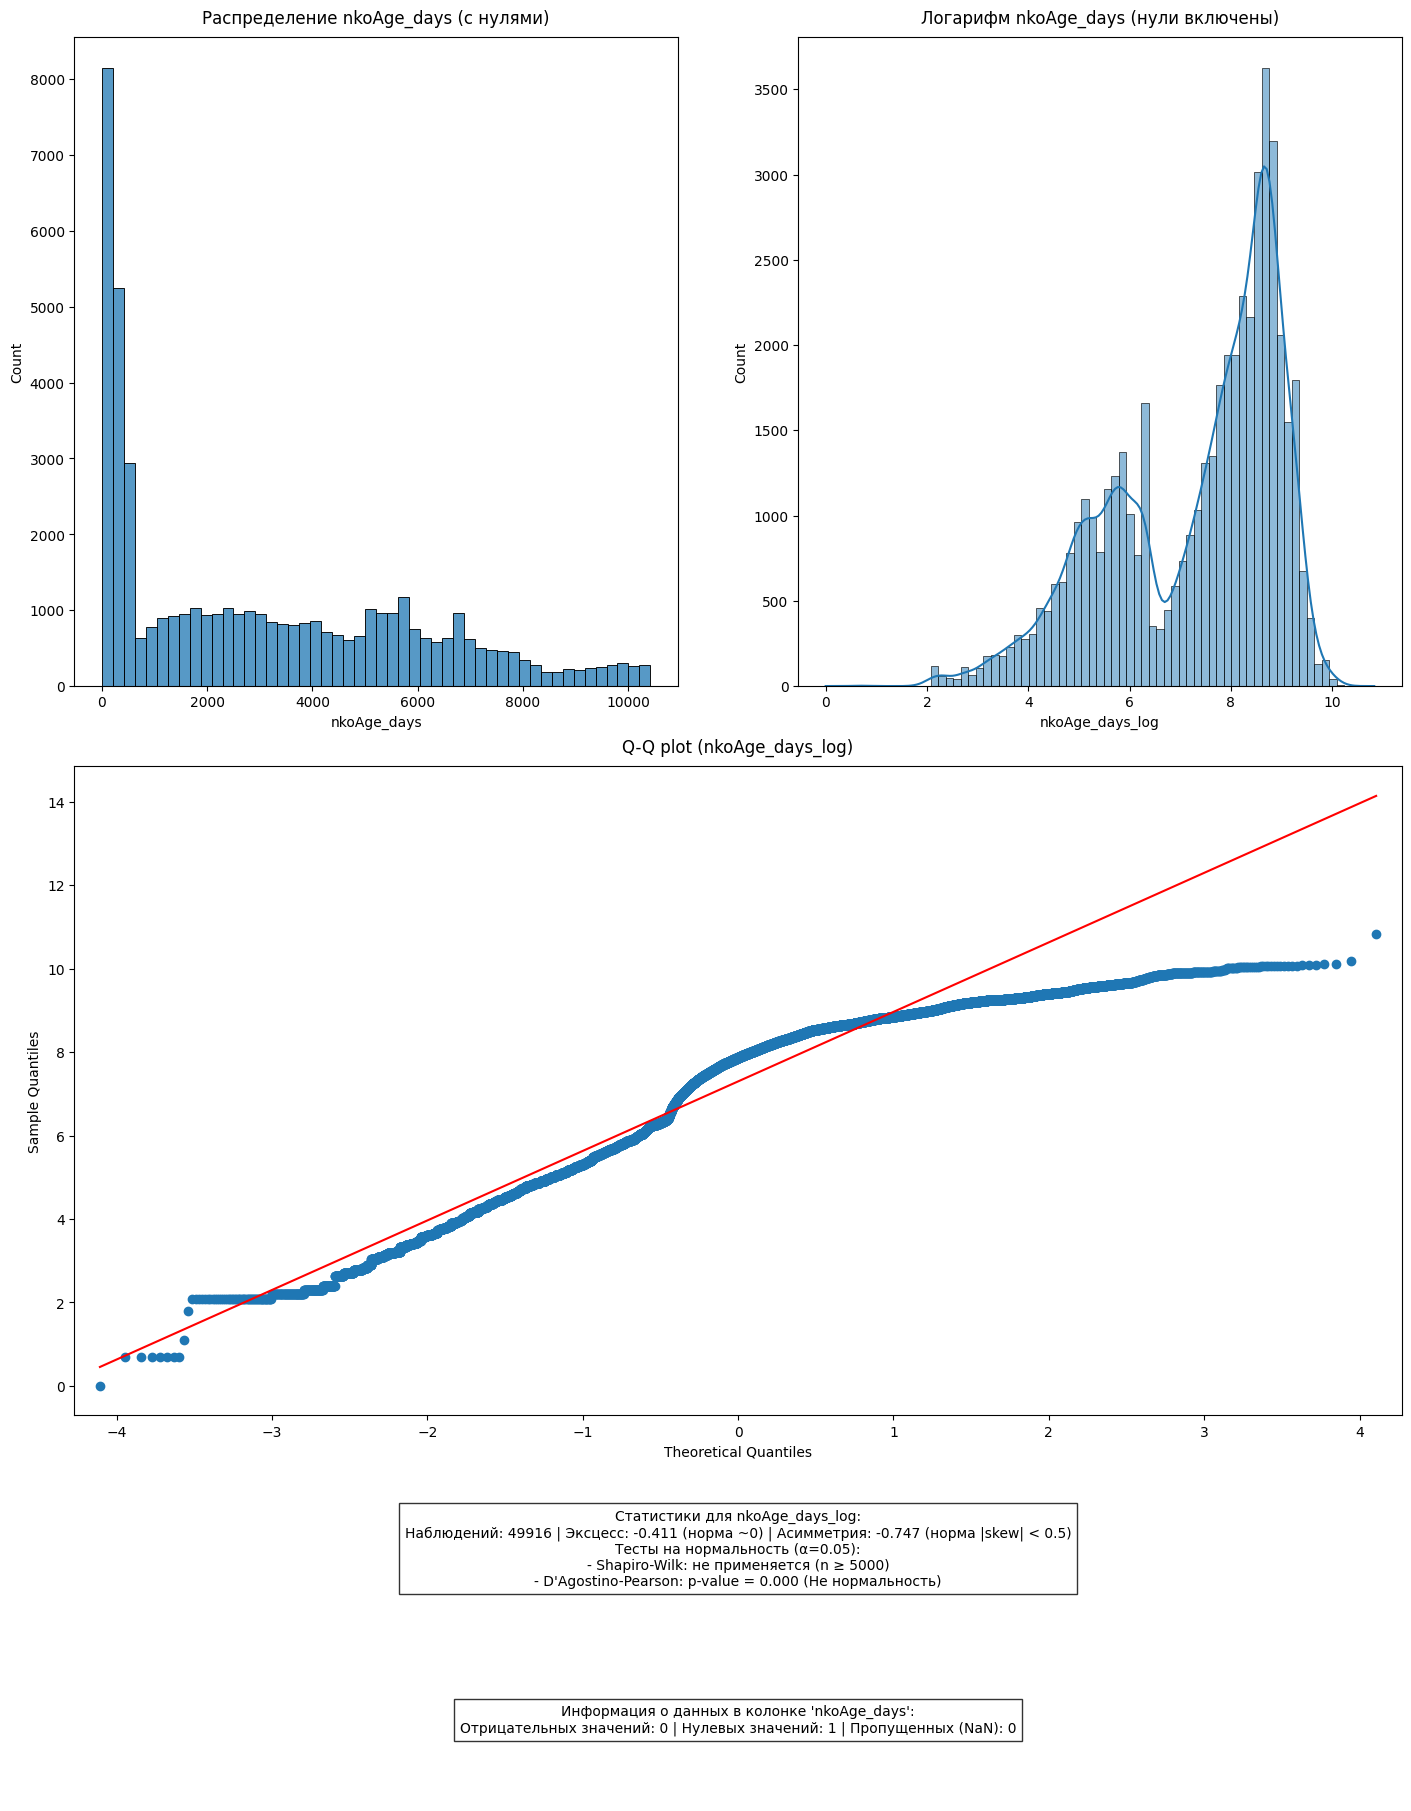


Анализ колонки: grantsSum


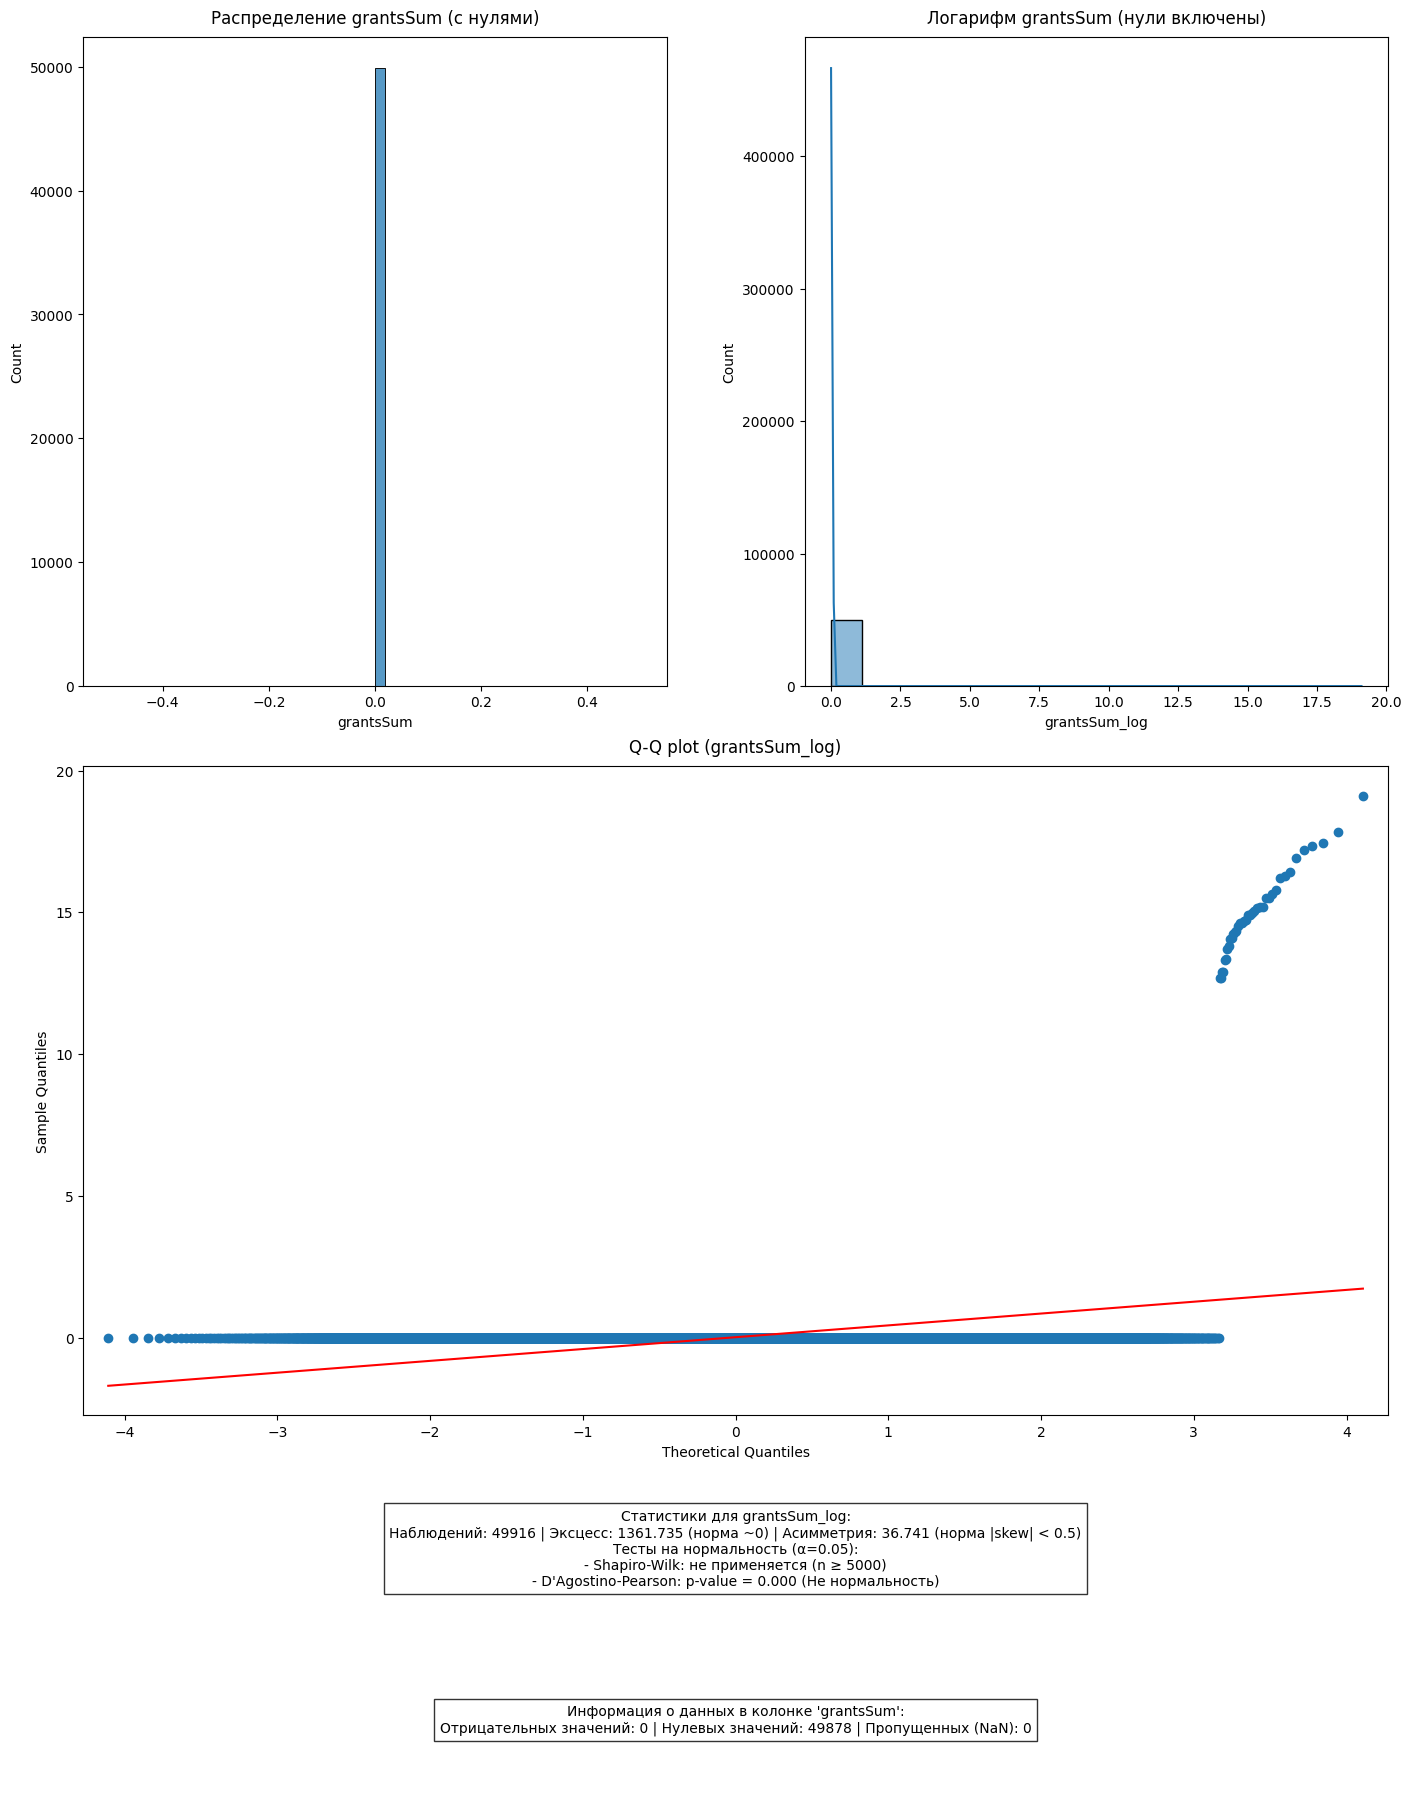

In [29]:
# без логарифмирования и с логарифмированием без нулей и с нулями.
# Данные не сбалансированы. много 0. Первичная визуализация полных датасетов показала, что необходимо исключить 
# нулевые значения для визуализаций, иначе графики не видны даже для логарифмированных данных.
# Числовые колонки для теста на нормальность. Сам тест на нормальность.

def analyze_numeric_columns(df, numeric_cols, figsize=(14, 18), alpha=0.05, exclude_zeros=False):
    """
    Анализирует числовые колонки с возможностью включения нулевых значений
    
    Параметры:
    ----------
    df : DataFrame
        Исходный датафрейм.
    numeric_cols : list
        Список числовых колонок для анализа.
    figsize : tuple, optional
        Размер графиков.
    alpha : float, optional
        Уровень значимости для тестов на нормальность.
    exclude_zeros : bool, optional
        Исключать ли нули при логарифмировании (по умолчанию False - не исключать)
    """
    # Создаем копию датафрейма для модификаций
    result_df = df.copy()
    
    for col in numeric_cols:
        try:
            print(f"\n{'='*50}\nАнализ колонки: {col}\n{'='*50}")   
            
            # 1. Подготовка данных
            temp_data = result_df[col].copy()
            
            # Обработка отрицательных значений (всегда исключаем)
            temp_data[temp_data < 0] = np.nan
            
            # Логарифмирование с учетом нулей
            log_col_name = f'{col}_log'
            if exclude_zeros:
                # Исключаем нули для логарифмирования
                log_data = temp_data[temp_data > 0].copy()
                result_df[log_col_name] = np.nan
                result_df.loc[log_data.index, log_col_name] = np.log1p(log_data)
                filtered_data = temp_data[temp_data > 0]  # Для гистограммы исходных данных
            else:
                # Включаем нули (log1p(0) = 0)
                result_df[log_col_name] = np.log1p(temp_data)
                filtered_data = temp_data  # Для гистограммы исходных данных
            
            # 2. Визуализация
            fig = plt.figure(figsize=figsize, constrained_layout=True)
            gs = fig.add_gridspec(4, 2, height_ratios=[2, 2, 0.5, 0.5])
            
            # Гистограмма исходных данных (с учетом exclude_zeros)
            ax1 = fig.add_subplot(gs[0, 0])
            clean_data = filtered_data.dropna()
            if len(clean_data) > 0:
                q95 = clean_data.quantile(0.95)
                filtered_data = clean_data[clean_data <= q95]
                bins = min(50, int(len(filtered_data)/10))
                sns.histplot(data=filtered_data, bins=bins, kde=False, ax=ax1)
            title_suffix = " (без нулей)" if exclude_zeros else " (с нулями)"
            ax1.set_title(f"Распределение {col}{title_suffix}", pad=10)
            
            # Гистограмма логарифмированных данных
            ax2 = fig.add_subplot(gs[0, 1])
            log_data = result_df[log_col_name].dropna()
            sns.histplot(data=log_data, kde=True, ax=ax2)
            ax2.set_title(f"Логарифм {col} (нули {'исключены' if exclude_zeros else 'включены'})", pad=10)
            
            # Q-Q plot для логарифмированных данных
            ax3 = fig.add_subplot(gs[1, :])
            qqplot(log_data, line='s', ax=ax3)
            ax3.set_title(f'Q-Q plot ({log_col_name})', pad=10)
            
            # 3. Статистики и тесты на нормальность
            ax4 = fig.add_subplot(gs[2, :])
            ax4.axis('off')
            
            # Тест Шапиро-Уилка (для n < 5000)
            if len(log_data) < 5000:
                shapiro_stat, shapiro_p = shapiro(log_data)
                shapiro_result = "Нормальность" if shapiro_p > alpha else "Не нормальность"
                shapiro_text = f"Shapiro-Wilk: p-value = {shapiro_p:.3f} ({shapiro_result})"
            else:
                shapiro_text = "Shapiro-Wilk: не применяется (n ≥ 5000)"
            
            # Тест Д'Агостино-Пирсона (работает для больших n)
            dagostino_stat, dagostino_p = normaltest(log_data)
            dagostino_result = "Нормальность" if dagostino_p > alpha else "Не нормальность"
            
            stats_text = (
                f"Статистики для {log_col_name}:\n"
                f"Наблюдений: {len(log_data)} | "
                f"Эксцесс: {kurtosis(log_data):.3f} (норма ~0) | "
                f"Асимметрия: {skew(log_data):.3f} (норма |skew| < 0.5)\n"
                f"Тесты на нормальность (α={alpha}):\n"
                f"- {shapiro_text}\n"
                f"- D'Agostino-Pearson: p-value = {dagostino_p:.3f} ({dagostino_result})"
            )
            
            ax4.text(0.5, 0.5, stats_text, ha='center', va='center', 
                    fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
            
            # 4. Информация о пропусках
            ax5 = fig.add_subplot(gs[3, :])
            ax5.axis('off')
            
            num_neg = (result_df[col] < 0).sum()
            num_zero = (result_df[col] == 0).sum()
            num_na = result_df[col].isna().sum()
            
            info_text = (
                f"Информация о данных в колонке '{col}':\n"
                f"Отрицательных значений: {num_neg} | "
                f"Нулевых значений: {num_zero} | "
                f"Пропущенных (NaN): {num_na}"
            )
            
            ax5.text(0.5, 0.5, info_text, ha='center', va='center', 
                     fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
            
            plt.show()
            
        except Exception as e:
            print(f"Ошибка при обработке колонки {col}: {str(e)}")
    
    return result_df
 
 
 
# Выбираем числовые колонки
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
# Исключим колонки бинарные и логарифмированные
cols_to_exclude = ['hasRegionalSupport', 'egrulStatus', 'getFunds', 'incomeTotal_log', 'contrCount_log',
                   'contrSum_log', 'grantsCount_log', 'grantsSum_log', 'fedSubsCount_log', 'fedSubsSum_log',
                   'nkoAge_days_log', 'addOkvedCount_log']  # Колонки, которые нужно исключить
# Оставляем, только реальные колонки  в df для исключения
cols_to_exclude_filtered = [col for col in cols_to_exclude if col in numeric_cols]
numeric_cols = list(set(numeric_cols) - set(cols_to_exclude_filtered))
print('Числовые признаки без нулей: 1.Распределение. 2 Log рапределение. 3. Q-Q plot Log рапределения.')

# Вариант 1: Анализ с исключением нулей
ex0_df = analyze_numeric_columns(df, numeric_cols, exclude_zeros=True)

print('Числовые признаки с нулями: 1.Распределение. 2 Log рапределение. 3. Q-Q plot Log рапределения.')
# Вариант 2: Анализ с включением нулей
in0_df = analyze_numeric_columns(df, numeric_cols, exclude_zeros=False)

На данных графиках без нулей:
1. Первый график распределение без логарифмирования, но с подобранным маштабом по оси y.
2. Второй с логарифмированием
3. Q-Q plot  для логарифмированных данных.

В основном сразу видно, что признаки не удовлетворяют нормальному распределения. Только 'grantSum_log' и 
'fedSubsSum_log' распределены нормально по тестам Шапиро- Вилка и Д'Аугостино- Пирсона, хотя Q-Q plot не идеальные.

Есть признаки, которые визуально кажутся нормальным: 'contrSum_log', 'incomeTotal_log', но тесты показали обратное.

Считаю, что наиболее важные признаки для анализа 'incomeTotal' и 'nkoAge_days'. Про них более подробно:

'nkoAge_days_log':

Статистики для логарифмированных данных:
Количество наблюдений: 49915
Эксцесс (Kurtosis): -0.416 (норма ~0)
Асимметрия (Skewness): -0.746 (норма |skew| < 0.5)
Разница Mean-Median: -0.342 SD (норма < 0.5)
Min: 0.00, Max: 10.83

Kurtosis: -0.416(норма~0) - Отрицательный эксцесс означает, что распределение более плоское (платикуртическое), чем нормальное. Пик ниже, а хвосты тоньше, чем у нормального распределения.

Skewness: |-0.75| > 0.5(норма < 0.5) - левостронняя ассиметрия

Mean-Median difference: -0.34 SD, |Mean - Median| > 0.3 SD - не значительная асимметрия. (норма <0.5)
Mean - Median = -0.34 SD означает, что среднее меньше медианы.

Q-Q plot - точки не лежат на прямой линии - распределение не нормальное.
Отклонения значительные.


'incomeTotal_log':

Статистики для логарифмированных данных:
Количество наблюдений: 799
Эксцесс (Kurtosis): 1.553 (норма ~0)
Асимметрия (Skewness): 0.3 (норма |skew| < 0.5)
Разница Mean-Median: 0.03 SD (норма < 0.5)
Min: 0.00, Max: 10.83

Kurtosis: 1.553 Эксцесс (Kurtosis = 1.553) > 0 (для нормального). Распределение более острое по сравнению с нормальным. Больше островершинности и тяжелые хвосты.

Skewness: 0.30 < 0.5 - указывает на слабую правостороннюю асимметрию (правый хвост длиннее).
	Но поскольку Mean - Median = 0.03 SD, это означает, что:
	Среднее и медиана почти совпадают, что не согласуется с skewness = 0.30.
	Возможная причина: выбросы в правом хвосте слабо влияют на среднее, но увеличивают skewness.требует проверки на выбросы.

Mean-Median difference: 0.03 SD, |Mean - Median| < 0.1 SD - симметрия.

QQ-plot показывает отклонения в хвостах - возможно, есть редкие, но значимые экстремальные значения, что видно на графике распределения- видны повышенные бары в начале и конце рейнджа объема финансирования.

Распределение не нормальное, но для многих практических задач (например, регрессионного анализа при большом n, деревья/ансамбли) можно принять как условно нормальное.
Если хвосты критичны — надо обработать выбросы или использовать непараметрические методы.

На данных графиках с нулями:

Признак 'nkoAge_days' не изменился, 'addOkvedCount' имеет схожий вид, остальные признаки стали еще менее похожи на нормальное распределение. Все признаки распределены не нормально.

Обрабатываем выбросы.

Реализуем алгоритм метода z-отклонения с логарифмированием. И Метод Тьки с логарифмированием.
Метод непараметрический, например: Межквартильный размах (IQR) (если не нормальное распределение даже после логарифмирования). Работает для любых распределений, включая экспоненциальные и с тяжелыми хвостами.

In [30]:
#ex0_df.info()  # без нулей
df.info()			# df до обработки
#in0_df.info()  #  с нулями

#df=in0_df.copy()  # выберем рабочий файл

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49916 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ogrn                49916 non-null  category
 1   regionCode          49916 non-null  category
 2   hasRegionalSupport  49916 non-null  int8    
 3   minjustForm         49916 non-null  category
 4   address             49916 non-null  object  
 5   incomeTotal         49916 non-null  float64 
 6   egrulStatus         49916 non-null  int8    
 7   mainOkvedName       49916 non-null  category
 8   mainOkvedCode       49916 non-null  category
 9   addOkvedCount       49916 non-null  int64   
 10  grantsCount         49916 non-null  int64   
 11  grantsSum           49916 non-null  float64 
 12  fedSubsCount        49916 non-null  int64   
 13  fedSubsSum          49916 non-null  float64 
 14  contrCount          49916 non-null  int64   
 15  contrSum            49916 non-null  

In [31]:
# Учитывать нормальность распределения, будем исползовать логарифмирование. 
# Обработаем выбросы. Будем учитывать, что нулевые значенияя нужны для ML их надо обработать перед log.
def safe_log(x):
    """Безопасное логарифмирование, нули оставляем"""
    return np.log(x) if x > 0 else np.nan

def outliers_iqr(data, feature, log_scale=False):
    """Обработка выбросов по методу межквартильного размаха (IQR) с сохранением нулей"""
    try:
        temp_data = data[feature].copy()
        
        if log_scale:
            # Работаем только с положительными значениями для расчета границ
            positive_data = temp_data[temp_data > 0]
            if len(positive_data) < 10:  # Минимальное количество для анализа
                return pd.DataFrame(), data
            log_values = positive_data.apply(np.log)
            
            q1 = log_values.quantile(0.25)
            q3 = log_values.quantile(0.75)
            iqr = q3 - q1
            lower_bound = np.exp(q1 - 1.5 * iqr)
            upper_bound = np.exp(q3 + 1.5 * iqr)
            
            # Выбросы - только положительные значения за границами
            mask = (temp_data == 0) | ((temp_data > 0) & (temp_data >= lower_bound) & (temp_data <= upper_bound))
        else:
            q1 = temp_data.quantile(0.25)
            q3 = temp_data.quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            mask = (temp_data >= lower_bound) & (temp_data <= upper_bound)
        
        outliers = data[~mask]
        cleaned = data[mask]
        
        return outliers, cleaned
    except Exception as e:
        print(f"Ошибка в outliers_iqr для {feature}: {str(e)}")
        return pd.DataFrame(), data

def outliers_z_score(data, feature, log_scale=False):
    """Обработка выбросов по методу z-score с сохранением нулей"""
    try:
        temp_data = data[feature].copy()
        
        if log_scale:
            positive_data = temp_data[temp_data > 0]
            if len(positive_data) < 10:
                return pd.DataFrame(), data
            log_values = positive_data.apply(np.log)
            
            mu = log_values.mean()
            sigma = log_values.std()
            lower_bound = np.exp(mu - 3 * sigma)
            upper_bound = np.exp(mu + 3 * sigma)
            
            mask = (temp_data == 0) | ((temp_data > 0) & (temp_data >= lower_bound) & (temp_data <= upper_bound))
        else:
            mu = temp_data.mean()
            sigma = temp_data.std()
            lower_bound = mu - 3 * sigma
            upper_bound = mu + 3 * sigma
            
            mask = (temp_data >= lower_bound) & (temp_data <= upper_bound)
        
        outliers = data[~mask]
        cleaned = data[mask]
        
        return outliers, cleaned
    except Exception as e:
        print(f"Ошибка в outliers_z_score для {feature}: {str(e)}")
        return pd.DataFrame(), data

def outliers_cat(data, feature):
    """Обработка редких категорий для категориальных признаков.
    Не применяется, считаем, что все значимые тем более, что выбросы обрабатываются послндовательно 
    для разных частей дампа данных"""
    try:
        if not isinstance(data[feature].dtype, CategoricalDtype):
            data[feature] = data[feature].astype('category')
            
        threshold = 0.005
        counts = data[feature].value_counts(normalize=True)
        rare_categories = counts[counts < threshold].index
        
        cleaned = data.copy()
        if 'other' not in cleaned[feature].cat.categories:
           	# Добавляем новую категорию 'other'
            cleaned[feature] = cleaned[feature].cat.add_categories(['other'])
        
        cleaned.loc[cleaned[feature].isin(rare_categories), feature] = 'other'
        cleaned[feature] = cleaned[feature].cat.remove_unused_categories()
        
        outliers = data[data[feature].isin(rare_categories)]
        
        return outliers, cleaned
    except Exception as e:
        print(f"Ошибка в outliers_cat для {feature}: {str(e)}")
        return pd.DataFrame(), data

def outliers(data, feature, type_feature, normal=False, log_scale=False):
    """Основная функция для обработки выбросов"""
    try:
        if type_feature == 'number':
            if normal:
                return outliers_z_score(data, feature, log_scale)
            else:
                return outliers_iqr(data, feature, log_scale)
        elif type_feature == 'category':
            return outliers_cat(data, feature)
        else:
            raise ValueError("type_feature должно быть или 'number' или 'category'")
    except Exception as e:
        print(f"Ошибка в функции outliers для колонки {feature}: {str(e)}")
        return pd.DataFrame(), data

def process_outliers(df, columns_config):
    """Функция для обработки выбросов с сохранением нулей"""
    cleaned_df = df.copy()
    outliers_report = {}
    
    for col, config in columns_config.items():
        if col not in df.columns:
            print(f"Предупреждение: Колонка {col} не найдена в датафрейме")
            continue
            
        try:
            outliers_result, cleaned_result = outliers(
                data=cleaned_df,
                feature=col,
                type_feature=config['type'],
                normal=config.get('normal', False),
                log_scale=config.get('log_scale', False)
            )
            
            outliers_report[col] = {
                'outliers_count': len(outliers_result),
                'cleaned_count': len(cleaned_result),
                'zeros_count': (df[col] == 0).sum(),
                'zeros_remaining': (cleaned_result[col] == 0).sum()
            }
            
            cleaned_df = cleaned_result
            
        except Exception as e:
            print(f"Ошибка при обработке колонки {col}: {str(e)}")
            outliers_report[col] = {
                'error': str(e),
                'outliers_count': 0,
                'cleaned_count': len(df),
                'zeros_count': (df[col] == 0).sum(),
                'zeros_remaining': (df[col] == 0).sum()
            }
    
    # Генерация отчета
    print("\nСводный отчет по обработке выбросов:")
    report_data = []
    for col, stats in outliers_report.items():
        if 'error' in stats:
            report_data.append({
                'Колонка': col,
                'Тип': columns_config[col]['type'],
                'Статус': 'Ошибка',
                'Ошибка': stats['error'],
                'Выбросов': 0,
                'Осталось': len(df),
                'Нулевых': stats['zeros_count'],
                'Нулевых сохранено': stats['zeros_remaining']
            })
        else:
            report_data.append({
                'Колонка': col,
                'Тип': columns_config[col]['type'],
                'Статус': 'Успешно',
                'Ошибка': '',
                'Выбросов': stats['outliers_count'],
                'Осталось': stats['cleaned_count'],
                'Нулевых': stats['zeros_count'],
                'Нулевых сохранено': stats['zeros_remaining'],
                '% выбросов': f"{stats['outliers_count']/(stats['outliers_count']+stats['cleaned_count']):.1%}"
            })
    
    report_df = pd.DataFrame(report_data)
    print(report_df.to_markdown(index=False))
    
    return cleaned_df, outliers_report

# Конфигурация обработки колонок (нули сохраняются)
columns_config = {
    'incomeTotal': {'type': 'number', 'normal': False, 'log_scale': True},
    'grantsSum': {'type': 'number', 'normal': True, 'log_scale': True},
    'fedSubsSum': {'type': 'number', 'normal': True, 'log_scale': True},
    'contrSum': {'type': 'number', 'normal': False, 'log_scale': True},
    'addOkvedCount': {'type': 'number', 'normal': False, 'log_scale': True},
    'grantsCount': {'type': 'number', 'normal': False, 'log_scale': True},
    'fedSubsCount': {'type': 'number', 'normal': False, 'log_scale': True},
    'contrCount': {'type': 'number', 'normal': False, 'log_scale': True},
    'nkoAge_days': {'type': 'number', 'normal': False, 'log_scale': True}
    # Категории не будем обрабатывать т.к. изменение набора категорий могу не совпадать в разных дампах
    #'regionCode': {'type': 'category'},
    #'minjustForm': {'type': 'category'},
    #'mainOkvedCode': {'type': 'category'}
}

# Основной процесс обработки
cleaned_df, report = process_outliers(df, columns_config)
df=cleaned_df.copy() # выберем рабочий файл


Сводный отчет по обработке выбросов:
| Колонка       | Тип    | Статус   | Ошибка   |   Выбросов |   Осталось |   Нулевых |   Нулевых сохранено | % выбросов   |
|:--------------|:-------|:---------|:---------|-----------:|-----------:|----------:|--------------------:|:-------------|
| incomeTotal   | number | Успешно  |          |         20 |      49896 |     49117 |               49117 | 0.0%         |
| grantsSum     | number | Успешно  |          |          0 |      49896 |     49878 |               49860 | 0.0%         |
| fedSubsSum    | number | Успешно  |          |          0 |      49896 |     49874 |               49861 | 0.0%         |
| contrSum      | number | Успешно  |          |          4 |      49892 |     49187 |               49183 | 0.0%         |
| addOkvedCount | number | Успешно  |          |        327 |      49565 |     29343 |               29339 | 0.7%         |
| grantsCount   | number | Успешно  |          |          1 |      49564 |     49878 |        

EDA - разведочный анализ. 

Что нам могут дать данные, и как признаки могут быть взаимосвязаны между собой?

Гистограммы признаков мы построили в предыд. разделе. И многое узнали: Несбалансированность.  Множество нулей. Только два признака 'grantsSum_log' и 'fedSubsSum_log' распределенных нормально. Большой объем выборки.

Признаки связанные с целевым событием - получения финансирования:
 incomeTotal  float64
 grantsCount  int64         
 grantsSum    float64      
 fedSubsCount int64         
 fedSubsSum   float64       
 contrCount   int64         
 contrSum	  float64

Распределение НКО по регионам.

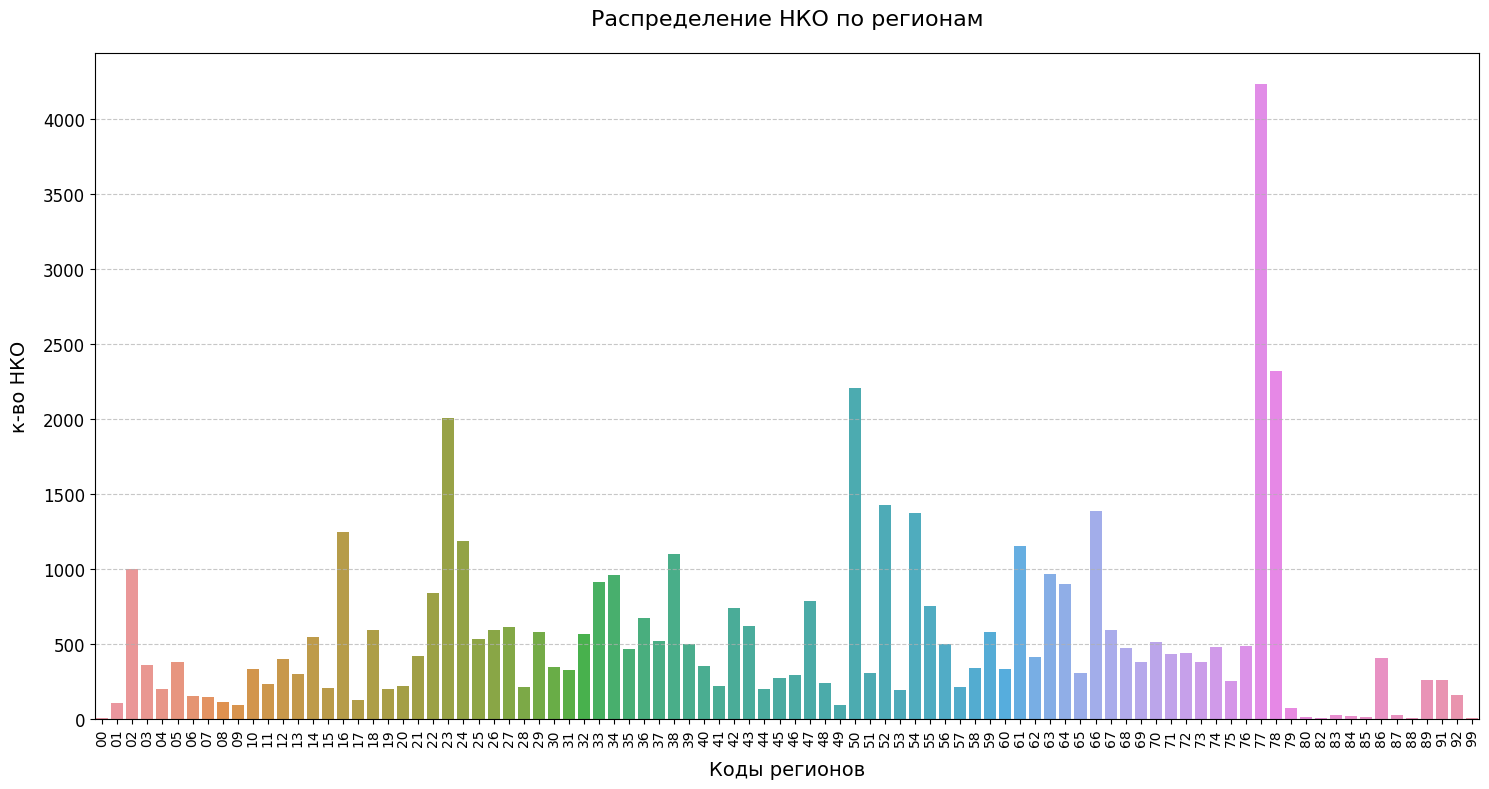

In [32]:
# Как НКО распределены по регионам.
from matplotlib.ticker import MaxNLocator
# Построение гистограммы распределения по категориям
# Построение гистограммы частот
# Настройка размера графика
plt.figure(figsize=(15, 8))
# Построение гистограммы частот
sns.countplot(x='regionCode', data=df)
# Настройка подписей осей
plt.title('Распределение НКО по регионам', fontsize=16, pad=20)
plt.xlabel('Коды регионов', fontsize=14, labelpad=10)
plt.ylabel('к-во НКО', fontsize=14, labelpad=10)
#plt.xticks(fontsize=12, rotation=90)
#plt.xticks(range(0, len(df['mainOkvedCode']), 5), df['mainOkvedCode'][::5], rotation=90)
plt.yticks(fontsize=12)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=100))  # Оставить 100 подписей
plt.xticks(rotation=90)
# Настройка сетки
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Настройка легенды (если есть)
#plt.legend(title='Легенда', title_fontsize=12, fontsize=10)
# Улучшение компоновки
plt.tight_layout()
# Отображение графика
plt.show();

Распределение по регионам. Подавляющее большенство НКО в Москве. Далее Московская область, Санкт-Перербургский регион, Краснодарский край. Есть и регионы с малым к-м НКО. Здесь выбросов нет.

Распределение НКО по основному виду экономической деятельности.

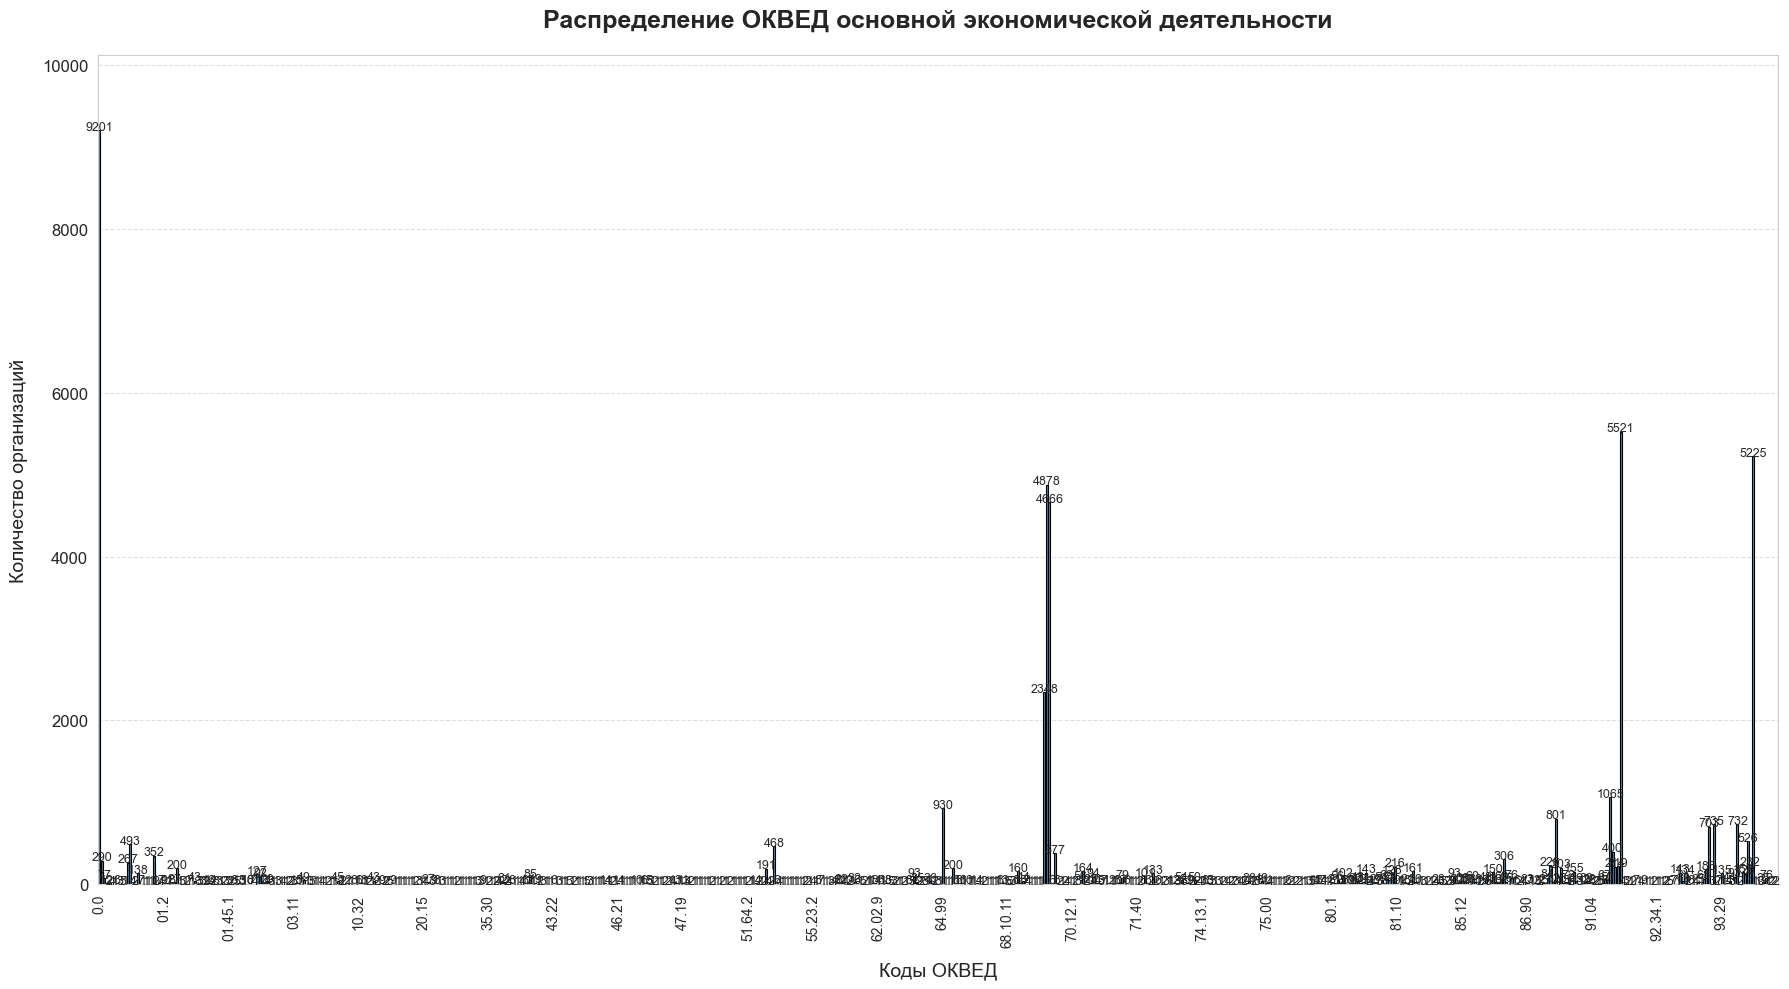

In [33]:
from matplotlib.ticker import MaxNLocator
sns.set_style("whitegrid")
# Настройка стиля
#plt.style.use('seaborn-whitegrid')
# Построение гистограммы
plt.figure(figsize=(18, 10))
ax = sns.countplot(
    x='mainOkvedCode', 
    data=ex0_df,
    color='steelblue',  # Яркий цвет столбцов
    edgecolor='black',  # Черная обводка
    linewidth=0.8       # Толщина обводки
)

# Настройка заголовков и осей
plt.title('Распределение ОКВЕД основной экономической деятельности', 
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Коды ОКВЕД', fontsize=14, labelpad=10)
plt.ylabel('Количество организаций', fontsize=14, labelpad=10)

# Настройка шкалы оси X
ax.xaxis.set_major_locator(MaxNLocator(nbins=30))  # Оптимальное количество подписей
plt.xticks(
    rotation=90,
    fontsize=10,
    ha='center'  # Центрирование подписей
)

# Улучшение оси Y
plt.yticks(fontsize=12)
ax.set_ylim(0, ex0_df['mainOkvedCode'].value_counts().max() * 1.1)  # Добавляем 10% сверху

# Добавление значений на столбцы
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Показываем только ненулевые значения
        ax.text(
            p.get_x() + p.get_width()/2.,
            height + 5,
            f'{int(height)}',
            ha="center",
            fontsize=9
        )

# Настройка сетки
ax.grid(axis='y', linestyle='--', alpha=0.6, linewidth=0.8)

# Улучшение компоновки
plt.tight_layout()

# Сохранение графика
plt.savefig('./pic/okved_distribution.png', dpi=300, bbox_inches='tight')

# Отображение
plt.show()

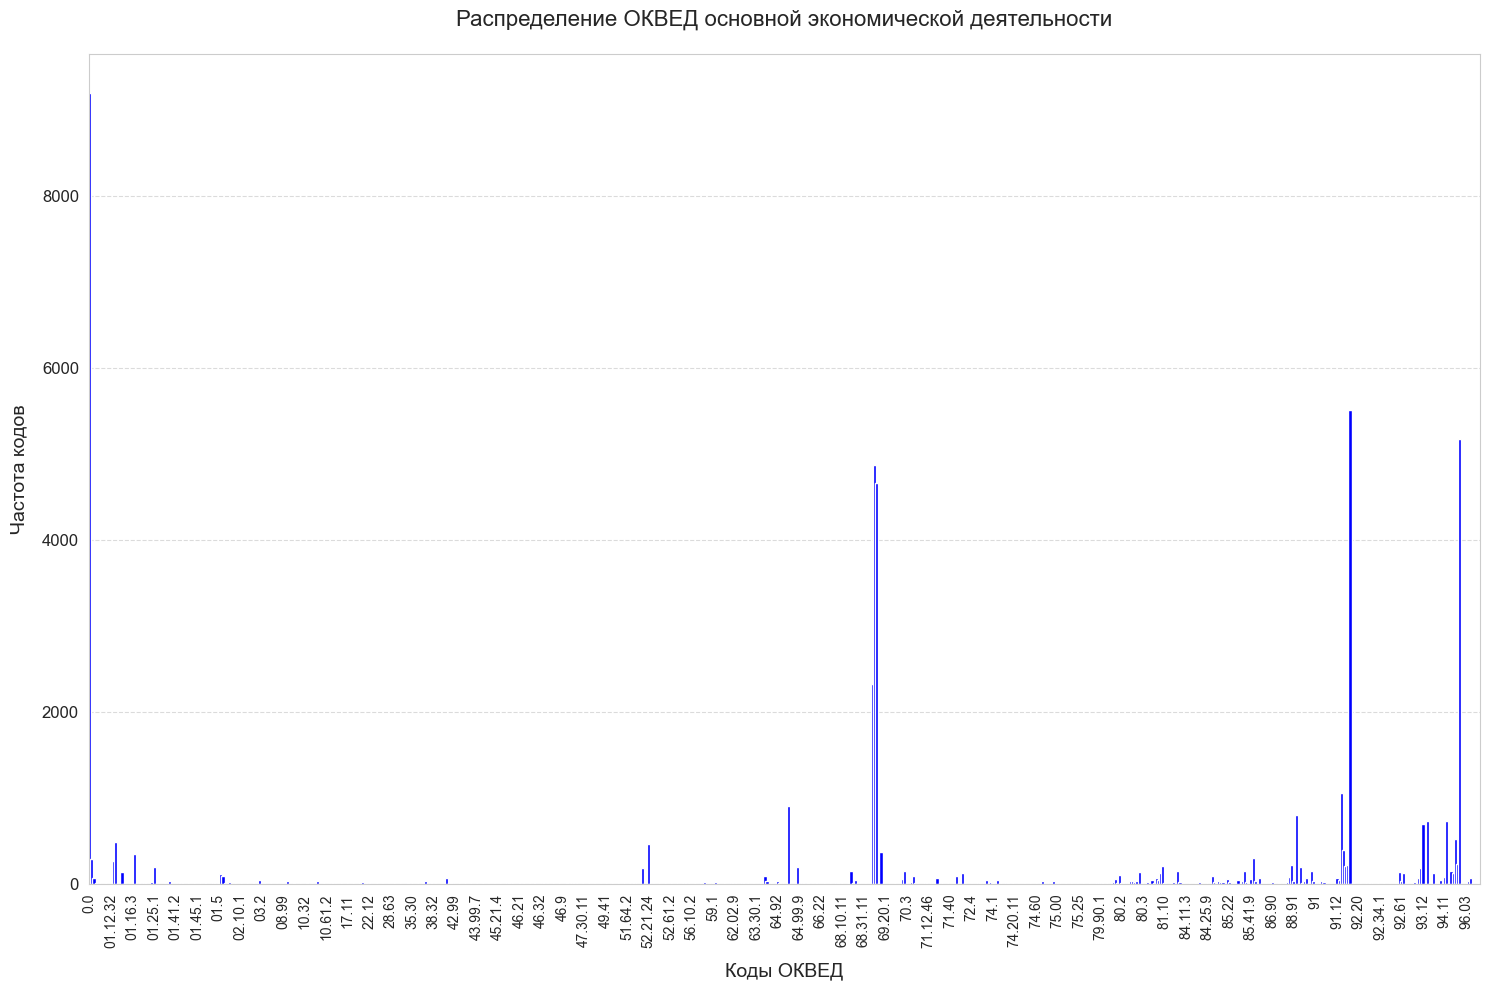

In [34]:
from matplotlib.ticker import MaxNLocator
# Построение гистограммы распределения по категориям
# Построение гистограммы частот
# Настройка размера графика
plt.figure(figsize=(15, 10))
# Построение гистограммы частот
ax = sns.countplot(x='mainOkvedCode', 
                  data=df, 
                  color='blue',       # Синий цвет
                  saturation=1,      # Полная насыщенность цвета
                  width=1.5)         # Увеличенная ширина столбцов (по умолчанию 0.8)
#sns.countplot(x='regionCode', data=df)
# Настройка подписей осей
plt.title('Распределение ОКВЕД основной экономической деятельности', fontsize=16, pad=20)
plt.xlabel('Коды ОКВЕД', fontsize=14, labelpad=10)
plt.ylabel('Частота кодов', fontsize=14, labelpad=10)
#plt.xticks(fontsize=12, rotation=90)
#plt.xticks(range(0, len(df['mainOkvedCode']), 5), df['mainOkvedCode'][::5], rotation=90)
plt.yticks(fontsize=12)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=80))  # Оставить 80 подписей
plt.xticks(rotation=90)
# Настройка сетки
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Настройка легенды (если есть)
#plt.legend(title='Легенда', title_fontsize=12, fontsize=10)
# Улучшение компоновки
plt.tight_layout()
# Отображение графика
plt.show();

Самые популярные коды экономической деятельност:

mainOkvedCode

0.0           9165   нет деятельности.

91.33         5522

94.99         5189

68.32.1       4829

68.32.2       3904

Распределение количеств дополнительных видов деятельности.

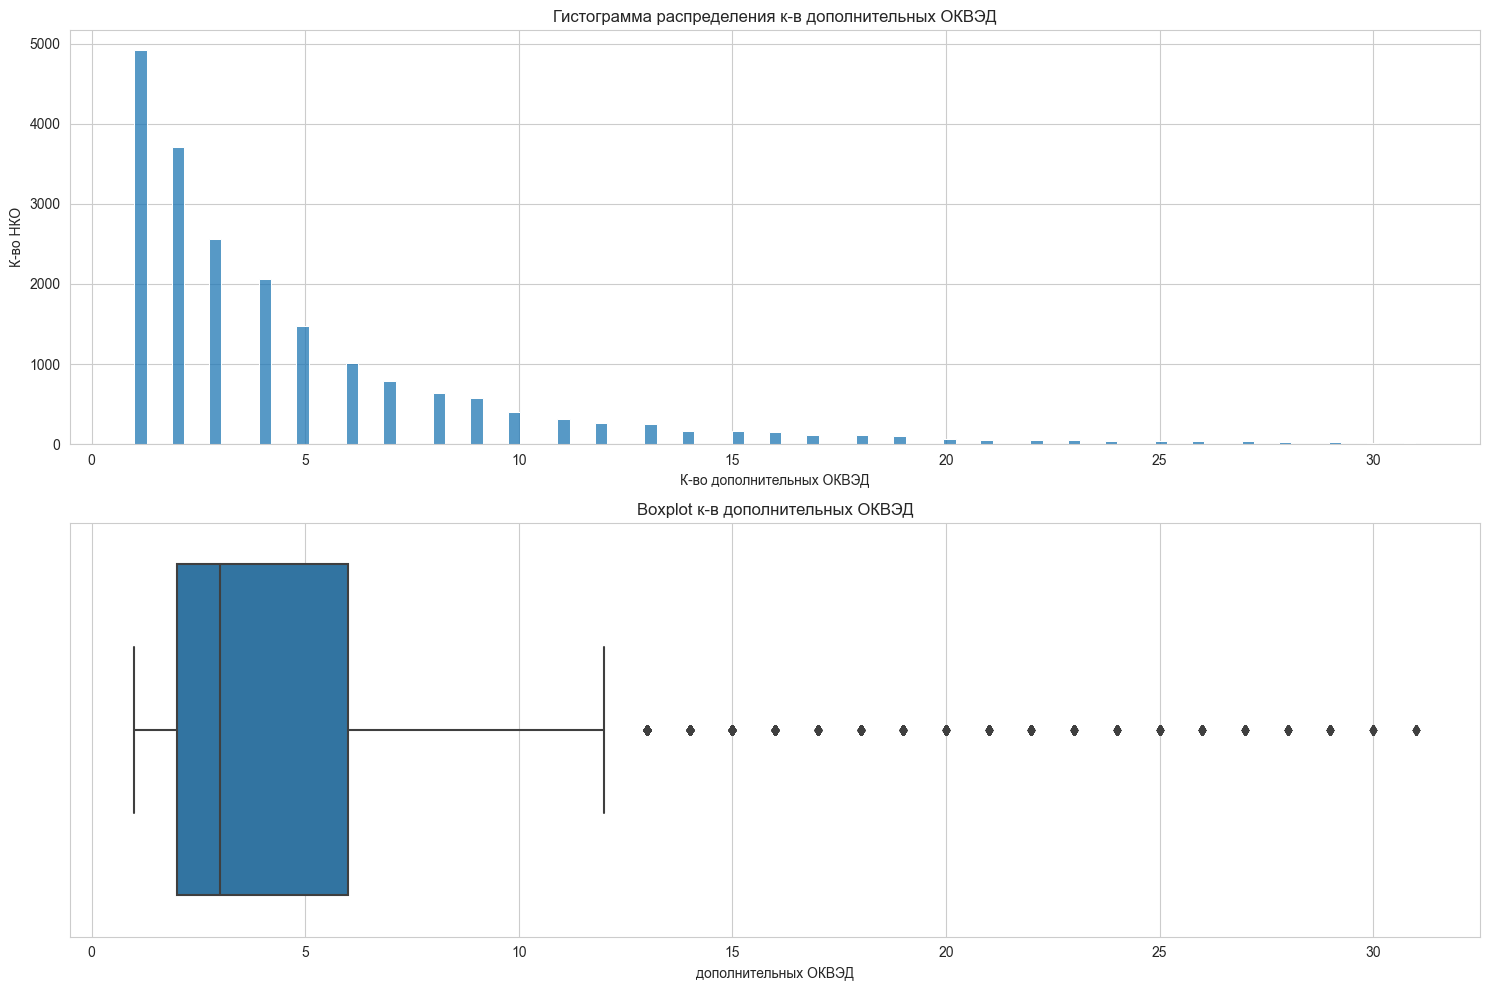

In [35]:
# Чтобы количиство addOkvedCount было видно на графике.
# Построим графики без учета подавляющего числа случаев, когда addOkvedCount=0
df_g = df[df.addOkvedCount >= 1]
# Построти гистограмму и Boxplot признака 'addOkvedCount'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
histplot = sns.histplot(data=df_g, x='addOkvedCount', ax=axes[0])
histplot.set(xlabel="К-во дополнительных ОКВЭД", ylabel="К-во НКО", title="Гистограмма распределения к-в дополнительных ОКВЭД")
boxplot = sns.boxplot(data=df_g, x='addOkvedCount', ax=axes[1])
boxplot.set(xlabel="дополнительных ОКВЭД", ylabel="", title="Boxplot к-в дополнительных ОКВЭД")
plt.tight_layout();

Были НКО с очень большим к-вом дополнительных ОКВЭД (более 600 они удалены, как выбросы).

ОСНОВНЫЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ

Распределение количества дополнительных ОКВЭД (addOkvedCount):
count    49552.000000
mean         1.925775
std          3.846296
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         31.000000

Среднее количество addOkvedCount по группам:
getFunds
0    1.914793
1    2.626144


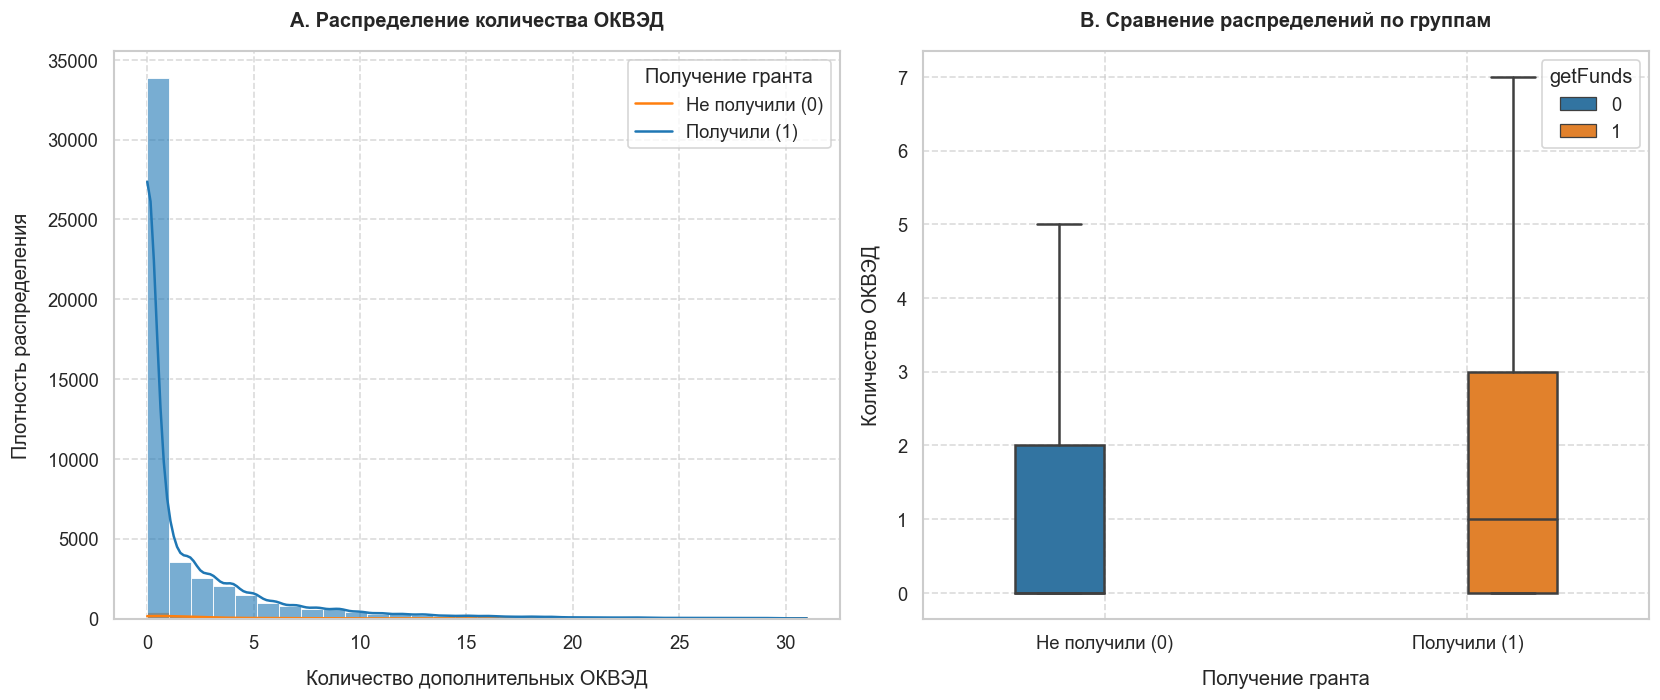


СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ РАЗЛИЧИЙ

Результаты U-теста Манна-Уитни:
U-статистика = 15,549,324
p-value = 0.00000

КОРРЕЛЯЦИОННЫЙ АНАЛИЗ

Точечно-бисериальная корреляция:
Коэффициент корреляции (r) = 0.0228
p-value = 0.00000

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
Optimization terminated successfully.
         Current function value: 0.079440
         Iterations 8

Детали модели:
                           Logit Regression Results                           
Dep. Variable:               getFunds   No. Observations:                49552
Model:                          Logit   Df Residuals:                    49550
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Apr 2025   Pseudo R-squ.:                0.003395
Time:                        12:00:03   Log-Likelihood:                -3936.4
converged:                       True   LL-Null:                       -3949.8
Covariance Type:            nonrobust   LLR p-value:                 2.236e-07
 

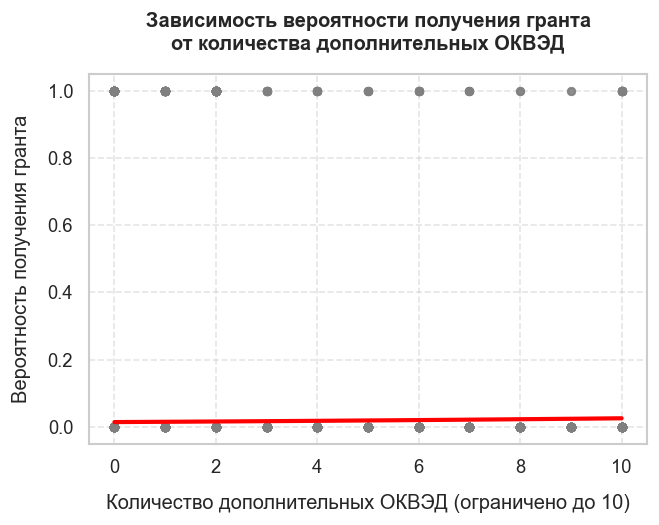

In [36]:
# Установка стиля для графиков
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 120
# Ограничение максимального значения. Все 'addOkvedCount' больше 10, заменятся на 10.
df['addOkvedCount_trimmed'] = df['addOkvedCount'].clip(upper=10)
## 1. Описательная статистика
print("="*80)
print("ОСНОВНЫЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ")
print("="*80)
print("\nРаспределение количества дополнительных ОКВЭД (addOkvedCount):")
desc_stats = df['addOkvedCount'].describe()
print(desc_stats.to_string())

print("\nСреднее количество addOkvedCount по группам:")
group_means = df.groupby('getFunds')['addOkvedCount'].mean()
print(group_means.to_string())

## 2. Визуализация распределений
plt.figure(figsize=(14, 6))

# Гистограмма с плотностью распределения
plt.subplot(1, 2, 1)
hist = sns.histplot(
    data=df, 
    x='addOkvedCount', 
    hue='getFunds',
    bins=30,
    kde=True,
    alpha=0.6,
    common_norm=False,
    palette={0: '#1f77b4', 1: '#ff7f0e'},
    edgecolor='white',
    linewidth=0.5
)
plt.title('A. Распределение количества ОКВЭД', pad=15, fontweight='bold')
plt.xlabel('Количество дополнительных ОКВЭД', labelpad=10)
plt.ylabel('Плотность распределения', labelpad=10)
plt.legend(
    title='Получение гранта', 
    labels=['Не получили (0)', 'Получили (1)'],
    frameon=True
)
plt.grid(True, linestyle='--', alpha=0.7)

# Boxplot с исправлением FutureWarning
plt.subplot(1, 2, 2)
box = sns.boxplot(
    data=df,
    x='getFunds',
    y='addOkvedCount',
    hue='getFunds',
    palette={0: '#1f77b4', 1: '#ff7f0e'},
    showfliers=False,
    width=0.5,
    #legend=False
)
plt.title('B. Сравнение распределений по группам', pad=15, fontweight='bold')
plt.xlabel('Получение гранта', labelpad=10)
plt.ylabel('Количество ОКВЭД', labelpad=10)
plt.xticks([0, 1], ['Не получили (0)', 'Получили (1)'])
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 3. Статистические тесты
print("\n" + "="*80)
print("СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ РАЗЛИЧИЙ")
print("="*80)

# Разделение данных на группы
group0 = df.loc[df['getFunds'] == 0, 'addOkvedCount']
group1 = df.loc[df['getFunds'] == 1, 'addOkvedCount']

# # Тест Уэлча (для неравных дисперсий и нормального распределения, у нас ненормальное)
# t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
# print(f"\nРезультаты t-теста Уэлча:")
# print(f"t-статистика = {t_stat:.3f}")
# print(f"p-value = {p_value:.5f}")

# U-тест Манна-Уитни (сравним распределения, тест непараметрический - не требует нормальности)
u_stat, p_value_mann = stats.mannwhitneyu(group0, group1, alternative='two-sided')
print(f"\nРезультаты U-теста Манна-Уитни:")
print(f"U-статистика = {u_stat:,.0f}")
print(f"p-value = {p_value_mann:.5f}")

## 4. Анализ корреляции
print("\n" + "="*80)
print("КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
print("="*80)

corr = stats.pointbiserialr(df['getFunds'], df['addOkvedCount'])
print(f"\nТочечно-бисериальная корреляция:")
print(f"Коэффициент корреляции (r) = {corr.correlation:.4f}")
print(f"p-value = {corr.pvalue:.5f}")

## 5. Логистическая регрессия (с обработкой выбросов)
print("\n" + "="*80)
print("ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ")
print("="*80)

# Обработка выбросов - ограничение сверху 10 номеров ОКВЭД
# уже есть такие данные
#df['addOkvedCount_clean'] = np.where(df['addOkvedCount'] > 10, 10, df['addOkvedCount'])

# Построение модели. Зависимость получения фондов от к-ва ОКВЭД.
X = sm.add_constant(df['addOkvedCount_trimmed'])
y = df['getFunds']

model = sm.Logit(y, X)
result = model.fit()

print("\nДетали модели:")
print(result.summary())

# Интерпретация коэффициентов
coef = result.params.iloc[1]
odds_ratio = np.exp(coef)
conf_int = np.exp(result.conf_int().iloc[1])

print(f"\nИнтерпретация коэффициента:")
print(f"ОШ (OR) = {odds_ratio:.4f}")
print(f"95% доверительный интервал: [{conf_int[0]:.4f}, {conf_int[1]:.4f}]")
print("\nВывод: при увеличении количества дополнительных ОКВЭД на 1,")
print(f"шансы получить грант увеличиваются в {odds_ratio:.4f} раз")

## Визуализация логистической кривой
plt.figure(figsize=(6, 4))
sns.regplot(
    x='addOkvedCount_trimmed',
    y='getFunds',
    data=df,
    logistic=True,
    ci=95,
    scatter_kws={'alpha': 0.3, 'color': 'gray', 's': 20},
    line_kws={'color': 'red', 'linewidth': 2.5},
    n_boot=1000
)
plt.title('Зависимость вероятности получения гранта\nот количества дополнительных ОКВЭД', 
          pad=15, fontweight='bold')
plt.xlabel('Количество дополнительных ОКВЭД (ограничено до 10)', labelpad=10)
plt.ylabel('Вероятность получения гранта', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Все комментарии актуальны для первого файла данных. 

## Интерпретация результатов

### 1. Описательная статистика
- **Общая выборка**: 
  - Среднее значение: 1.92 ± 3.85 (высокая вариабельность)
  - 50% организаций не имеют доп. ОКВЭД (медиана = 0)
  - Максимальное значение 31 - после обработки выбросов выброс

- **По группам**:
  - Без фондов: 1.92 доп. ОКВЭД
  - С фондами: 2.63 доп. ОКВЭД (+37% относительно первой группы)

### 2. Статистические тесты
- **U-тест**: U = 15,549,324 (p = 0.000) - подтверждает различия

### 3. Корреляционный анализ
- Слабая, но значимая корреляция (r = 0.0228, p < 0.001)

### 4. Логистическая регрессия
- **Коэффициент**: 0.079 (p = 0.001)
- **Отношение шансов (OR)**: 1.0631 (95% Дов.Инт.: 1.0398-1.0870)
- **Интерпретация**: Каждый доп. ОКВЭД увеличивает шансы получения гранта в 1.0631 раза.

### Практические выводы
1. Различия статистически значимы, но эффект не большой
2. Основное различие наблюдается между организациями:
   - Без доп. ОКВЭД (медиана = 0)
   - С 1-2 доп. ОКВЭД (75-й перцентиль)
4. Это порядковый категориальный признак требует кодирования Ordinal Encoding.

In [37]:
#ex0_df.info()  # без нулей
#df.info()			# df до обработки
#in0_df1.info()  #  с нулями

#df=ex0_df.copy()  # выберем рабочий файд

In [38]:
# освободить память
import gc
import dask.bag as db

# Удаление ненужных объектов
del df_g
del outliers
#del rows

# Принудительная сборка мусора
gc.collect()

#combined_df = pd.json_normalize(rows)

20311

Зависимости между

1. Возврастом компании 'nkoAge_days'

2. Регионами регистрации 'regionCode'

3. Экономической деятельностью ('mainOkvedCode', 'addOkvedCount')
и
1. Вероятности получения государственного финансирования ('incomeTotal', 'grantsCount','grantsSum', 'fedSubsCount', 'fedSubsSum', 'contrCount','contrSum').

In [39]:
# Есть ли НКО получившие три фонда?
# Получают ли НКО по несколько видов фондов?
print(f"{df[((df['fedSubsSum'] != 0.0) & (df['contrSum'] != 0.0) & (df['grantsSum'] != 0.0))][['ogrn', 'regionCode']]}")
df[
   ((df['fedSubsSum'] != 0.0) & (df['contrSum'] != 0.0)
   | (df['fedSubsSum'] != 0.0) & (df['grantsSum'] != 0.0)
   | (df['grantsSum'] != 0.0) & (df['contrSum'] != 0.0))
	]

Empty DataFrame
Columns: [ogrn, regionCode]
Index: []


ogrn regionCode  hasRegionalSupport               minjustForm  \
32908  1037746010070         77                   0  Общественная организация   
35944  1095200000642         52                   0  Общественная организация   
41473  1066300012096         63                   0  Общественная организация   
43046  1103400002045         34                   1  Общественная организация   

                                                 address  incomeTotal  \
32908  115582, ГОРОД МОСКВА, УЛИЦА ДОМОДЕДОВСКАЯ, ДОМ...   1702945.00   
35944  603001, ОБЛАСТЬ НИЖЕГОРОДСКАЯ, ГОРОД НИЖНИЙ НО...  37455014.25   
41473  443079, ОБЛАСТЬ САМАРСКАЯ, ГОРОД САМАРА, УЛИЦА...   1358000.00   
43046  400005, ОБЛАСТЬ ВОЛГОГРАДСКАЯ, ГОРОД ВОЛГОГРАД...   6092750.00   

       egrulStatus                                      mainOkvedName  \
32908            0                                            Unknown   
35944            0  Деятельность прочих общественных организаций, ...   
41473            0  Деятельность прочих общественных организаций, ...   
43046            0  Деятельность прочих общественных организаций, ...   

      mainOkvedCode  addOkvedCount  grantsCount  grantsSum  fedSubsCount  \
32908           0.0              0            1  1644945.0             0   
35944         94.99              0            2  2960888.0             0   
41473         91.33             11            1  1000000.0             0   
43046         94.99              8            1  3177000.0             0   

       fedSubsSum  contrCount     contrSum  nkoAge_days  getFunds  \
32908         0.0           1     58000.00         5622         1   
35944         0.0          92  34494126.25         3100         1   
41473         0.0           2    358000.00         3493         1   
43046         0.0           4   2915750.00         3285         1   

       incomeTotal_log  addOkvedCount_trimmed  
32908        14.347870                      0  
35944        17.438651                      0  
41473        14.121524                     10  
43046        15.622610                      8

Анализ сумм и количеств финансирования в зависисмости от возраста, региона, экономической деятельности.

Визуальные закономерности. 

Зависимость финансирования от региона. Рассмотрим для начала не факт финансирования, а сумму финансирования.

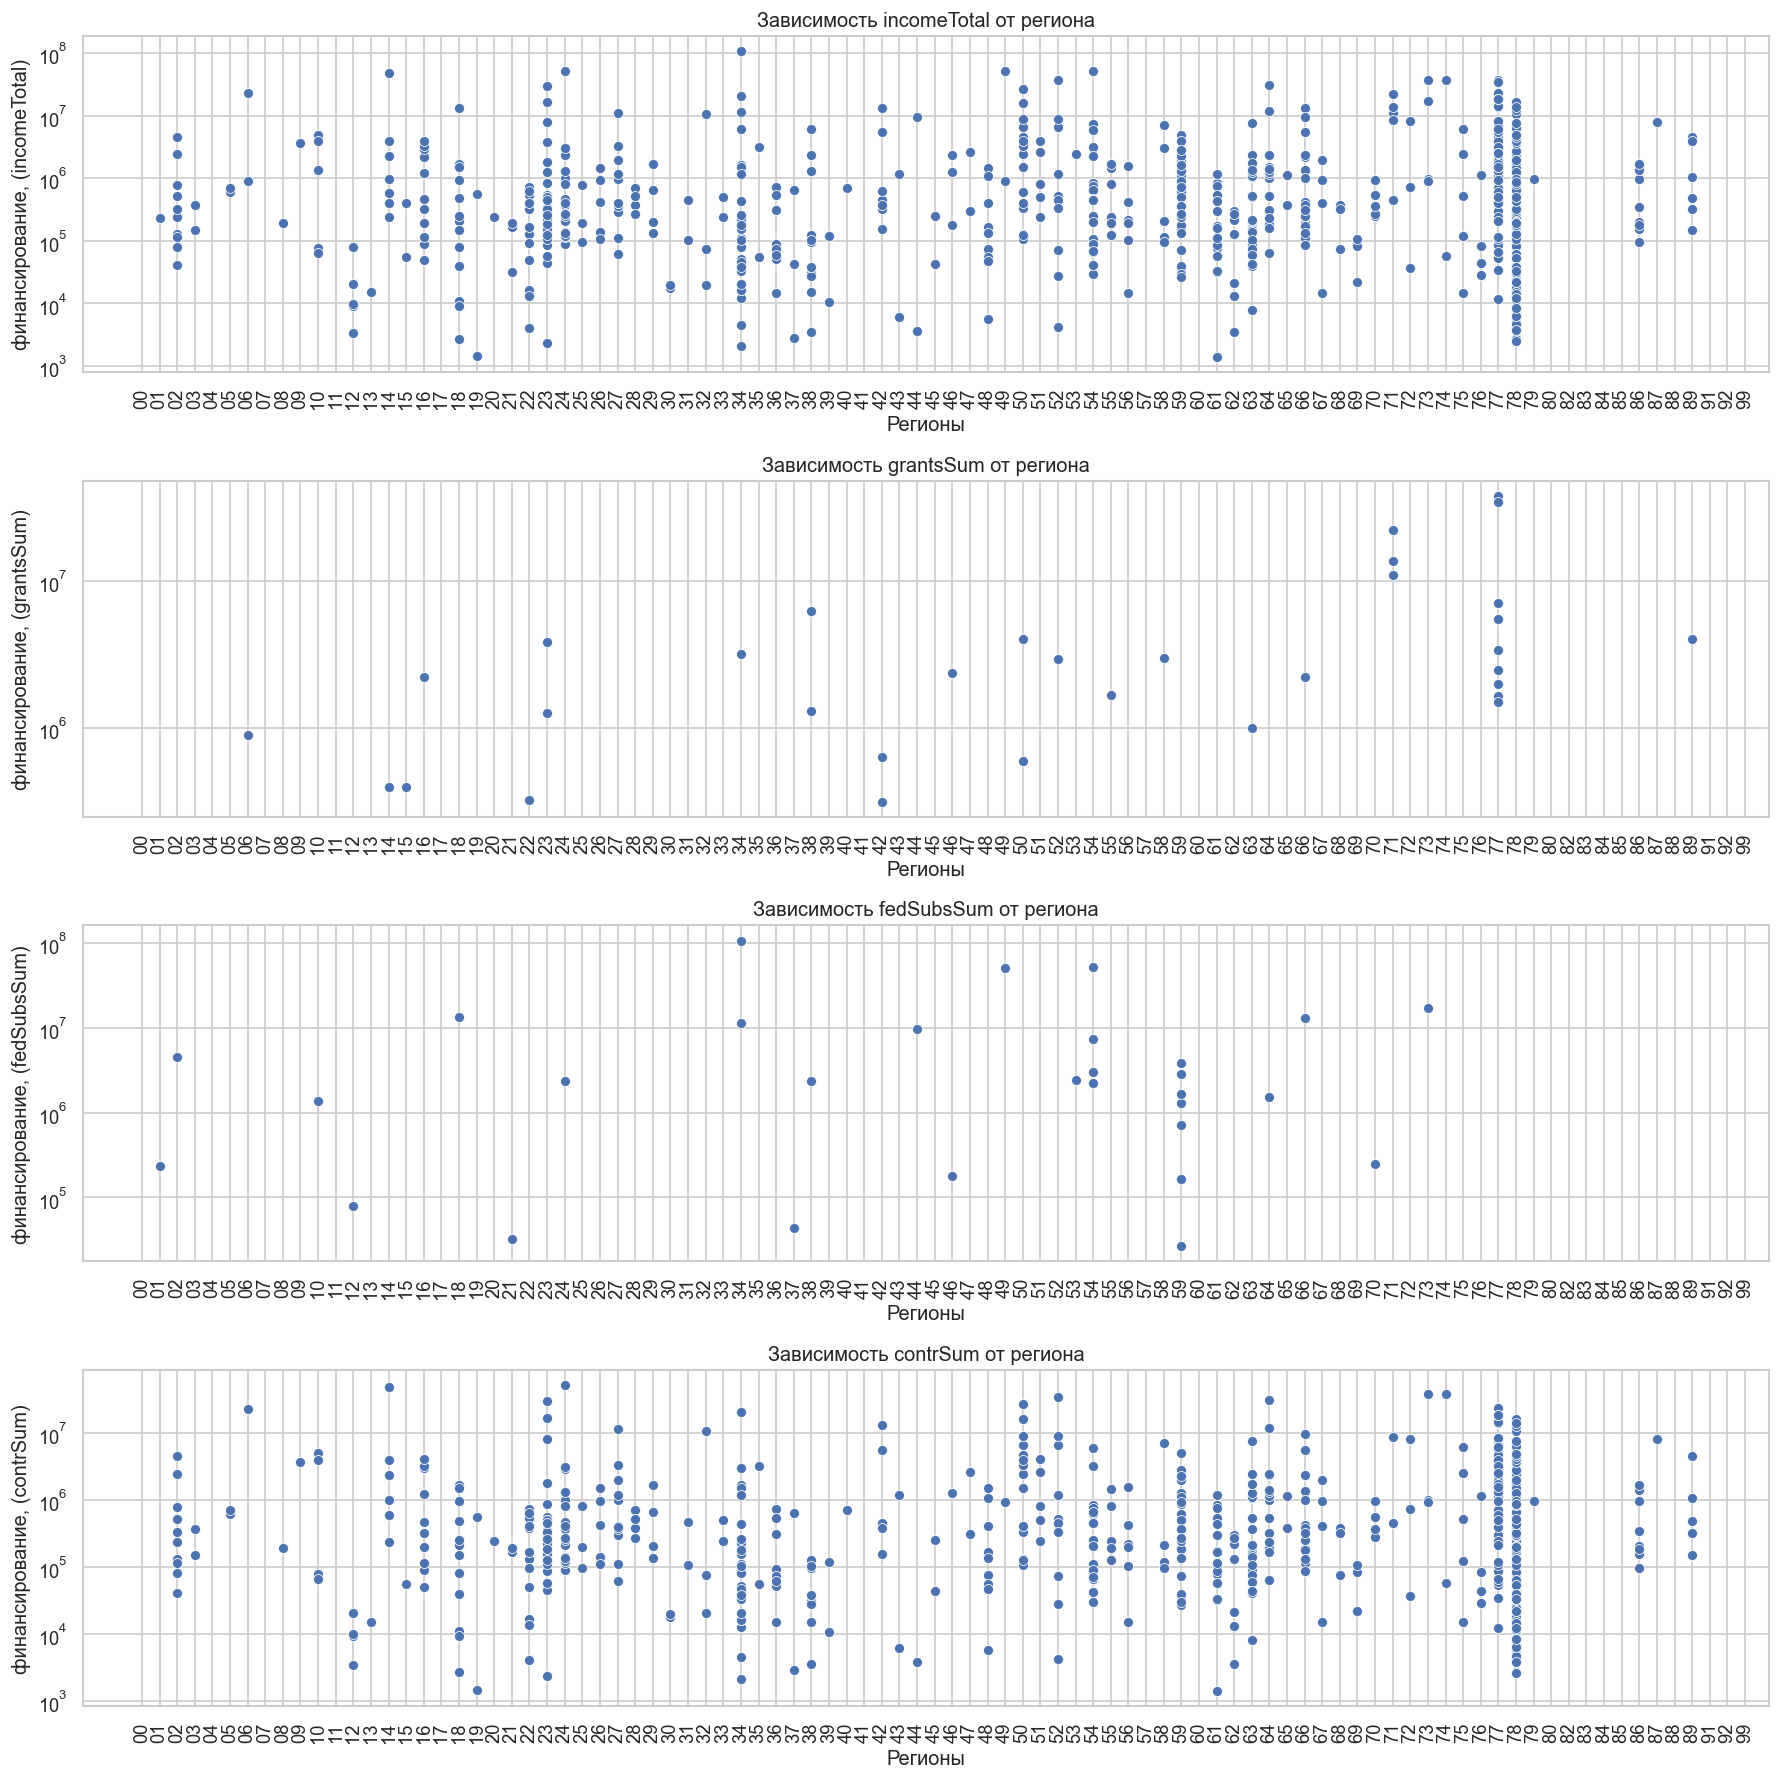

In [40]:
# Создаем фигуру с 4 подграфиками
fig, axes = plt.subplots(4, 1, figsize=(15, 15))

# Убираем нулевые значения и преобразуем в логарифмическую шкалу
plot_data = df[(df[['incomeTotal','grantsSum', 'fedSubsSum', 'contrSum']] > 0).any(axis=1)]

# Графики для каждого типа финансирования
for i, col in enumerate(['incomeTotal','grantsSum', 'fedSubsSum', 'contrSum']):
	sns.scatterplot(x='regionCode', y=col, data=plot_data, ax=axes[i])
	axes[i].set_yscale('log')
	#axes[i].set_title(f'Распределение {col} по регионам')
	axes[i].set(xlabel="Регионы", ylabel=f"финансирование, ({col})", title=f"Зависимость {col} от региона")
    
	axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Есть регионы с большим финансированием и по количеству и по объему. Особенно выделяются 77 и 78 регионы. Есть со средним. Есть с малым финансированием. 

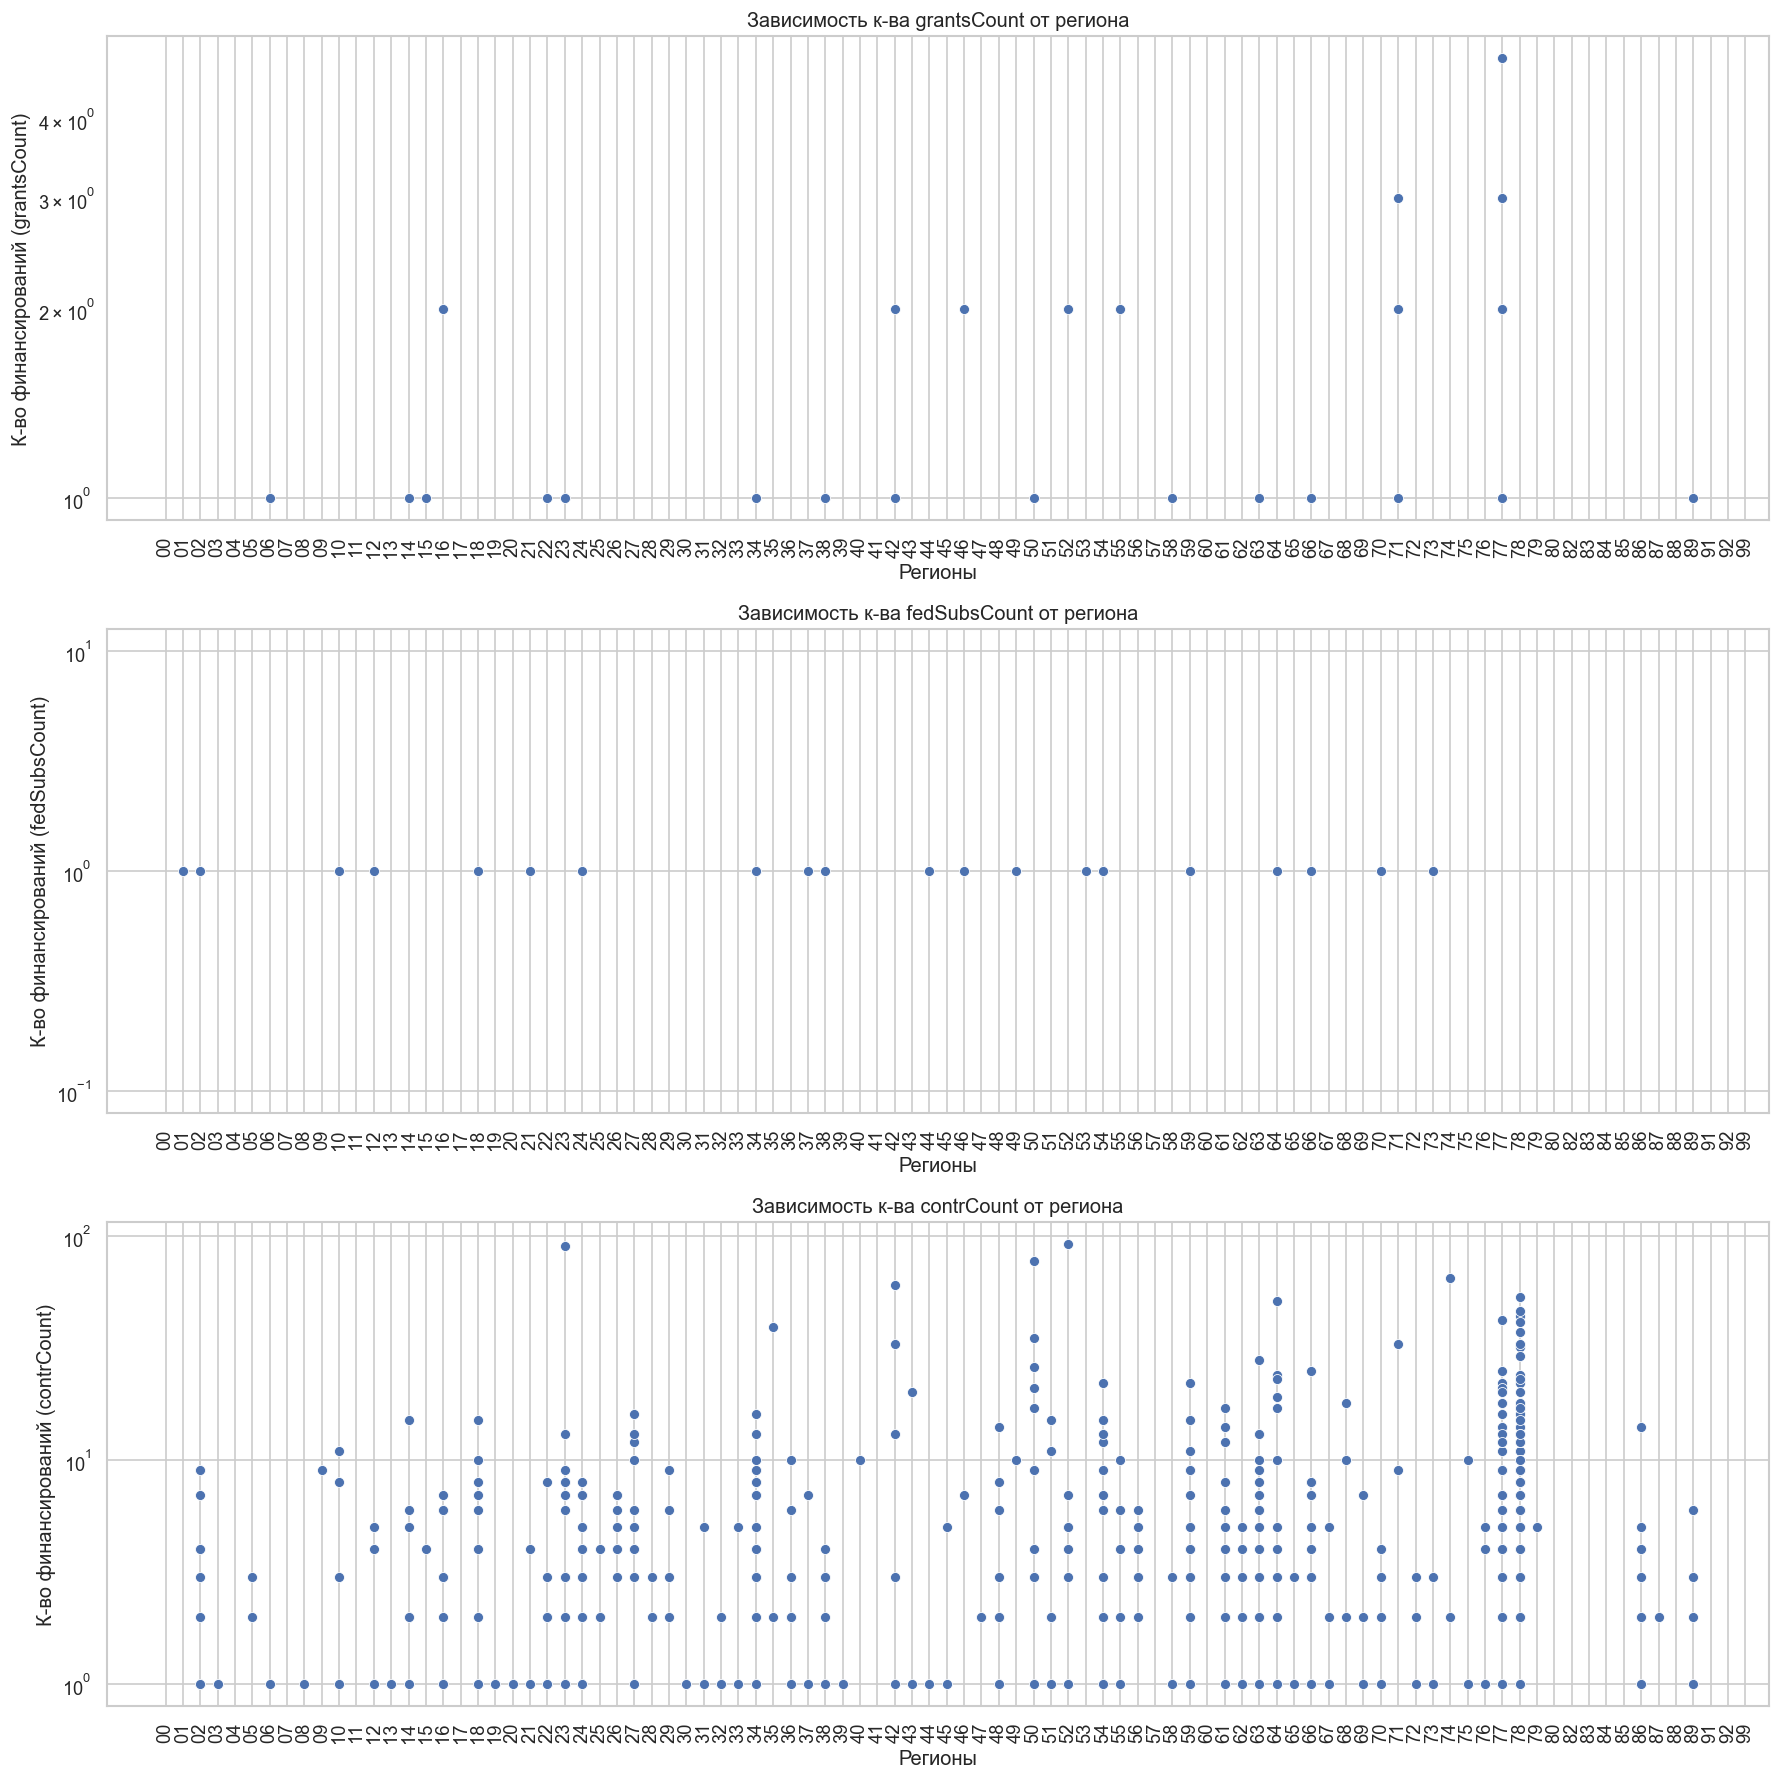

In [41]:
# Количество финансирований
# Создаем фигуру с 3 подграфиками
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Убираем нулевые значения и преобразуем в логарифмическую шкалу
plot_data = df[(df[['grantsCount', 'fedSubsCount', 'contrCount']] > 0).any(axis=1)]

# Графики для каждого типа финансирования
for i, col in enumerate(['grantsCount', 'fedSubsCount', 'contrCount']):
	sns.scatterplot(x='regionCode', y=col, data=plot_data, ax=axes[i])
	axes[i].set_yscale('log')
	#axes[i].set_title(f'Распределение {col} по регионам')
	axes[i].set(xlabel="Регионы", ylabel=f"К-во финансирований ({col})", title=f"Зависимость к-ва {col} от региона")
    
	axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

По к-ву выданных финансирований 77 регион лидер по всем видам.
К-во контрактов существенно больше, чем фед. субсидий и грантов, причем вместе взятых. Суммы же их в массе меньше, хотя есть и контракты и на большие суммы.

Зависимость финансирования от Возраста НКО.

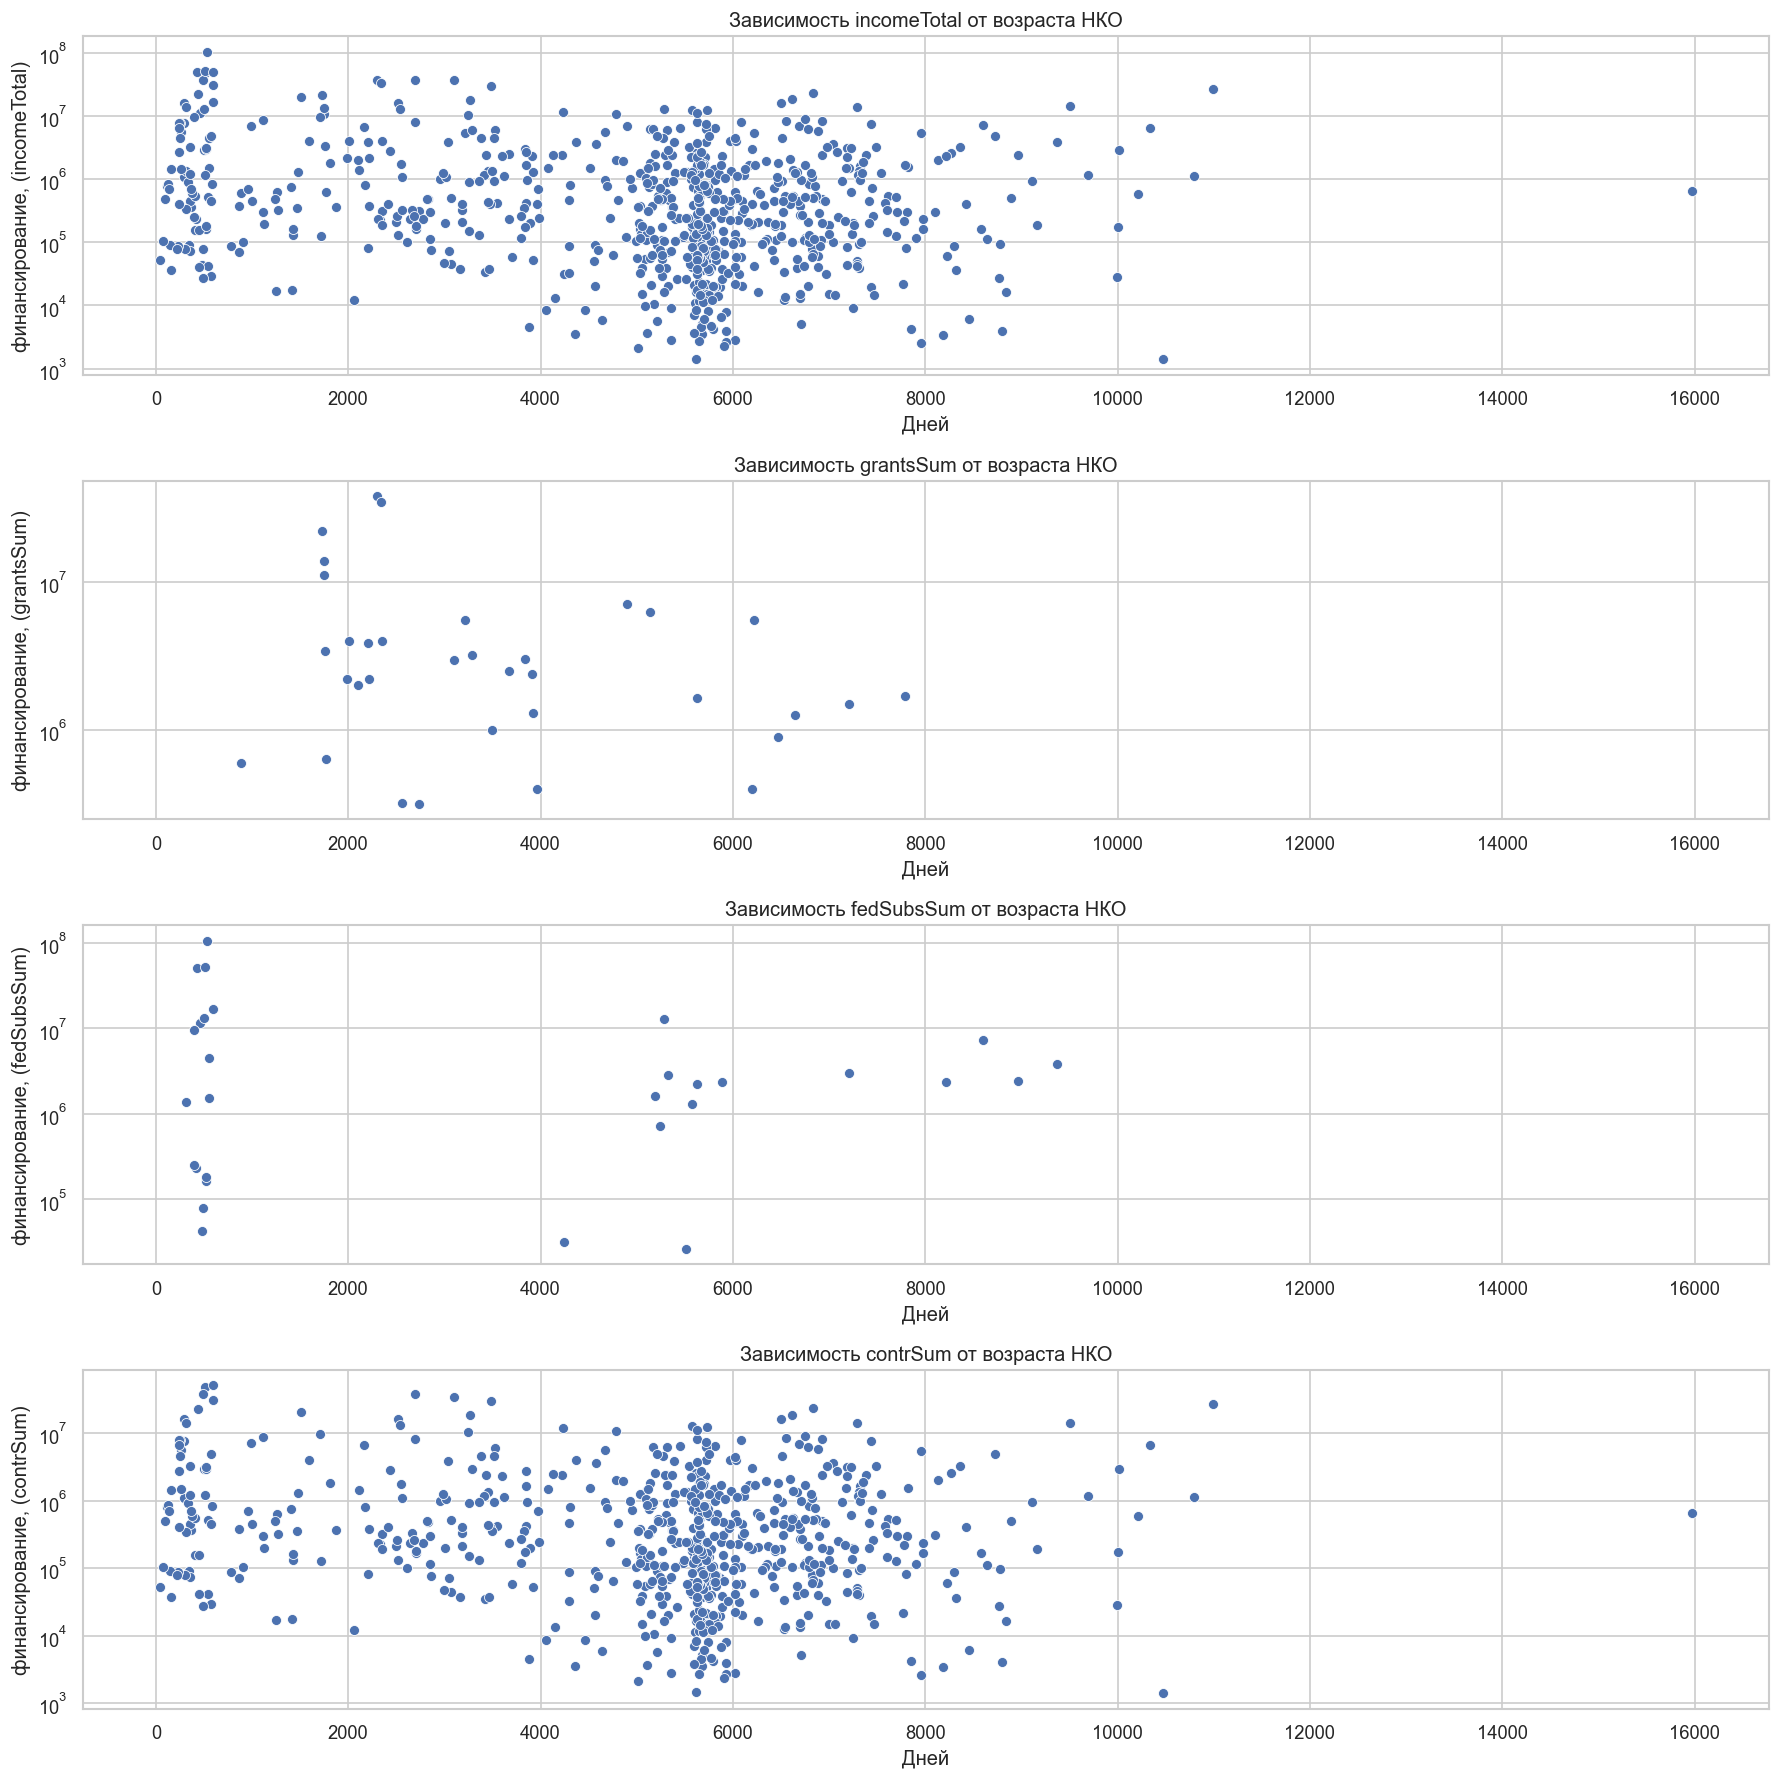

In [42]:
# Создаем фигуру с 4 подграфиками
fig, axes = plt.subplots(4, 1, figsize=(15, 15))

# Убираем нулевые значения и преобразуем в логарифмическую шкалу
plot_data = df[(df[['incomeTotal','grantsSum', 'fedSubsSum', 'contrSum']] > 0).any(axis=1)]

# Графики для каждого типа финансирования
for i, col in enumerate(['incomeTotal','grantsSum', 'fedSubsSum', 'contrSum']):
	sns.scatterplot(x='nkoAge_days', y=col, data=plot_data, ax=axes[i])
	axes[i].set_yscale('log')
	#axes[i].set_title(f'Распределение {col} по регионам')
	axes[i].set(xlabel="Дней", ylabel=f"финансирование, ({col})", title=f"Зависимость {col} от возраста НКО")
    
	axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Федеральные субсидии чаще у молодых НКО, но присутствуют и у более зрелых и даже с более крупными суммами. Контракты характерны для зрелых (в середине деятельности), существует некоторый кластер контрактов в молодом возрасте. Гранты у устоявшихся организаций.

Зависимость финансирования от экономической деятельности и региона НКО.

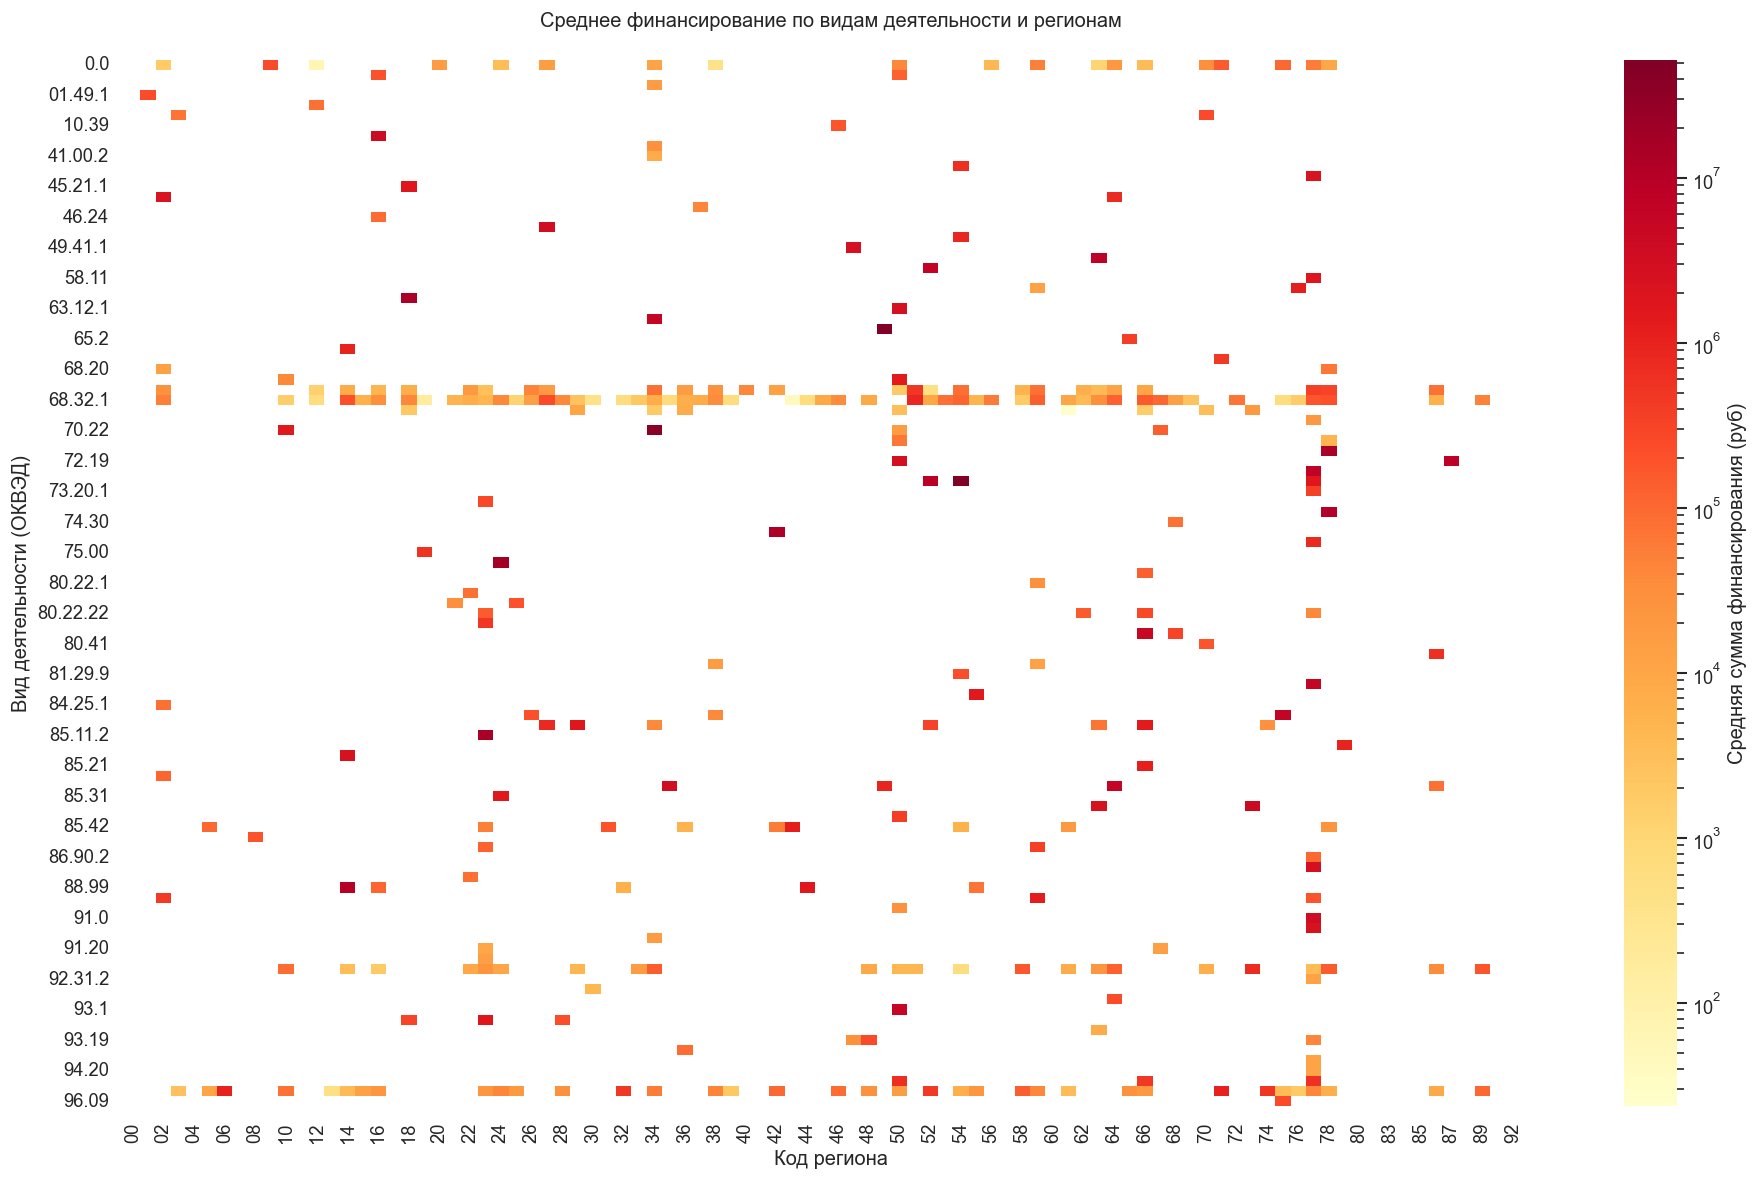

In [43]:
from matplotlib.colors import LogNorm  # Добавляем импорт

# Создаем сводную таблицу
heatmap_data = df.pivot_table(
    index='mainOkvedCode',
    columns='regionCode',
    values='incomeTotal',
    aggfunc='mean',
    observed=False
)

# Фильтруем данные, чтобы оставить только значимые значения
heatmap_data = heatmap_data[heatmap_data.sum(axis=1) > 0]  # Убираем виды деятельности с нулевым финансированием

plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data.fillna(0),
    cmap='YlOrRd',
    norm=LogNorm(),  # Логарифмическая нормализация
    cbar_kws={'label': 'Средняя сумма финансирования (руб)'}
)
plt.title('Среднее финансирование по видам деятельности и регионам', pad=20)
plt.xlabel('Код региона')
plt.ylabel('Вид деятельности (ОКВЭД)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Распределение достаточно равномерное. Есть тенденции. 
1. Москва предствалена для многих ОКВЭД.
2. ОКВЭД 68.32 (Управление недвижимым имуществом) представлен для у большенства регионов.
3. По среднему размеру всех финасирований опять же Москва лидирует.
4. Во многих регионах есть код 94.99 (Деятельность прочих НКО).
5. Наибольшие среднии суммы финансирования по всем видам присутствуют в регионе 78 и 49 (Магадан), 23, 24.

3-х мерная визуализация. Сумма выплат, от региона, возраста, кода ОКВЭД. 

In [44]:
import plotly.express as px

# Фильтруем и подготавливаем данные
plot_df = df[df['incomeTotal'] > 0].copy()

# Нормализуем размер точек (логарифмически или относительный масштаб)
plot_df['point_size'] = np.log10(plot_df['incomeTotal'])  # Логарифмический масштаб размеров
min_size = plot_df['point_size'].min()
max_size = plot_df['point_size'].max()

# Задаем порядок регионов (например, по убыванию финансирования)
# Явно указываем observed=False для подавления предупреждения
region_order = plot_df.groupby('regionCode', observed=False)['incomeTotal'].sum().sort_values(ascending=False).index

# Применяем порядок к категории
plot_df['regionCode'] = plot_df['regionCode'].cat.reorder_categories(region_order, ordered=True)

# Сортируем DataFrame
plot_df = plot_df.sort_values('regionCode')

# Строим график с учетом порядка
fig = px.scatter_3d(
    plot_df,
    x='regionCode',
    y='nkoAge_days',
    z='incomeTotal',
    color='mainOkvedCode',
    category_orders={'regionCode': plot_df['regionCode'].cat.categories.tolist()},
    size='point_size', # Используем нормализованный размер
    size_max=40,    # Увеличиваем максимальный размер точек
    opacity=0.7,
    log_z=True,
    title='3D зависимость финансирования от региона и ОКВЭД',
    hover_name='mainOkvedName',
    hover_data={'point_size': False, 'incomeTotal': ':.2f'},  # Форматируем подсказки
    height=800
)

# Улучшаем отображение
fig.update_layout(
    scene=dict(
        xaxis_title='Регион',
        yaxis_title='Возраст (дни)',
        zaxis_title='Сумма',
        zaxis=dict(type="log"),
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.1))  # Изменяем угол обзора
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(
        title='Коды ОКВЭД',
        itemsizing='constant'
    )
)

# Дополнительные настройки для лучшей видимости
fig.update_traces(
    marker=dict(
        line=dict(width=0),
        sizemode='diameter',
        sizeref=2.*max_size/(10.**2)  # Формула для масштабирования размеров
    ),
    selector=dict(mode='markers')
)

fig.show()

Есть некоторая разбивка по размеру финансирования. 
1. Нижний слой - Управление эксплуатацией. По возрасту эти финансирования сосредоточены в середине. Присутствуют равномерно во всех регионах.
2. Средний слой - разнообразная деятельность. Распределена по всем регионам и возрастам.
3. Слой Крупного финансирование - Строительство, Медецина, Бизнесконсультирование. Есть четкое сосредоточение в регионе 77.

Вообще для региона 77 характерны все виды финансирования. Наблюдается визуально прямо кластер разного рода финансирований.

Статистические тесты. 

Проведем статистические тесты для целевого признака 'getFunds', 'incomeTotal' и признаков 'nkoAge_days', 'regionCode',
'mainOkvedCode' и addOkvedCount', как поставлена задача. 

Статистический тест для анализа зависимости признака 'incomeTotal' (float) и regionCode (category).

К-во групп (регионов) > 80, 'incomeTotal' после логарифмирования распределен не нормально, но визуально напоминает нормальное распределение. Образцов >> 5000.

Выбираем.
1. Крускала-Уоллиса + тест Данна (для пост-хок)
Подходит для сравнения медиан между множеством групп без строгих предположений о нормальности.

Группа здесь это регион (в ней числовые значения 'incomeTotal').

H0: В среднем объем финансирования для пар регионов не отличается.
Н1: В среднем объем финансирования для пар регионов отличается.

In [45]:
import scipy.stats as stats
import scikit_posthocs as sp


# Логарифмирование (если ещё не сделано)
#df['incomeTotal_log'] = np.log1p(df['incomeTotal'])

# Крускала-Уоллис (общий тест на различия)
h_stat, p_value = stats.kruskal(*[df[df['regionCode'] == code]['incomeTotal_log'] for code in df['regionCode'].unique()])
print(f"Крускал-Уоллис: p-value = {p_value:.4f}")  # Почти всегда <0.05 при большом n

# Пост-хок тест Данна (поправка на множественные сравнения)
# уберем предупреждения
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    dunn_results = sp.posthoc_dunn(
        df,
        val_col='incomeTotal_log',
        group_col='regionCode',
        #p_adjust='holm',
        p_adjust='bonferroni'
    )
print("Значимые пары регионов (p < 0.05):")
print(dunn_results[dunn_results < 0.05].stack().dropna())

Крускал-Уоллис: p-value = 0.0000
Значимые пары регионов (p < 0.05):
01  78    3.314650e-07
02  59    5.571315e-06
    78    1.141443e-60
03  59    3.331457e-04
    78    6.557710e-30
              ...     
89  78    6.405577e-13
91  59    2.398615e-04
    78    3.525220e-25
92  59    2.740808e-02
    78    3.768498e-15
Length: 290, dtype: float64


p < 0.05 (Отвергаем Н0)
Получили много регионов которые попарно отличаюся друг от друга по объему финансирования.

Кластерезация регионов по среднему объему финансирования.

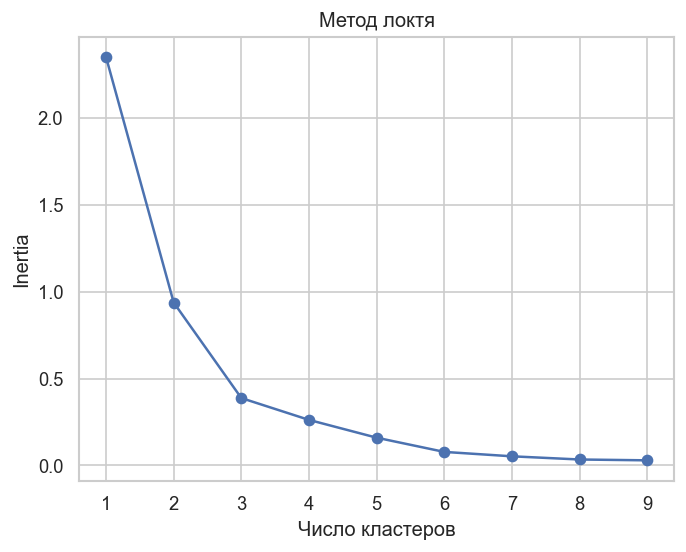

In [46]:
# Найдем оптимальное число кластеров
from sklearn.cluster import KMeans
mean_incomes = df.groupby('regionCode', observed=False)['incomeTotal_log'].mean().reset_index()
X = mean_incomes[['incomeTotal_log']].values
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.show()

Оптимальное число кластеров k=3.

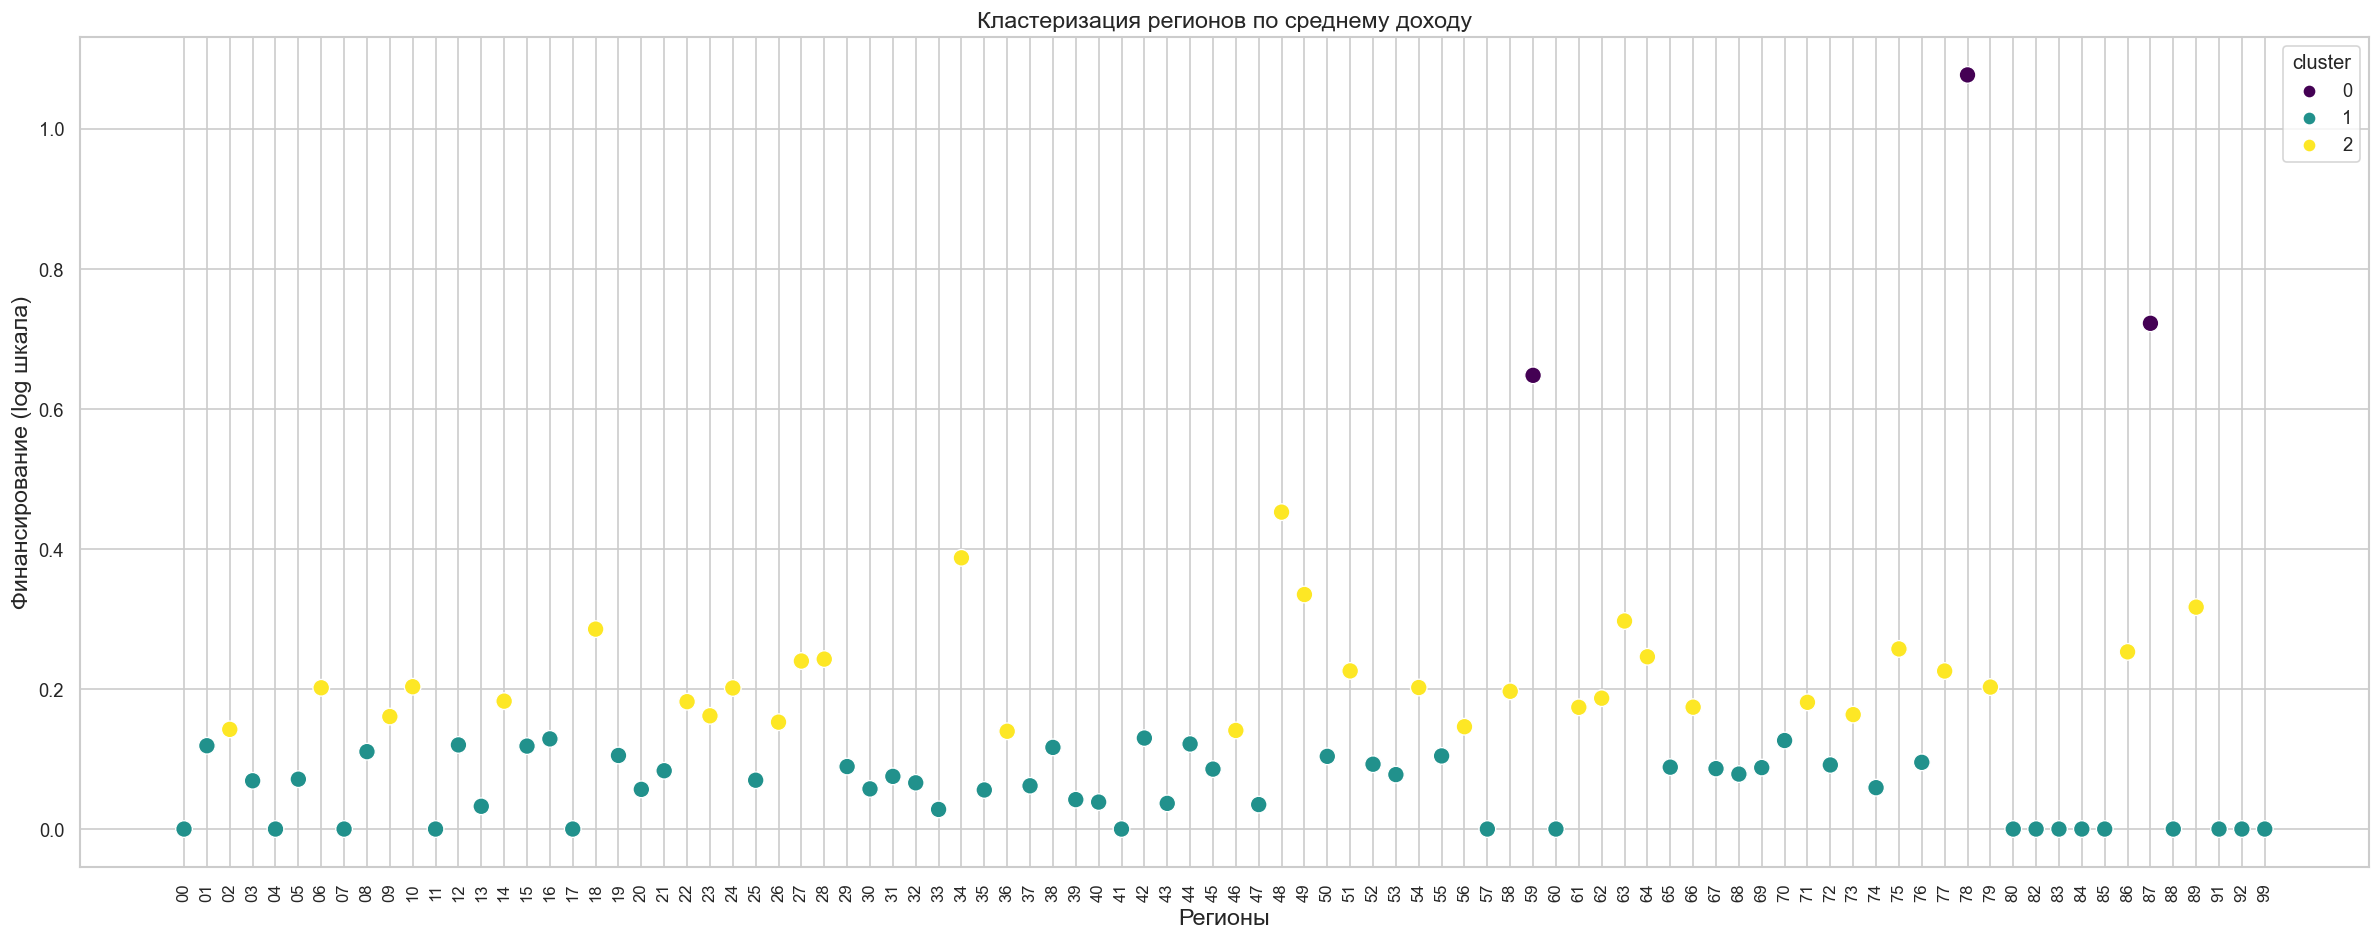

In [47]:
from sklearn.preprocessing import StandardScaler
# n = 3
# Кластеризация по mean с подбором k
# mean_incomes в предедущей ячейке
X = mean_incomes[['incomeTotal_log']].values

# Нормализация
X_scaled = StandardScaler().fit_transform(X)

# Подбор k (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
mean_incomes['cluster'] = kmeans.fit_predict(X_scaled)

# Визуализация
plt.figure(figsize=(20, 8))  # Ширина x Высота в дюймах
sns.scatterplot(data=mean_incomes, x='regionCode', y='incomeTotal_log', hue='cluster', palette='viridis', s=100)
plt.xticks(rotation=90, fontsize=10)  # Поворот подписей + размер шрифта
plt.title('Кластеризация регионов по среднему доходу', fontsize=14)
plt.xlabel("Регионы", fontsize=14)
plt.ylabel("Финансирование (log шкала)", fontsize=14)
#plt.set(xlabel="Финансирование (log шкала)", ylabel="Регионы", title="Кластеризация регионов по среднему доходу")
plt.tight_layout()  # Автоматическая подгонка отступов
plt.show();

На основании графика "Кластеризация регионов по среднему доходу" можно сделать следующие выводы:

Разброс значений: Логарифмированные доходы регионов варьируются примерно от 0.0 до 1.0, что указывает на умеренную вариативность между регионами.

Средние объемы финансирования делятся на три кластера. Есть регионы с низким этим показателем. Как правило недавно возникшие (1- кластер). С этим уровнем - большенство регионов. 

Количество регионов на среднем уровне (2 кластер) на втором месте.

Регионы с большим средним финансированием (0 кластер) 59, 78, 87. Во преки ожидания Москва (2 кластер) и МО (1 -кластер) сюда не входят. То есть они получают большее к-во финансирований со средним или ниже среднего объемом.


Перейдем к статистическим тестам с участием целевого признака 'getFunds'

Для бинарного целевого признака getFunds
и Категориальных предикторов (regionCode, mainOkvedCode)
Тест: Поправленный хи-квадрат или тест Фишера (для редких категорий)
Выберем тест Фишера (для регионов) т.к в таблице сопряжения есть 0.

1. Базовая таблица сопряженности
Для regionCode и getFunds:

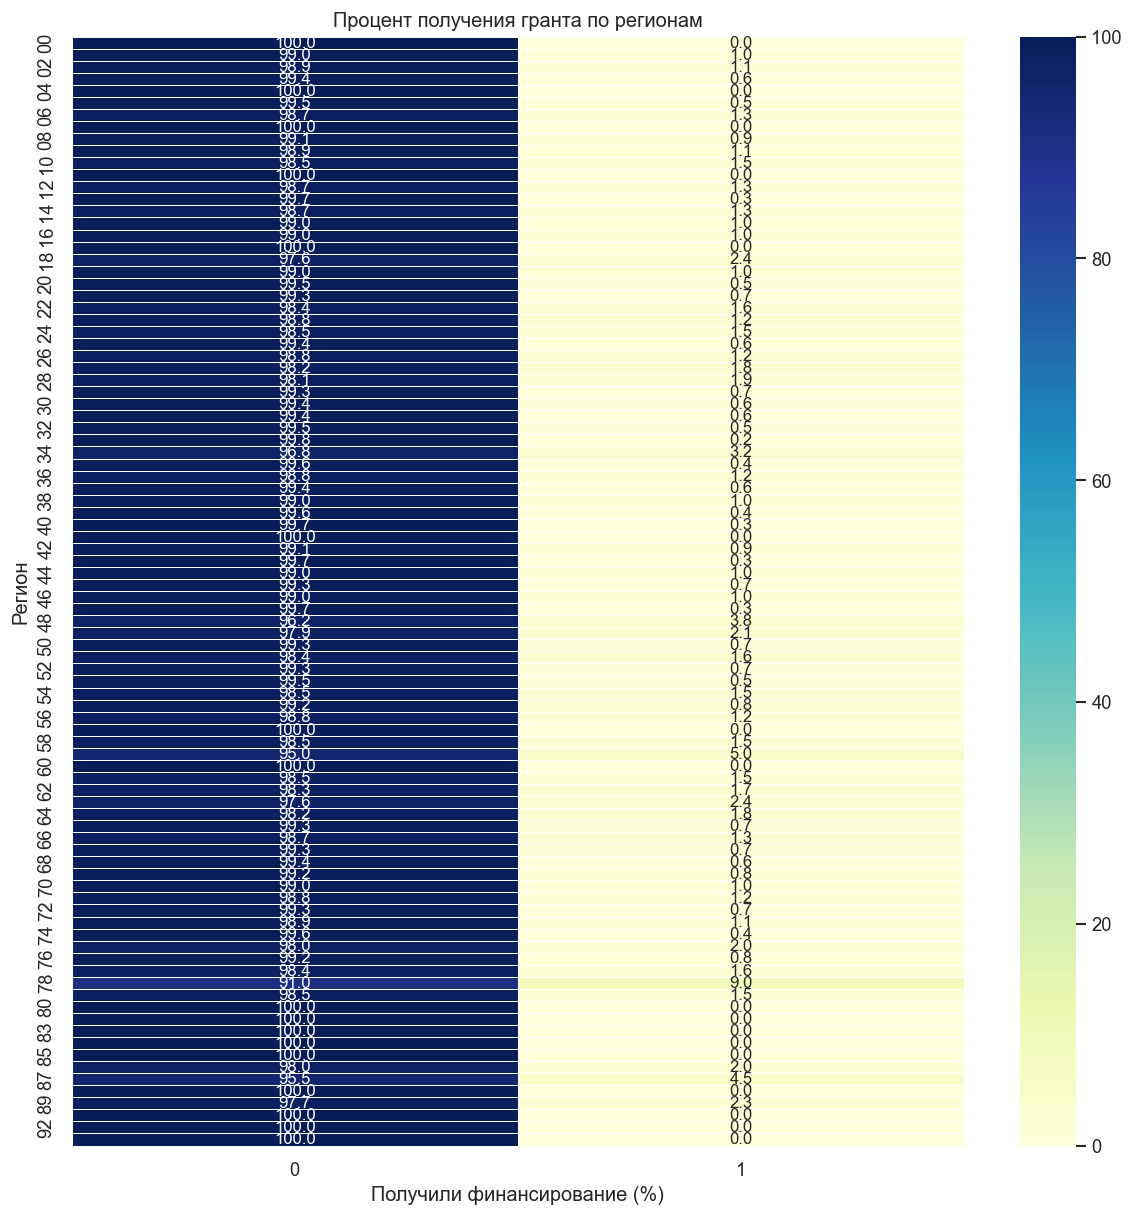

In [48]:
# Нормированная таблица (по строкам)
norm_cross_tab = pd.crosstab(
    index=df['regionCode'],
    columns=df['getFunds'],
    normalize='index'  # Доли по строкам
) * 100

# Визуализация
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    norm_cross_tab, 
    annot=True, 
    fmt='.1f',  # Один знак после запятой
    cmap="YlGnBu",
    linewidths=0.5,
    annot_kws={'size': 10}
)
ax.set(
    xlabel='Получили финансирование (%)', 
    ylabel='Регион',
    title='Процент получения гранта по регионам'
)
plt.xticks(rotation=0)
plt.show()

Выбираем точный тест Фишера т.к в таблице сопряжения есть нулевые частоты.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Текущий регион имеет вероятность получения финансирования как и все остальные.

*Альтернативная гипотеза* ($H_1$): Текущий регион имеет вероятность получения финансирования отличную от остальных регионов.

78: p-value = 0.0000
77: p-value = 0.7943
12: p-value = 0.8377
75: p-value = 0.4471
23: p-value = 0.3087
43: p-value = 0.0076
30: p-value = 0.1860
50: p-value = 0.0007
58: p-value = 1.0000
70: p-value = 0.3687
72: p-value = 0.1722
69: p-value = 0.3935
34: p-value = 0.0001
66: p-value = 0.5084
33: p-value = 0.0002
89: p-value = 0.3024
26: p-value = 0.6134
64: p-value = 0.4952
47: p-value = 0.0010
73: p-value = 0.6713
59: p-value = 0.0000
56: p-value = 0.7135
51: p-value = 0.8143
61: p-value = 1.0000
38: p-value = 0.1715
48: p-value = 0.0114
18: p-value = 0.1265
02: p-value = 0.2994
13: p-value = 0.0977
05: p-value = 0.1379
76: p-value = 0.2637
65: p-value = 0.3420
27: p-value = 0.6184
01: p-value = 1.0000
24: p-value = 1.0000
39: p-value = 0.0408
42: p-value = 0.2275
74: p-value = 0.0390
54: p-value = 1.0000
21: p-value = 0.2277
55: p-value = 0.1007
03: p-value = 0.1902
19: p-value = 0.7738
14: p-value = 0.8604
29: p-value = 0.1231
35: p-value = 0.0547
46: p-value = 0.6357
52: p-value =

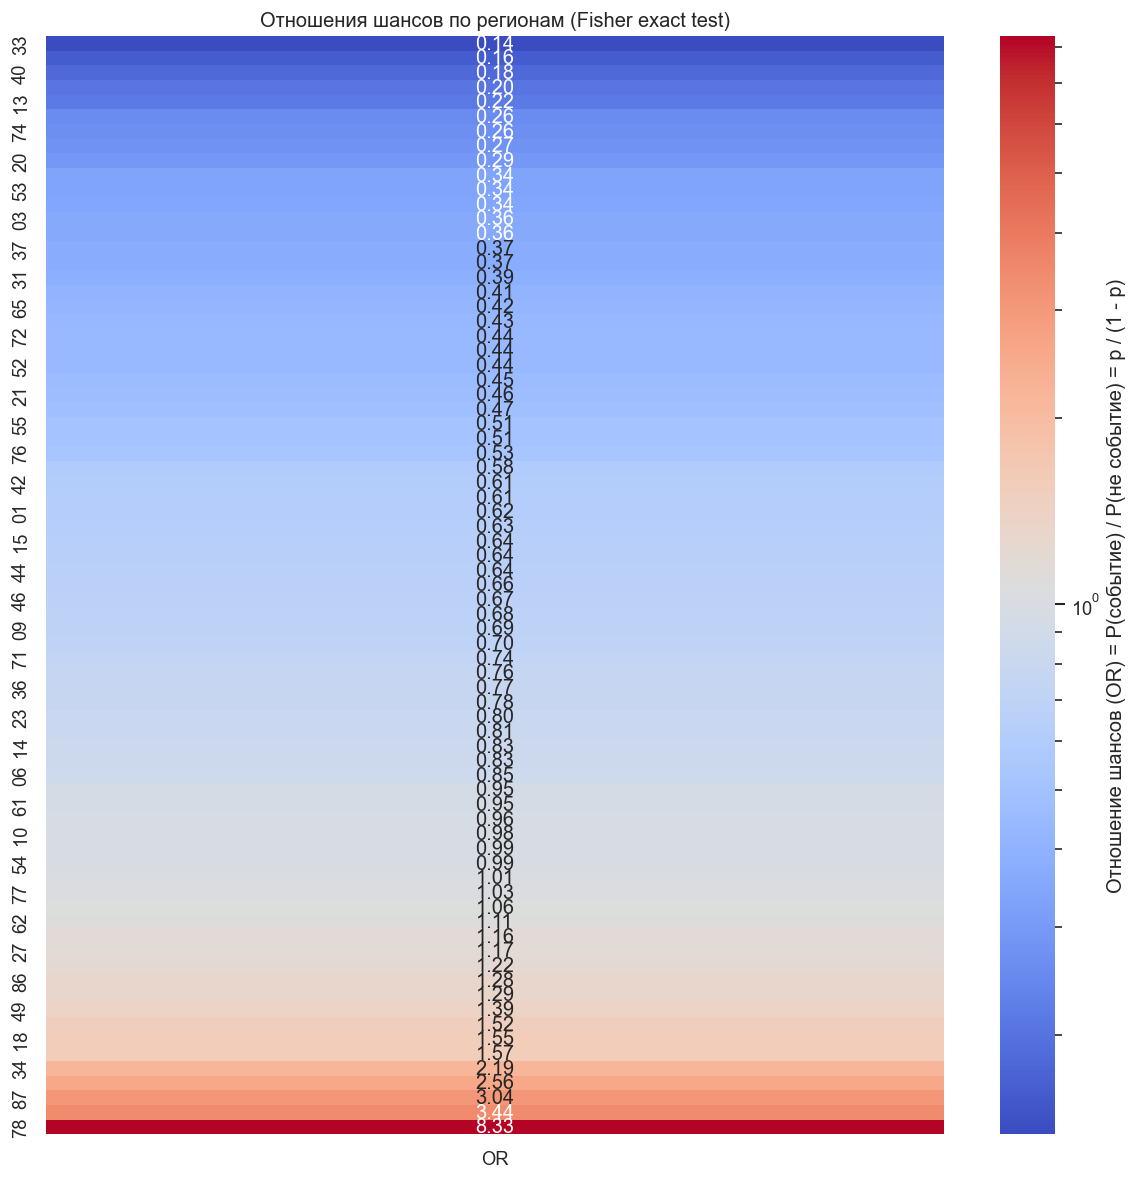

In [49]:
from scipy.stats import fisher_exact

# Перебор всех регионов с проверкой
for region in df['regionCode'].unique():
    subtable = pd.crosstab(
        index=df['regionCode'] == region,
        columns=df['getFunds']
    )
    # Пропускаем регионы с нулевыми частотами
    if subtable.shape == (2, 2) and subtable.values.min() > 0:
        _, p_value = fisher_exact(subtable)
        print(f"{region}: p-value = {p_value:.4f}")
        

# Создаем матрицу OR
or_matrix = pd.DataFrame(index=df['regionCode'].unique(),
                        columns=['OR'])

for region in or_matrix.index:
    subtable = pd.crosstab(index=df['regionCode'] == region,
                          columns=df['getFunds'])
    if subtable.shape == (2, 2) and subtable.values.min() > 0:
        oddsratio, _ = fisher_exact(subtable)
        or_matrix.loc[region, 'OR'] = oddsratio

or_matrix = or_matrix.dropna().astype(float)

plt.figure(figsize=(10, 10))
sns.heatmap(or_matrix.sort_values('OR'), 
            annot=True, fmt=".2f",
            cmap='coolwarm',
            norm=LogNorm(vmin=or_matrix.min().min(), 
                        vmax=or_matrix.max().max()),
            cbar_kws={'label': 'Отношение шансов (OR) = P(событие) / P(не событие) = p / (1 - p)'})
plt.title('Отношения шансов по регионам (Fisher exact test)')
plt.tight_layout()
plt.show()

Результаты точного теста Фишера показывают статистическую значимость различий в вероятности получения финансирования между регионами.
1. Ключевые выводы
А. Регионы с высокой значимостью (p-value < 0.05). Ниже уровня значимости alpha= 0.05. (Отвергаем Н0)
Эти регионы сильно отличаются от остальных по вероятности получения финансирования:

78, 59, 34, 33, 50:
Крайне низкие p-values (0.0000–0.0007) → очень высокая значимость.
Пример: В регионе 78 НКО получают финансирование существенно чаще/реже, чем в среднем.

43, 47, 52, 63, 32:
p-values 0.0055–0.0407 → высокая значимость.

Б. Регионы с умеренной значимостью (0.01 ≤ p-value < 0.05)
48, 39, 74:
p-values 0.0143–0.0294 → умеренные различия.

В. Незначимые регионы (p-value ≥ 0.05) (Нет оснований отвергнуть Н0)
77, 12, 75, 23, 58, ...:
p-values > 0.05 → нет статистически значимых различий с общим распределением.

Получается, что Московский регион не отличается по шансам получить финансирование от всех других, но Санкт-Петербург отличается и имеет самое больщое отношение OR (Odds Ratio) = Отношение шансов (OR) = P(событие) / P(не событие) = p / (1 - p). 

Это значит, что в Москве много всяких НКО и имея шанс здесь получить финансирование не выше, чем в других регионах они в сумме получают финансирование в большом объеме.

1. Базовая таблица сопряженности
Для mainOkvedCode и getFunds:

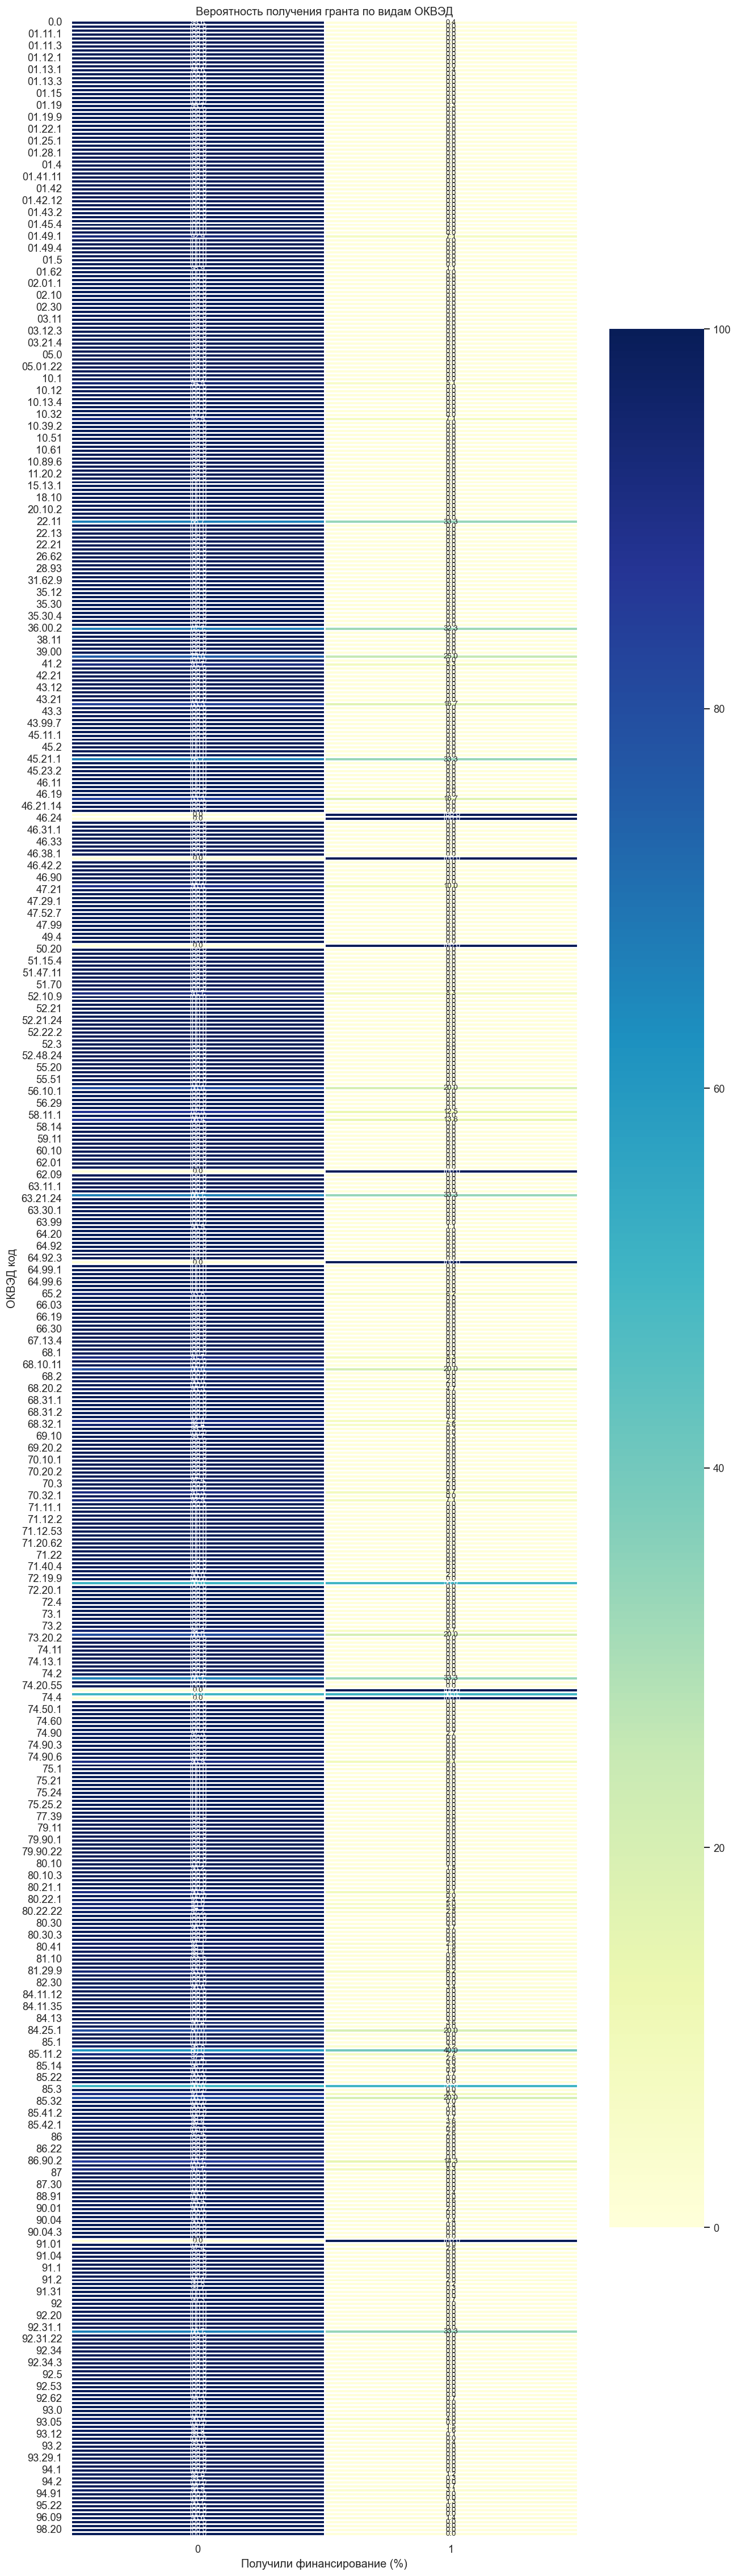

In [50]:
# Нормированная таблица (по строкам)
norm_cross_tab = pd.crosstab(
    index=df['mainOkvedCode'],
    columns=df['getFunds'],
    normalize='index'  # Доли по строкам
) * 100

# Визуализация
plt.figure(figsize=(12, 48))
ax = sns.heatmap(
    norm_cross_tab, 
    annot=True, 
    fmt='.1f',  # Один знак после запятой
    cmap="YlGnBu",
    linewidths=0.8,
    annot_kws={'size': 8}
)
ax.set(
    xlabel='Получили финансирование (%)', 
    ylabel='ОКВЭД код',
    title='Вероятность получения гранта по видам ОКВЭД'
)
plt.xticks(rotation=0)
plt.show()

Применим точный тест Фишера т.к в таблице сопряжения есть нулевые частоты.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Текущий ОКВЕД имеет вероятность получения финансирования как и все остальные.

*Альтернативная гипотеза* ($H_1$):  Текущий ОКВЕД имеет вероятность получения финансирования отличную от остальных ОКВЭД.

In [51]:
from scipy.stats import fisher_exact

# Перебор всех регионов с проверкой
for region in df['mainOkvedCode'].unique():
    subtable = pd.crosstab(
        index=df['mainOkvedCode'] == region,
        columns=df['getFunds']
    )
    # Пропускаем регионы с нулевыми частотами
    if subtable.shape == (2, 2) and subtable.values.min() > 0:
        _, p_value = fisher_exact(subtable)
        print(f"{region}: p-value = {p_value:.4f}")

94.12: p-value = 0.0020
69.10: p-value = 0.0344
68.32: p-value = 0.0000
88.99: p-value = 0.0291
70.22: p-value = 0.3098
93.12: p-value = 0.0005
68.32.2: p-value = 0.0000
94.99: p-value = 0.2108
85.41: p-value = 1.0000
90.01: p-value = 0.5510
68.32.1: p-value = 0.0000
88.10: p-value = 0.2729
63.99.1: p-value = 1.0000
94.11: p-value = 1.0000
72.19: p-value = 0.6653
93.11: p-value = 0.7645
01.49.1: p-value = 0.1958
73.20: p-value = 0.0486
68.20: p-value = 0.5107
96.09: p-value = 1.0000
0.0: p-value = 0.0000
93.19: p-value = 0.0062
85.21: p-value = 0.5946
85.42: p-value = 0.0082
85.11: p-value = 0.1740
90.04: p-value = 1.0000
68.20.2: p-value = 0.1424
94.20: p-value = 0.7346
01.13.1: p-value = 0.0400
85.42.9: p-value = 0.3282
85.30: p-value = 0.0064
91.02: p-value = 0.4550
84.24: p-value = 0.3532
85.41.9: p-value = 0.6071
85.12: p-value = 0.4465
10.11: p-value = 0.1215
82.99: p-value = 0.3632
68.10: p-value = 0.1703
01.61: p-value = 1.0000
01.19: p-value = 0.0490
10.39: p-value = 0.1958
52

Комментарии актуальны для первого датафрейма

Основываясь на результатах точного теста Фишера для проверки связи между кодами ОКВЕД (mainOkvedCode) и получением финансирования (getFunds), можно сделать следующие выводы:

Статистически значимые результаты (p < 0.05):
Наиболее значимые ассоциации (p < 0.001):

68.32, 68.32.2, 68.32.1, 0.0, 91.20, 91.33, 36.00.2, 85.11.1
Эти виды деятельности имеют крайне низкие p-значения, что свидетельствует о сильной связи с получением финансирования

Высокая значимость (0.001 ≤ p < 0.01):

94.12, 93.12, 93.19, 85.30, 58.13, 46.21, 91.3, 74.30, 70.32
Достоверная связь, но менее выраженная, чем в первой группе

Пограничная значимость (0.01 ≤ p < 0.05):

69.10, 88.99, 73.20, 01.13.1, 01.19, 63.12.1, 74.20, 85.23, 72.2, 45.21.1
Умеренная связь, требует дополнительной проверки

Незначимые результаты (p ≥ 0.05):
Большинство кодов (например, 70.22, 94.99, 85.41, 90.01 и др.) не показали статистически значимой связи с получением финансирования.

Интерпретация:
Коды с p ≈ 0.000:

Особенно выделяются коды, начинающиеся с 68.32 (операции с недвижимым имуществом) - все варианты этого кода высоко значимы

Код 0.0 (не указана деятельность) также показывает крайнюю значимость

Интересные закономерности:

Коды из раздела 91 (деятельность библиотек, архивов, музеев) демонстрируют противоречивые результаты:

91.20 и 91.33 - значимы

91.02 и 91.2 - незначимы

Итак:

Организации с кодами, показавшими высокую значимость, могут быть приоритетными для финансирования

Для кодов с пограничной значимостью требуется дополнительный анализ с учетом других факторов

Незначимые коды могут указывать на виды деятельности, слабо связанные с получением финансирования

Тесты для 'addOkvedCount' и 'incomeTotal' были выполнены ранее в этом исследовании.

getFunds и nkoAge_days.

Ранее мы строили визуализации зависимостей 'incomeTotal' от 'nkoAge_days'. Теперь для анализа зависимости между бинарным признаком getFunds (получение финансирования: 0/1) и числовым признаком nkoAge_days (возраст организации в днях) в несбалансированном датасете выбираем (данные ненормальные) U-критерий Манна-Уитни. Это Непараметрический аналог t-теста, устойчив к выбросам и дисбалансу.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Возвраст НКО не влияет на вероятность получения финансирования.

*Альтернативная гипотеза* ($H_1$):  Возвраст НКО влияет на вероятность получения финансирования.

In [52]:
from scipy.stats import mannwhitneyu
# Выбираем только столбец 'nkoAge_days' для сравнения
group_funded = df[df['getFunds'] == 1]['nkoAge_days']  # Получили финансирование
group_not_funded = df[df['getFunds'] == 0]['nkoAge_days']  # Не получили

# Проверяем размеры групп
print(f"Группа получивших финансы: {len(group_funded)}")
print(f"Группа не получивших финансы: {len(group_not_funded)}")

# Проводим тест
u_stat, p_value = mannwhitneyu(group_funded, group_not_funded, alternative='two-sided')
print(f"U-тест: p-value = {p_value:.3e}")

Группа получивших финансы: 765
Группа не получивших финансы: 48787
U-тест: p-value = 2.527e-64


Результаты U-теста Манна-Уитни показывают крайне статистически значимые различия в возрасте организаций (nkoAge_days) между группами, получившими и не получившими финансирование. Вот детальные выводы:

p-value = 2.527e-64 (<0.05, практически 0)  - различия весьма значимы.
Это означает, что возраст организации сильно связан с вероятностью получения финансирования.

In [53]:
#В какая группе "старше" НКО. Посчитаем медианный возраст:
print("Медианный возраст (получившие финансирование):", df[df['getFunds']==1]['nkoAge_days'].median())
print("Медианный возраст (не получившие финансирование):", df[df['getFunds']==0]['nkoAge_days'].median())

Медианный возраст (получившие финансирование): 5629.0
Медианный возраст (не получившие финансирование): 2581.0


Получившие финансирование НКО более, чем вдвое, всреднем, старше не получивших. Более зрелые НКО имеют больше шансов получить фонды.

In [54]:
# Подтвердим или опровергним эти выводы, проверив их методом Логистическая регрессия:
# Оценим влияние возраста на вероятность финансирования.
import statsmodels.api as sm
X = sm.add_constant(df['nkoAge_days'])  # + другие предикторы
y = df['getFunds']
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.078594
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               getFunds   No. Observations:                49552
Model:                          Logit   Df Residuals:                    49550
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Apr 2025   Pseudo R-squ.:                 0.01401
Time:                        12:02:47   Log-Likelihood:                -3894.5
converged:                       True   LL-Null:                       -3949.8
Covariance Type:            nonrobust   LLR p-value:                 7.043e-26
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.5457      0.055    -83.099      0.000      -4.653      -4.439
nkoAge_days  9.283e-05   8

Исходя из результатов логистической регрессии, анализирующей влияние возраста НКО (nkoAge_days) на вероятность получения финансирования (getFunds), можно сделать следующие выводы:

1. Статистическая значимость:
Коэффициент возраста: Крайне значим (p-value = 0.000)
Нулевая гипотеза об отсутствии связи отвергается. Возраст организации действительно влияет на вероятность получения финансирования.

2. Направление связи:
Положительный коэффициент (9.283e-05):
С увеличением возраста организации на 1 день вероятность получения финансирования растёт.
Интерпретация: Более "взрослые" НКО имеют бóльшие шансы на финансирование.

3. Сила эффекта:
Маргинальный эффект:
Увеличение возраста на 1 год (365 дней) повышает логорифм вероятности на:
9.283e-05 * 365 ≈ 0.0339.
Это соответствует увеличению отношения шансов (OR) в exp(0.0339) ≈ 1.034 раза (т.е. +3.4% за каждый год).

Псевдо-R² (0.014):
Модель объясняет всего ~1.4% дисперсии, что указывает на слабую предсказательную силу только по возрасту.
Рекомендация: Добавить другие предикторы (например, ОКВЕД-коды из предыдущего анализа).

4. Практическая значимость:
Несмотря на статистическую значимость, реальное влияние возраста минимально:
Например, разница между организацией возрастом 1 год и 10 лет даст OR = exp(0.0339 * 9) ≈ 1.35 (т.е. +35% шансов), что не является существенным.

5. Сравнение с тестом Фишера:
Результаты не противоречат предыдущему анализу:

Тест Фишера выявил значимые ОКВЕД-коды (качественный признак)

Логистическая регрессия подтвердила влияние количественного признака (возраста)

Ключевое различие: Тест Фишера оценивает локальные ассоциации, а регрессия — общий тренд.

### Зависимость финансирования ('getFunds') от региональной поддержки ('hasRegionalSupport').

In [55]:
from scipy.stats import chi2_contingency
# Таблица сопряженности
contingency_table = pd.crosstab(df['hasRegionalSupport'], df['getFunds'])
# print(contingency_table)
# Критерий хи-квадрат
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"p-value (χ²): {p_value:.4f}")

# Точный тест Фишера (для малых выборок)
odds_ratio, p_value_fisher = fisher_exact(contingency_table)
print(f"p-value (Fisher): {p_value_fisher:.4f}, OR: {odds_ratio:.2f}")

p-value (χ²): 0.0000
p-value (Fisher): 0.0000, OR: 21.91


1. Наличие влияния (p-value)
p-value ≈ 0.0000 для обоих тестов (хи-квадрат и Фишера) означает, что:

Связь между hasRegionalSupport и getFunds статистически значима (p ≪ 0.05).

Нулевая гипотеза (об отсутствии связи) отвергается.

2. Направление и сила влияния (Odds Ratio, OR)
OR = 21.91 интерпретируется так:

Если у проекта есть региональная поддержка (hasRegionalSupport = 1), то шансы получить финансирование (getFunds = 1) увеличиваются в 21.91 раз по сравнению с проектами без поддержки.

Это очень сильный эффект. Например:
Для hasRegionalSupport = 1: шансы получить финансирование = 21.91:1.

Для hasRegionalSupport = 0: шансы = 1:1 (базовый уровень).

### Зависимость финансирования ('getFunds') от статус организации на основании данных ЕГРЮЛ ('egrulStatus').

In [56]:
from scipy.stats import chi2_contingency
# Таблица сопряженности
contingency_table = pd.crosstab(df['egrulStatus'], df['getFunds'])
# print(contingency_table)
# Критерий хи-квадрат
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"p-value (χ²): {p_value:.4f}")

# Точный тест Фишера (для малых выборок)
odds_ratio, p_value_fisher = fisher_exact(contingency_table)
print(f"p-value (Fisher): {p_value_fisher:.4f}, OR: {odds_ratio:.2f}")

p-value (χ²): 0.0000
p-value (Fisher): 0.0000, OR: 1.92


1. Наличие влияния (p-value)
p-value ≈ 0.0000 для обоих тестов (хи-квадрат и Фишера) означает, что:

Связь между egrulStatus и getFunds статистически значима (p ≪ 0.05).

Нулевая гипотеза (об отсутствии связи) отвергается.

2. Направление и сила влияния (Odds Ratio, OR)
OR = 1.92 интерпретируется так:

Если у проекта статус (egrulStatus = 1), то шансы получить финансирование (getFunds = 1) увеличиваются в 1.92 раз по сравнению с проектами со статусом (egrulStatus = 0).

Это сильный эффект. Например:
Для egrulStatus = 1: шансы получить финансирование = 1.92 : 1.

Для egrulStatus = 0: шансы = 1:1 (базовый уровень).

Зависимость финансирования ('getFunds') от формы НКО ('minjustForm').

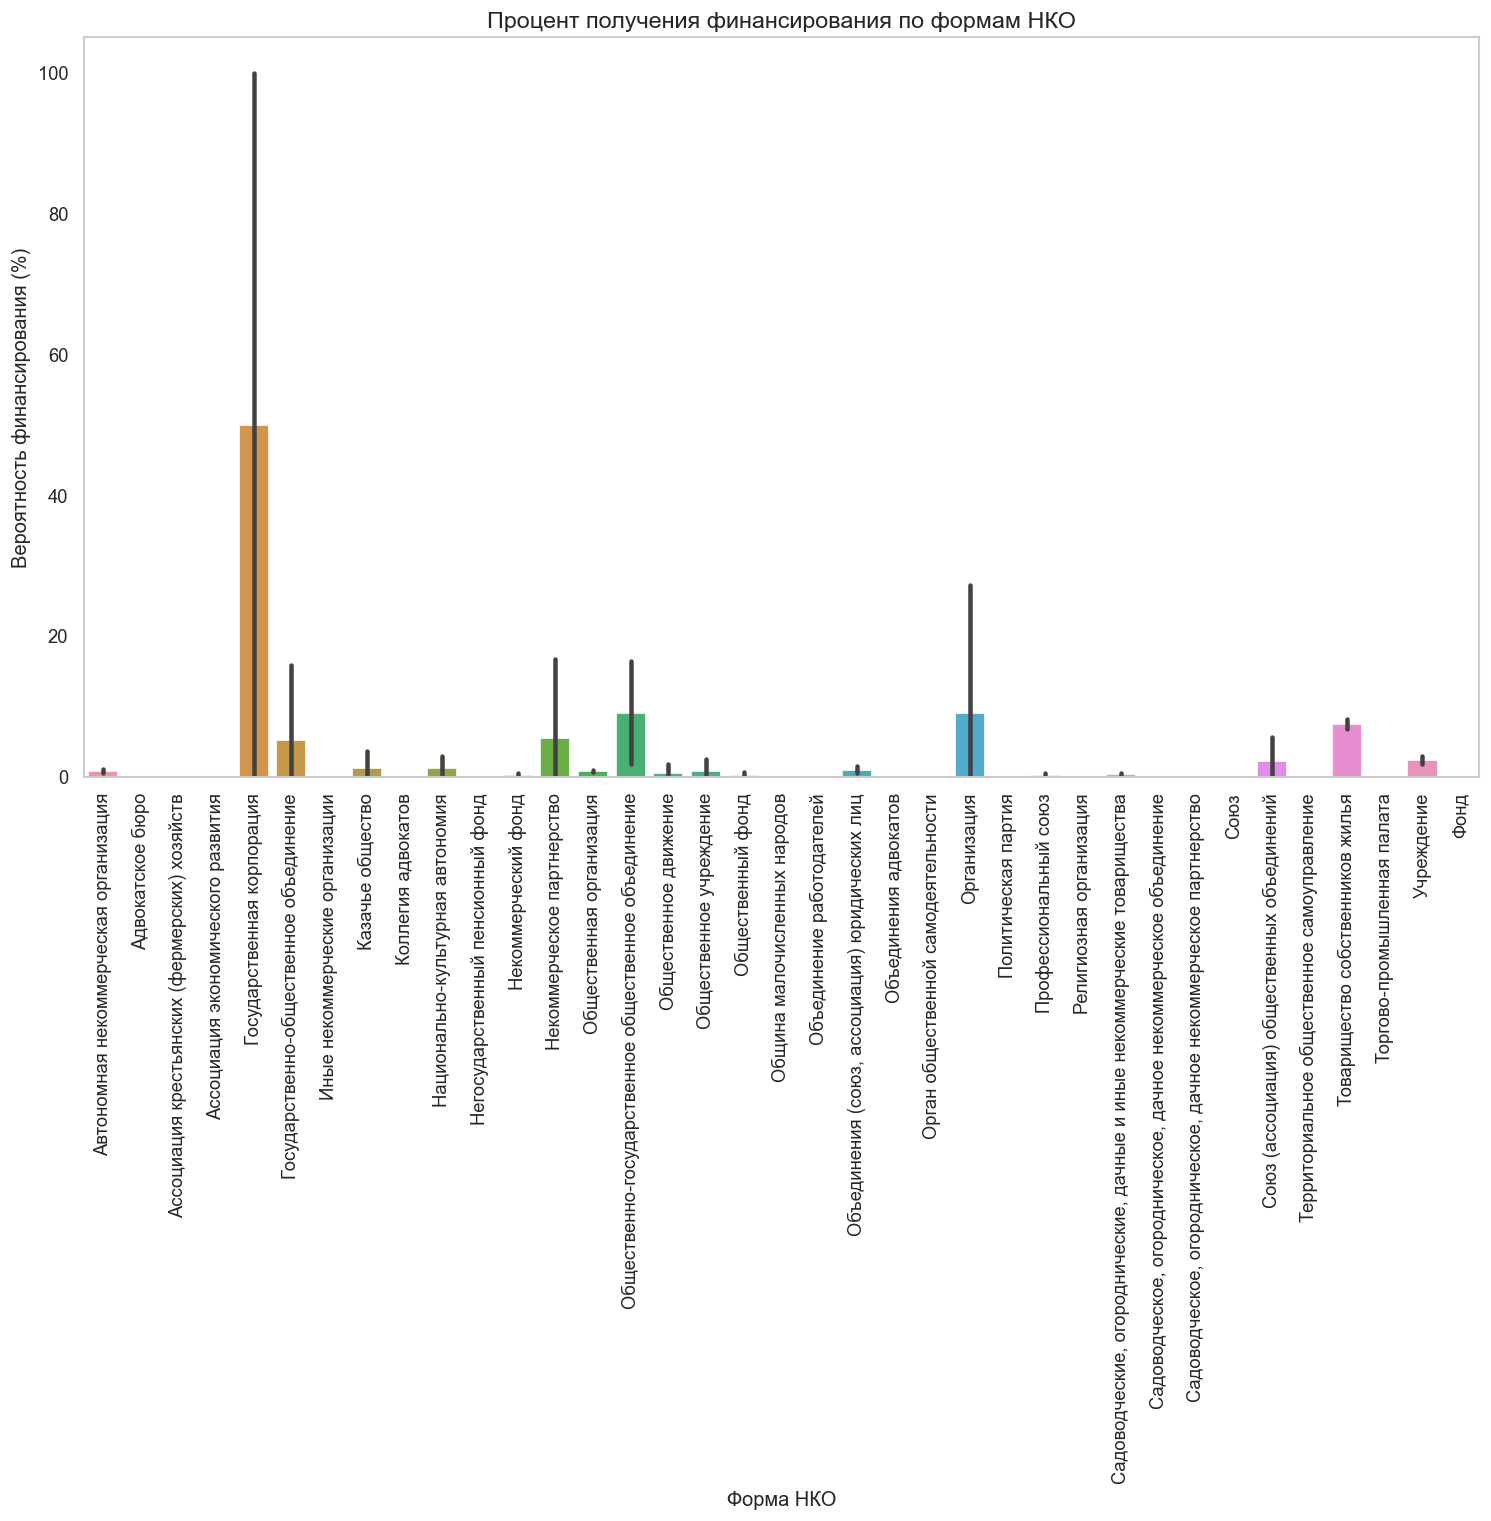

In [57]:
plt.figure(figsize=(15, 8))
sns.barplot(x='minjustForm', y='getFunds', data=df, estimator=lambda x: sum(x)/len(x)*100)
plt.title('Процент получения финансирования по формам НКО', fontsize=14)
plt.xlabel('Форма НКО', fontsize=12)
plt.ylabel('Вероятность финансирования (%)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [58]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['minjustForm'], df['getFunds'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Хи-квадрат тест: p-value = {p:.4f}")

Хи-квадрат тест: p-value = 0.0000


Результат теста хи-квадрат (p-value = 0.0000) позволяет сделать следующие статистически обоснованные выводы:

Сильная зависимость обнаружена:

Крайне малый p-value (фактически 0) однозначно отвергает нулевую гипотезу о независимости формы НКО и получения финансирования

Существует статистически значимая связь между организационно-правовой формой и вероятностью получения финансирования (p < 0.0001)

Интерпретация результатов:

Разные формы НКО имеют неслучайные различия в вероятности получения финансирования

Некоторые формы явно чаще/реже получают финансирование, чем другие

Подготовим данные к машинному обучению.

Надо расчитать вероятности получения финансирования. Это задача бинарной классификации. 
Если бы мы предсказывали суммы или количество получаемых финансов, то тогда это была бы задача регрессионного анализа. Поэтому оставим в качестве целевого признака только столбец получения-1/не получения финансирования-0. 

Остальные признаки nkoAge_days, regionCode, mainOkvedCode обработаем соответствующим образом.
Признак ogrn тоже выберем для идентификации НКО.

## Кодирование, нормализация, Отбор признаков. ##

МL

In [59]:
# Библиотеки ML
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
#from category_encoders import BinaryEncoder # проблемы с воместимостью
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, make_scorer, precision_recall_curve,
                           classification_report, average_precision_score, RocCurveDisplay,
                           PrecisionRecallDisplay)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.impute import SimpleImputer
import joblib
import warnings

In [60]:
# df с набором колонок для дальнейшей работы.
df_before_ml = df.copy()
df = df_before_ml[['nkoAge_days', 'regionCode', 'mainOkvedCode',
                   'addOkvedCount','hasRegionalSupport','minjustForm', 'egrulStatus','getFunds']].copy()
df['addOkvedCount'] = df['addOkvedCount'].astype(np.int16) # для оптимизации памяти
df['nkoAge_days'] = df['nkoAge_days'].astype(np.int32) # для оптимизации памяти
# Просто убрал из списка выше. Удаляем идентификатор и признаки, которые не будем использовать
# df = df.drop(['ogrn'], axis=1) # при вторичных обработках вызывает ошибку


In [61]:
# ВНИМАНИЕ. ДЛЯ ПЕРВОГО ДАТАФРЕЙМА, КОТОРЫЙ ДЛЯ ОБУЧЕНИЯ НЕ ИСПОЛЬЗОВАТЬ.
# Использовать для других датафреймов после предобработки и обучения на первом.
# Загружаем модель. Используем вариант CatBoost c кросс-валидацией. 
# Есть Альтернотива с GridSearch 'catboost_model_gridsearch.pkl'
# Вывод результатов для ngo_dump_15.json. Который я предварительно предобработал и загрузил.
loaded_package = joblib.load('./pkl/catboost_model_cv.pkl')
# Извлекаем модель и порог
loaded_model = loaded_package['pipeline']
loaded_threshold = loaded_package['threshold']
#  'pipeline': catboost_pipeline,       # <-- обученная модель
#  'threshold': best_threshold          # <-- оптимальный порог из п.7
# Прогноз вероятностей на новых данных
y_proba_new = loaded_model.predict_proba(df)[:, 1]

# Применяем сохранённый порог
y_pred_new = (y_proba_new >= loaded_threshold).astype(int)
# df теперь новый датасет.
# 
# y_true_new = df['getFunds']  # Првильные ответы (0/1)
y_true_new = df['getFunds']
# новый датафрейм без таргет столбца
df_new = df.drop('getFunds', axis=1).copy()
# Работаем с признаками
numeric_features = ['nkoAge_days']
ordinal_features = ['addOkvedCount']
categorical_features = ['regionCode', 'minjustForm', 'mainOkvedCode']
binary_features = ['hasRegionalSupport', 'egrulStatus']
# 2. Убедись, что категориальные признаки приведены к строкам (если нужно):
for col in categorical_features:
    df_new[col] = df_new[col].astype(str)

# 3. Предсказание вероятностей и классов
y_proba_new = loaded_model.predict_proba(df_new)[:, 1]
y_pred_new = (y_proba_new >= loaded_threshold).astype(int)

# 4. Расчёт метрик
print("\nОценка на новых данных:")
print("Accuracy:", accuracy_score(y_true_new, y_pred_new))
print("Precision:", precision_score(y_true_new, y_pred_new, zero_division=0))
print("Recall:", recall_score(y_true_new, y_pred_new))
print("F1-score:", f1_score(y_true_new, y_pred_new))
print("ROC-AUC:", roc_auc_score(y_true_new, y_proba_new))

# Полный отчёт
print("\nОтчёт о классификации:")
print(classification_report(y_true_new, y_pred_new))


Оценка на новых данных:
Accuracy: 0.983613174039393
Precision: 0.4585537918871252
Recall: 0.33986928104575165
F1-score: 0.39039039039039036
ROC-AUC: 0.919565468728879

Отчёт о классификации:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     48787
           1       0.46      0.34      0.39       765

    accuracy                           0.98     49552
   macro avg       0.72      0.67      0.69     49552
weighted avg       0.98      0.98      0.98     49552



In [63]:
# Особое внимание уделим CatBoost, т.к все кроме 'nkoAge_days' категориальные.
warnings.filterwarnings('ignore', category=UserWarning)	# Уберем предупреждения не важные
# Определение признаков
# 1. Преобразуем категориальные признаки в строки
X = df.drop('getFunds', axis=1).copy()
y = df['getFunds']
numeric_features = ['nkoAge_days']
ordinal_features = ['addOkvedCount']
categorical_features = ['regionCode', 'minjustForm', 'mainOkvedCode']
binary_features = ['hasRegionalSupport', 'egrulStatus']

# 1. Общий препроцессор для обычных моделей
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('ord', OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
            categories='auto'), ordinal_features),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(
                handle_unknown='ignore',
                sparse_output=False,
                drop='if_binary')),
            ('variance', VarianceThreshold(threshold=0.05))
        ]), categorical_features),
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'
)
# Отдельный препроцессор для CatBoost
preprocessor_CB = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ],
    remainder='passthrough'  # All other features (ordinal, categorical, binary) go untouched
)

In [141]:
# CatBoost начальное приближение
# Явное преобразование категорий в строки

# for CatBoost****************
for col in categorical_features:
    X[col] = X[col].astype(str)
    
# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


# New column order: numeric + everything else
transformed_features = numeric_features + [
    col for col in X_train.columns if col not in numeric_features
]

cat_indices = [transformed_features.index(col) for col in categorical_features]

catboost_model = CatBoostClassifier(
    cat_features=cat_indices,
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=100
)

# # CatBoost требует индексы столбцов (а не имена) для категориальных признаков.
# catboost_model = CatBoostClassifier(
#     cat_features=[X_train.columns.get_loc(col) for col in categorical_features],
#     auto_class_weights='Balanced',
#     random_seed=42,
#     verbose=100
# )
# 6. Собираем пайплайн
pipeline = Pipeline([
    ('preprocessor', preprocessor_CB),
    ('classifier', catboost_model)
])

# 7. Обучение
pipeline.fit(X_train, y_train)

# 8. Оценка
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

Learning rate set to 0.046836
0:	learn: 0.6833356	total: 156ms	remaining: 2m 36s
100:	learn: 0.4315039	total: 8.53s	remaining: 1m 15s
200:	learn: 0.3894071	total: 20.4s	remaining: 1m 21s
300:	learn: 0.3284270	total: 39s	remaining: 1m 30s
400:	learn: 0.2823037	total: 48.5s	remaining: 1m 12s
500:	learn: 0.2482035	total: 57.4s	remaining: 57.2s
600:	learn: 0.2239716	total: 1m 6s	remaining: 44s
700:	learn: 0.2055193	total: 1m 15s	remaining: 32.3s
800:	learn: 0.1871822	total: 1m 24s	remaining: 21s
900:	learn: 0.1716954	total: 1m 36s	remaining: 10.6s
999:	learn: 0.1575255	total: 1m 46s	remaining: 0us
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     14636
           1       0.10      0.55      0.17       230

    accuracy                           0.92     14866
   macro avg       0.55      0.74      0.56     14866
weighted avg       0.98      0.92      0.94     14866



Начинаем подбор параметров...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6901186	total: 213ms	remaining: 3m 33s
10:	learn: 0.6626463	total: 814ms	remaining: 1m 13s
20:	learn: 0.6402102	total: 1.41s	remaining: 1m 5s
30:	learn: 0.6195407	total: 2.02s	remaining: 1m 3s
40:	learn: 0.6043569	total: 2.65s	remaining: 1m 2s
50:	learn: 0.5905350	total: 3.23s	remaining: 1m
60:	learn: 0.5781947	total: 3.8s	remaining: 58.4s
70:	learn: 0.5654821	total: 4.38s	remaining: 57.3s
80:	learn: 0.5558466	total: 5.04s	remaining: 57.2s
90:	learn: 0.5472490	total: 5.71s	remaining: 57s
100:	learn: 0.5392007	total: 6.3s	remaining: 56.1s
110:	learn: 0.5323794	total: 6.84s	remaining: 54.8s
120:	learn: 0.5265492	total: 7.44s	remaining: 54.1s
130:	learn: 0.5206050	total: 7.93s	remaining: 52.6s
140:	learn: 0.5147337	total: 8.52s	remaining: 51.9s
150:	learn: 0.5106826	total: 9.02s	remaining: 50.7s
160:	learn: 0.5067585	total: 9.56s	remaining: 49.8s
170:	learn: 0.5038651	total: 10s	remaini

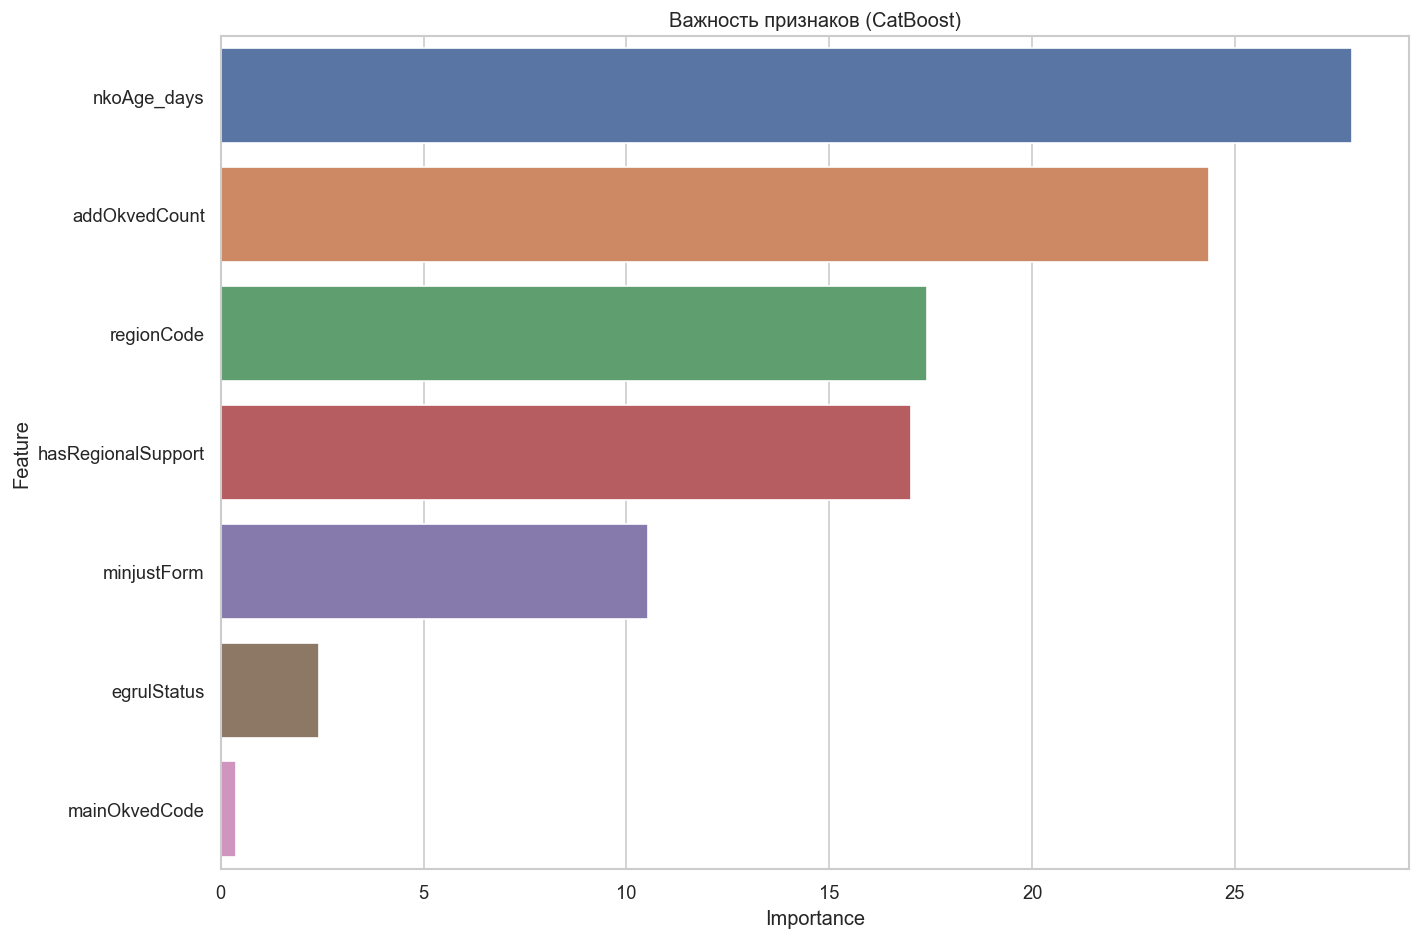

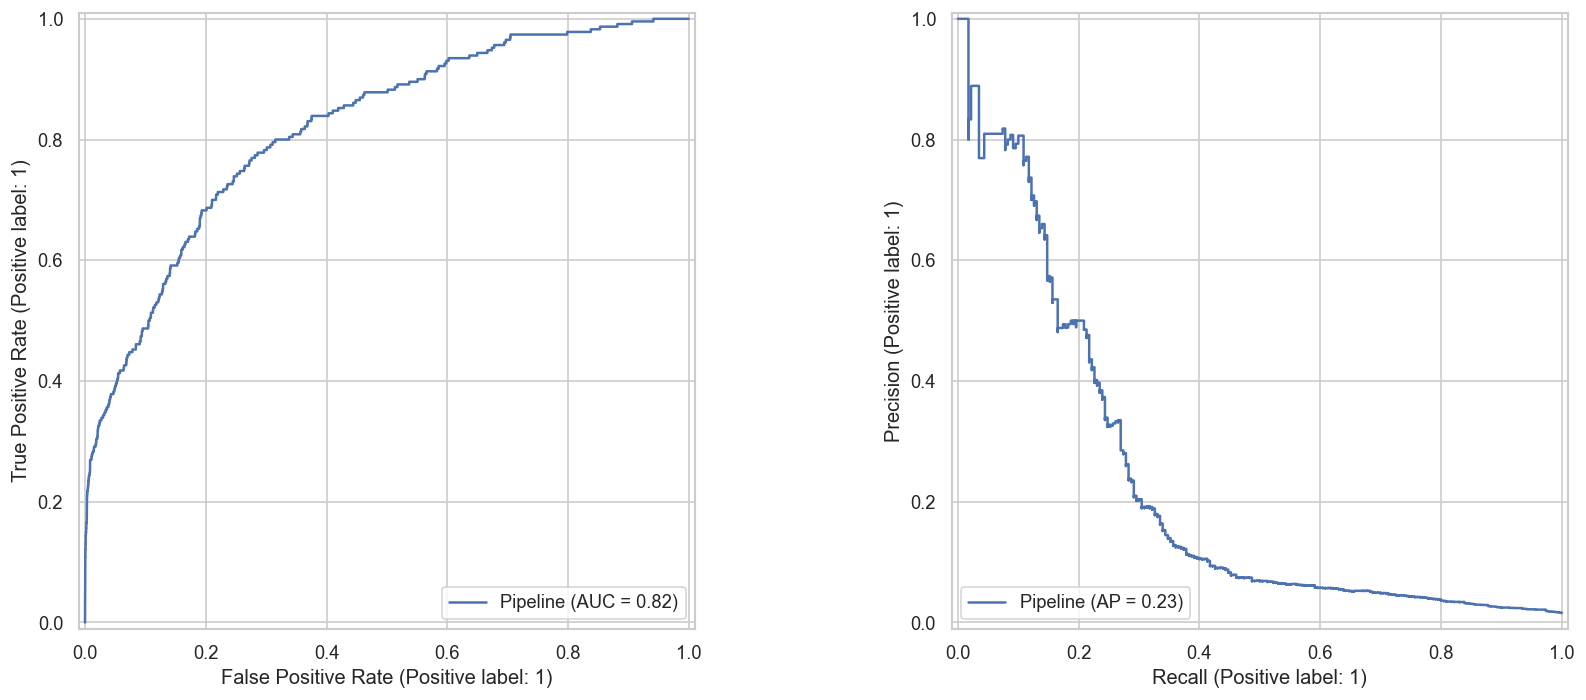


Лучшие метрики по фолдам:
                                               params  mean_test_f1  \
23  {'classifier__depth': 8, 'classifier__l2_leaf_...      0.246446   
20  {'classifier__depth': 8, 'classifier__l2_leaf_...      0.245820   
14  {'classifier__depth': 6, 'classifier__l2_leaf_...      0.221453   
26  {'classifier__depth': 8, 'classifier__l2_leaf_...      0.219399   
19  {'classifier__depth': 8, 'classifier__l2_leaf_...      0.219099   

    mean_test_roc_auc  mean_test_pr_auc  
23                NaN               NaN  
20                NaN               NaN  
14                NaN               NaN  
26                NaN               NaN  
19                NaN               NaN  


In [ ]:
# Catboost с grid_search подбором параметров и оптимизацией порога по F1
# 189 минут

# for CatBoost****************
for col in categorical_features:
    X[col] = X[col].astype(str)
    
# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


# 5. Полная настройка CatBoost
catboost_params = {
    'iterations': 1000,
    'learning_rate': 0.05,
    'depth': 6,
    'l2_leaf_reg': 3,
    'border_count': 32,
    'random_strength': 1,
    'bagging_temperature': 0.8,
    'early_stopping_rounds': 50,
    'eval_metric': 'F1',
    'loss_function': 'Logloss',
    'random_seed': 42,
    'verbose': 100,
    'task_type': 'CPU',  # Меняем на 'GPU' если доступно
    'cat_features': [X.columns.get_loc(col) for col in categorical_features],
    'auto_class_weights': 'Balanced'
}

# 6. Создание пайплайна
# New column order: numeric + everything else
transformed_features = numeric_features + [
    col for col in X_train.columns if col not in numeric_features
]
cat_indices = [transformed_features.index(col) for col in categorical_features]

# Полный пайплайн с CatBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor_CB),
    ('classifier', CatBoostClassifier(
    cat_features=cat_indices,
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=10))
])



# 7. Полная кросс-валидация с подбором параметров
param_grid = {
    'classifier__depth': [4, 6, 8],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__l2_leaf_reg': [1, 3, 5]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'pr_auc': make_scorer(average_precision_score, needs_proba=True)
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=scoring,
    refit='f1',
    n_jobs=1,    # -1 (все ядра работают- возникает ошибка)
    verbose=3,
    return_train_score=True
)

# 8. Запуск подбора параметров
print("Начинаем подбор параметров...")
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)

# 9. Сохранение лучшей модели
best_model = grid_search.best_estimator_
#joblib.dump(best_model, './pkl/best_catboost_model.pkl')

# 10. Полная оценка на тестовом наборе
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nПолный отчет о классификации:")
print(classification_report(y_test, y_pred))

print("\nМетрики качества:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba):.4f}")

# 11. Оптимизация порога по F1
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_threshold = thresholds[np.argmax(f1_scores)]
y_pred_optimized = (y_proba >= best_threshold).astype(int)

print(f"\nОптимизированный порог: {best_threshold:.4f}")
print(classification_report(y_test, y_pred_optimized))

# 12. Визуализация важности признаков (исправлено)

# Извлекаем обученный CatBoostClassifier
catboost_model = best_model.named_steps['classifier']

# Получаем важности признаков
feature_importances = catboost_model.get_feature_importance()

# Убедимся, что порядок признаков соответствует препроцессингу
X_preprocessed = preprocessor_CB.fit_transform(X_train)
feature_names = numeric_features + ordinal_features + categorical_features + binary_features

#  Проверка длины
assert len(feature_importances) == len(feature_names), "Mismatch between features and importances"

#  DataFrame + сортировка
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# 6. Визуализация
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Важность признаков (CatBoost)')
plt.tight_layout()
plt.savefig('./pic/feature_importance.png')
plt.show()

# 13. Анализ кривых ROC и Precision-Recall
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=ax2)
plt.tight_layout()
plt.savefig('./pic/metrics_curves.png')
plt.show()

# 14. Дополнительный анализ по фолдам
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.to_csv('./data/cv_results.csv', index=False)

print("\nЛучшие метрики по фолдам:")
print(cv_results[['params', 'mean_test_f1', 'mean_test_roc_auc', 'mean_test_pr_auc']]
      .sort_values('mean_test_f1', ascending=False).head())
# Сохраним модель 
model_package_grid = {
    'pipeline': best_model,         # <-- обученная модель через GridSearchCV
    'threshold': best_threshold     # соответствующий оптимальный порог
}

joblib.dump(model_package_grid, './pkl/catboost_model_gridsearch.pkl')
print("Модель с GridSearch сохранена.")

In [ ]:
# Рабочий простой Catboost + несложная кросвалидация. 4мин 47 сек

# for CatBoost****************
for col in categorical_features:
    X[col] = X[col].astype(str)
    
# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
# Создание пайплайна
# New column order: numeric + everything else
transformed_features = numeric_features + [
    col for col in X_train.columns if col not in numeric_features
]
cat_indices = [transformed_features.index(col) for col in categorical_features]

# 5. Инициализация CatBoost
catboost_model = CatBoostClassifier(
    cat_features=cat_indices,
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=100  # Чтобы видеть прогресс
)

# 6. Создание пайплайна
pipeline = Pipeline([
    ('preprocessor', preprocessor_CB),
    #('string_converter', FunctionTransformer(lambda X: X.astype(str))),
    ('classifier', catboost_model)
])

# 7. Кросс-валидация не сложная
try:
    cv_scores = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),  # Уменьшили число фолдов
        scoring=['accuracy', 'f1', 'roc_auc'],
        n_jobs=1,
        error_score='raise'
    )
    print("CV Results:", cv_scores)
except Exception as e:
    print(f"Ошибка кросс-валидации: {str(e)}")

# 8. Обучение на полных данных
pipeline.fit(X_train, y_train)

# 9. Оценка на тестовом наборе
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

# 10. Важность признаков
if hasattr(pipeline.named_steps['classifier'], 'get_feature_importance'):
    feature_importances = pipeline.named_steps['classifier'].get_feature_importance()
    feature_names = numeric_features + categorical_features
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances[:len(feature_names)]  # Берем только нужные признаки
    }).sort_values('Importance', ascending=False)
    
    print("\nFeature Importances:")
    print(importance_df)

Learning rate set to 0.03939
0:	learn: 0.6843156	total: 42.1ms	remaining: 42.1s
100:	learn: 0.4294573	total: 6.5s	remaining: 57.8s
200:	learn: 0.3937869	total: 12.1s	remaining: 48.2s
300:	learn: 0.3414692	total: 18.3s	remaining: 42.4s
400:	learn: 0.2778302	total: 25.4s	remaining: 38s
500:	learn: 0.2364625	total: 32.4s	remaining: 32.3s
600:	learn: 0.2073400	total: 39.3s	remaining: 26.1s
700:	learn: 0.1852752	total: 46.2s	remaining: 19.7s
800:	learn: 0.1682753	total: 53.6s	remaining: 13.3s
900:	learn: 0.1522994	total: 1m	remaining: 6.66s
999:	learn: 0.1395610	total: 1m 7s	remaining: 0us
Learning rate set to 0.03939
0:	learn: 0.6863848	total: 53ms	remaining: 52.9s
100:	learn: 0.4183885	total: 6.26s	remaining: 55.7s
200:	learn: 0.3799847	total: 11.6s	remaining: 46s
300:	learn: 0.3238009	total: 17.6s	remaining: 40.8s
400:	learn: 0.2638968	total: 24.2s	remaining: 36.2s
500:	learn: 0.2244107	total: 31.2s	remaining: 31.1s
600:	learn: 0.1967997	total: 38.2s	remaining: 25.4s
700:	learn: 0.177085

[CV] START .....................................................................
[CV] END  accuracy: (test=0.825) f1: (test=0.114) precision: (test=0.062) recall: (test=0.732) roc_auc: (test=nan) total time=  23.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   23.4s
[CV] START .....................................................................
[CV] END  accuracy: (test=0.772) f1: (test=0.094) precision: (test=0.050) recall: (test=0.765) roc_auc: (test=nan) total time=  21.8s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   45.4s
[CV] START .....................................................................
[CV] END  accuracy: (test=0.819) f1: (test=0.112) precision: (test=0.061) recall: (test=0.739) roc_auc: (test=nan) total time=  22.9s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  1.1min
[CV] START .....................................................................
[CV] END  accuracy: (test=0.814) f1: (test=0.107) precision: (test=0.058) recall: (test=0.7

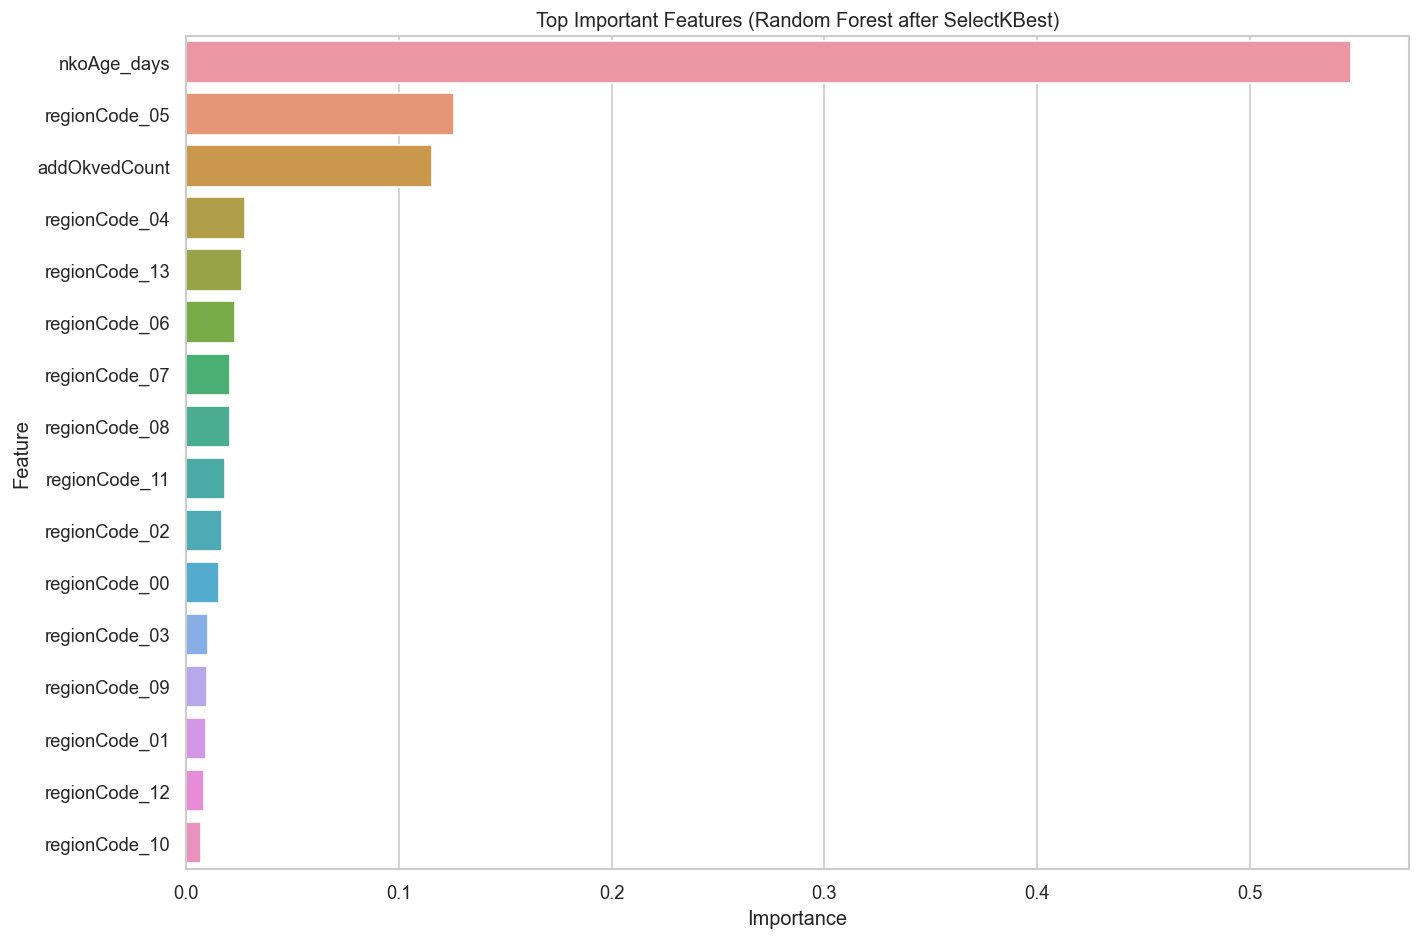


Top 20 features by impact (Logistic Regression):
          Feature  Coefficient  Odds_Ratio
14  regionCode_12     2.472094   11.847225
7   regionCode_05     2.414136   11.180110
8   regionCode_06     1.559893    4.758310
0     nkoAge_days     0.760606    2.139573
3   regionCode_01     0.550067    1.733368
2   regionCode_00     0.420070    1.522069
13  regionCode_11     0.391895    1.479782
4   regionCode_02     0.230131    1.258765
1   addOkvedCount     0.061622    1.063560
15  regionCode_13    -0.150305    0.860446
12  regionCode_10    -0.320054    0.726110
10  regionCode_08    -0.897172    0.407721
5   regionCode_03    -0.954159    0.385136
11  regionCode_09    -1.124928    0.324676
6   regionCode_04    -1.336481    0.262769
9   regionCode_07    -1.458401    0.232608


In [63]:
from sklearn.base import clone
# LogisticRegression, RandomForestClassifier, GradientBoostingClassifier, SVC
# Вариант KFold считает 1 час  + OrdinalEncoder для 'addOkvedCount'
# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, stratify=y, random_state=42
 )
# 3. Определение моделей и метрик
# 3. Определение моделей с оптимизированными параметрами
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        solver='saga',
        penalty='elasticnet',
        l1_ratio=0.5,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        class_weight='balanced',
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=42
    ),
    "SVM": SVC(
        class_weight='balanced',
        probability=True,
        kernel='rbf',
        gamma='scale',
        random_state=42
    )
}

# 4. Метрики и кросс-валидация
metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(score_func=f_classif, k='all')),  # Убрали жесткий отбор признаков
        ('classifier', model)
    ])
    
    cv_results = cross_validate(
        pipeline, 
        X, 
        y, 
        cv=skf,
        scoring=metrics,
        return_train_score=False,
        n_jobs=1,  # Используем все ядра -1 
        verbose=100
    )
    
    results[name] = {
        metric: f"{np.mean(scores):.4f} ± {np.std(scores):.4f}"
        for metric, scores in cv_results.items() if metric.startswith('test_')
    }

# 5. Визуализация результатов
metrics_df = pd.DataFrame(results).T
metrics_df.columns = [col.replace('test_', '') for col in metrics_df.columns]
print("\nРезультаты кросс-валидации:")
print(metrics_df)

# Анализ важности признаков (Random Forest после SelectKBest)
# Повторное обучение с селектором
# Создание пайплайна селектора
feature_selector = SelectKBest(score_func=f_classif, k='all')
selector_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', feature_selector)
])
selector_pipeline.fit(X_train, y_train)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', clone(feature_selector)),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])
rf_pipeline.fit(X_train, y_train)

# Получение имен признаков после селектора
numeric_names = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features)
cat_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
binary_names = binary_features
all_features = list(numeric_names) + list(ordinal_features) + list(cat_names) + list(binary_names)

# Отобранные признаки
selected_mask = feature_selector.get_support()
selected_features = [name for name, keep in zip(all_features, selected_mask) if keep]

# Получение важностей
importances = rf_pipeline.named_steps['classifier'].feature_importances_
print(f"Selected features: {len(selected_features)}, Importances: {len(importances)}")

feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Визуализация
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top Important Features (Random Forest after SelectKBest)')
plt.tight_layout()
plt.show()

# 8. Интерпретация логистической регрессии (тоже с SelectKBest)
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', clone(feature_selector)),
    ('classifier', LogisticRegression(max_iter=750, class_weight='balanced'))
])
logreg_pipeline.fit(X_train, y_train)

logreg_coef = logreg_pipeline.named_steps['classifier'].coef_[0]
logreg_results = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': logreg_coef
})
logreg_results['Odds_Ratio'] = np.exp(logreg_results['Coefficient'])
logreg_results = logreg_results.sort_values('Odds_Ratio', ascending=False)

print("\nTop 20 features by impact (Logistic Regression):")
print(logreg_results.head(20))

Learning rate set to 0.042579
0:	learn: 0.6790900	total: 79.5ms	remaining: 1m 19s
100:	learn: 0.8028510	total: 7.92s	remaining: 1m 10s
200:	learn: 0.8258992	total: 15.1s	remaining: 59.9s
300:	learn: 0.8592022	total: 23.9s	remaining: 55.4s
400:	learn: 0.8937071	total: 32.5s	remaining: 48.6s
500:	learn: 0.9232884	total: 41.6s	remaining: 41.4s
600:	learn: 0.9393179	total: 49.4s	remaining: 32.8s
700:	learn: 0.9506451	total: 57.3s	remaining: 24.4s
800:	learn: 0.9595658	total: 1m 5s	remaining: 16.1s
900:	learn: 0.9640494	total: 1m 12s	remaining: 7.99s
999:	learn: 0.9679191	total: 1m 21s	remaining: 0us
Learning rate set to 0.04258
0:	learn: 0.7080761	total: 72.5ms	remaining: 1m 12s
100:	learn: 0.7781077	total: 13.8s	remaining: 2m 2s
200:	learn: 0.8103012	total: 30.9s	remaining: 2m 2s
300:	learn: 0.8513575	total: 53.9s	remaining: 2m 5s
400:	learn: 0.8972815	total: 1m 10s	remaining: 1m 45s
500:	learn: 0.9290948	total: 1m 26s	remaining: 1m 26s
600:	learn: 0.9397344	total: 1m 48s	remaining: 1m 11

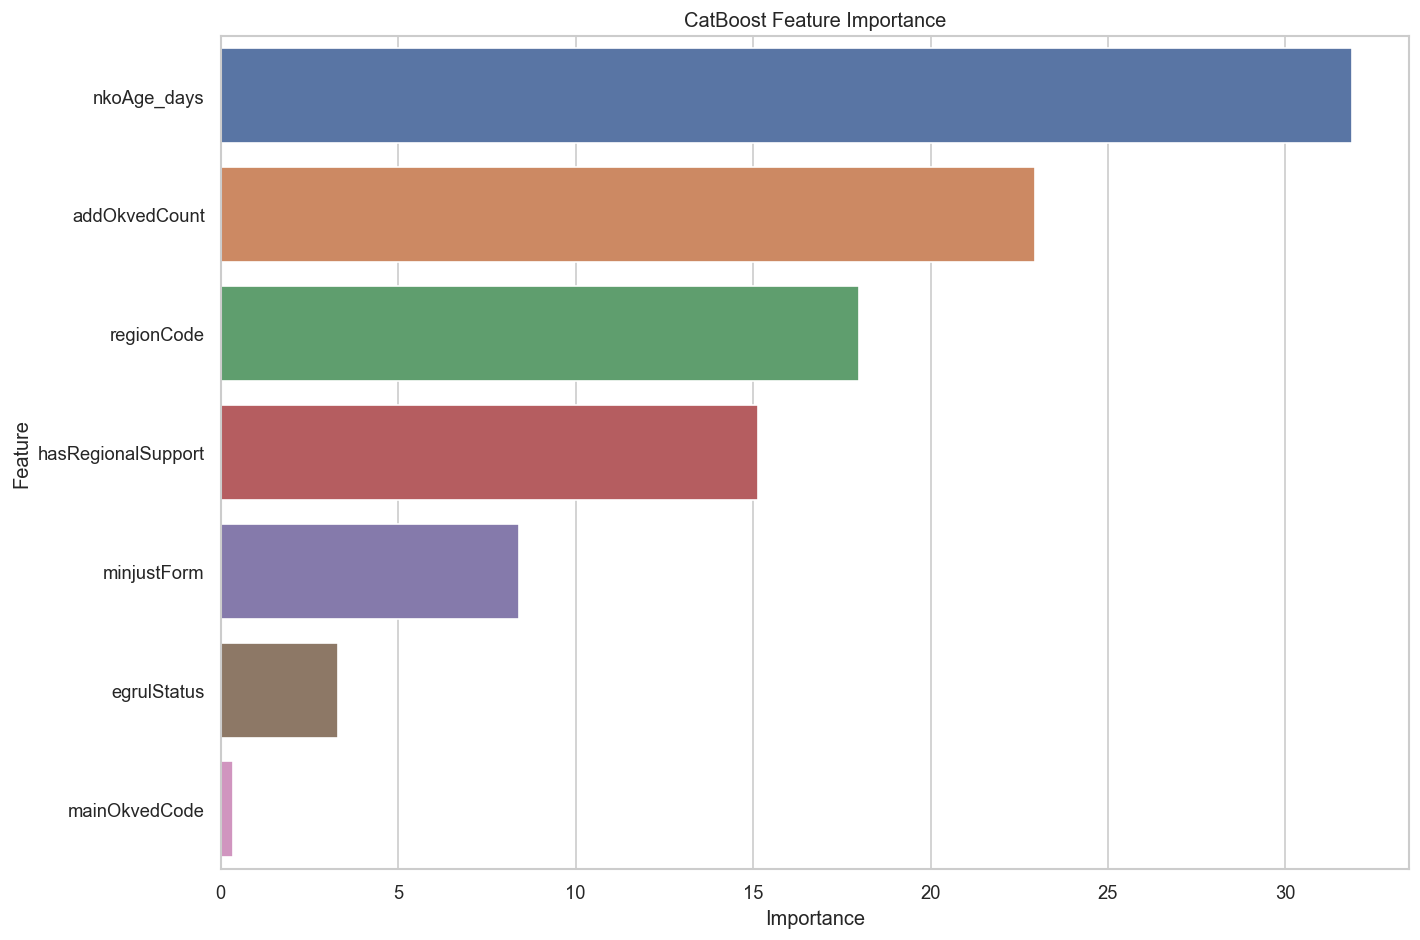

Модель с кросс-валидацией сохранена.


In [ ]:
# CatBoost + Кросс-валидация + оптимизация порога вероятности отнесения к классам ~11 минут

# for CatBoost****************
# Категориальнын признаки должны быть строками для CatBoost
for col in categorical_features:
    X[col] = X[col].astype(str)
    
# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
# Создание пайплайна
# New column order: numeric + everything else
transformed_features = numeric_features + [
    col for col in X_train.columns if col not in numeric_features
]
cat_indices = [transformed_features.index(col) for col in categorical_features]
# 4. Создание пайплайна с CatBoost
catboost_pipeline = Pipeline([
    ('preprocessor', preprocessor_CB),
    ('classifier', CatBoostClassifier(
        cat_features=cat_indices,
        auto_class_weights='Balanced',
        random_state=42,
        verbose=100,  # Выводим информацию о процессе обучения
        eval_metric='F1',
        early_stopping_rounds=50
    ))
])

# 5. Кросс-валидация
cv_results = cross_validate(
    catboost_pipeline,
    X_train, y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
    },
    n_jobs=1  # CatBoost не поддерживает параллельные вычисления на кросс-валидации
)

# 6. Обучение и оценка
catboost_pipeline.fit(X_train, y_train)
y_proba = catboost_pipeline.predict_proba(X_test)[:, 1]
y_pred = catboost_pipeline.predict(X_test)

print("\nCatBoost Classification Report (Default Threshold=0.5):")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

# 7. Оптимизация порога
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_threshold = thresholds[np.argmax(f1_scores)]
y_pred_optimized = (y_proba >= best_threshold).astype(int)

print("\nOptimized Threshold {:.4f} Report:".format(best_threshold))
print(classification_report(y_test, y_pred_optimized))

# 8. Анализ важности признаков
# Получаем имена преобразованных признаков
num_ord_features = numeric_features + ordinal_features
other_features = binary_features  # Бинарные признаки остаются как есть

# Категориальные признаки остаются с исходными именами
all_features = num_ord_features + categorical_features + other_features

feature_importance = catboost_pipeline.named_steps['classifier'].get_feature_importance()
importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nTop 20 Important Features:")
print(importance_df.head(20))

# Визуализация
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('CatBoost Feature Importance')
plt.tight_layout()
plt.show()

# 9. Сохраняем модель и оптимальный порог в один словарь
model_package_cv = {
    'pipeline': catboost_pipeline,       # <-- обученная модель
    'threshold': best_threshold          # <-- оптимальный порог из п.7
}

joblib.dump(model_package_cv, './pkl/catboost_model_cv.pkl')
print("Модель с кросс-валидацией сохранена.")

c:\Users\dlokt\VSProjects\Python\SkFactMaterials\TestsPractics\final_HKO\myenv\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros

c:\Users\dlokt\VSProjects\Python\SkFactMaterials\TestsPractics\final_HKO\myenv\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros

c:\Users\dlokt\VSProjects\Python\SkFactMaterials\TestsPractics\final_HKO\myenv\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros

c:\Users\dlokt\VSProjects\Python\SkFactMaterials\TestsPractics\final_HKO\myenv\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [1, 2] durin

                     Accuracy  Precision    Recall        F1   ROC-AUC
Logistic Regression  0.813669   0.061464  0.773913  0.113884  0.846673
Random Forest        0.974573   0.144231  0.130435  0.136986  0.708669
Gradient Boosting    0.984327   0.363636  0.017391  0.033195  0.883196
SVM                  0.808153   0.060657  0.786957  0.112632  0.864167
Selected features: 16, Importances: 16


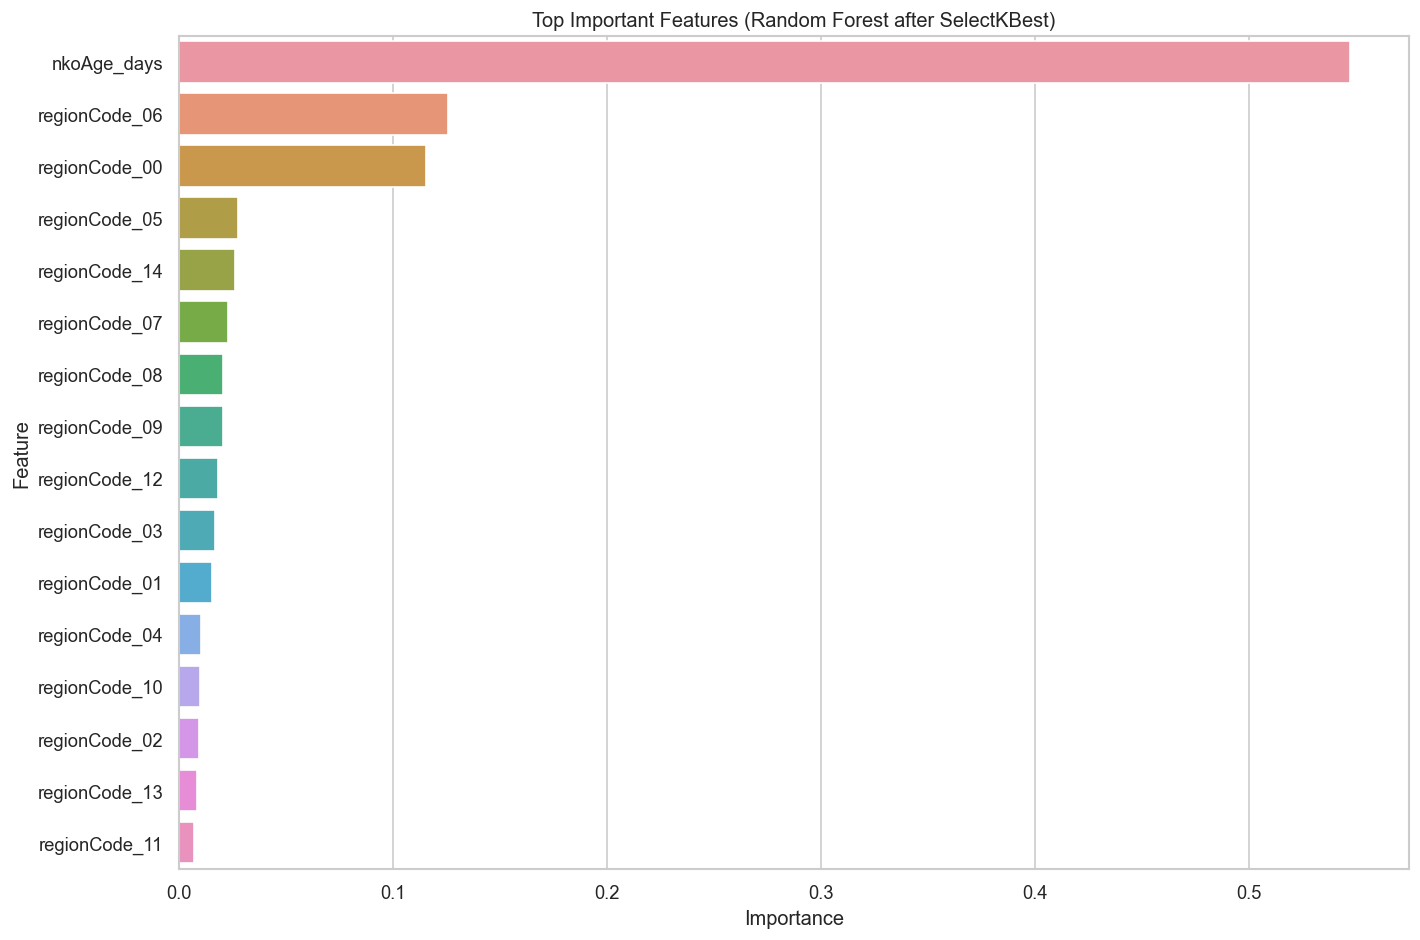


Top 20 features by impact (Logistic Regression):
          Feature  Coefficient  Odds_Ratio
14  regionCode_13     2.481273   11.956479
7   regionCode_06     2.403492   11.061731
8   regionCode_07     1.563521    4.775606
0     nkoAge_days     0.763744    2.146297
3   regionCode_02     0.552516    1.737619
2   regionCode_01     0.418288    1.519358
13  regionCode_12     0.391849    1.479715
4   regionCode_03     0.229327    1.257753
1   regionCode_00     0.061554    1.063488
15  regionCode_14    -0.144352    0.865583
12  regionCode_11    -0.311159    0.732597
10  regionCode_09    -0.888628    0.411220
5   regionCode_04    -0.959884    0.382937
11  regionCode_10    -1.116835    0.327314
6   regionCode_05    -1.351015    0.258977
9   regionCode_08    -1.455250    0.233342


In [149]:
# Первое приближение
# LogisticRegression, RandomForestClassifier, GradientBoostingClassifier, SVC
# Анализ важности признаков (на примере Random Forest)
# 1. Подготовка данных
# (X, y, preprocessor уже созданы ранее)

# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Создание пайплайна селектора
feature_selector = SelectKBest(score_func=f_classif, k='all')
selector_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', feature_selector)
])
selector_pipeline.fit(X_train, y_train)

# 4. Подготовка моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(class_weight='balanced', probability=True, random_state=42)
}

# 5. Обучение и оценка моделей
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('selector', feature_selector),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

# 6. Визуализация метрик
metrics_df = pd.DataFrame(results).T
print(metrics_df)

# 7. Анализ важности признаков (Random Forest после SelectKBest)
# Повторное обучение с селектором
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', feature_selector),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])
rf_pipeline.fit(X_train, y_train)

# Получение имен признаков после селектора
numeric_names = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features)
cat_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
binary_names = binary_features
all_features = list(numeric_names) + list(cat_names) + list(binary_names)

# Отобранные признаки
selected_mask = feature_selector.get_support()
selected_features = [name for name, keep in zip(all_features, selected_mask) if keep]

# Получение важностей
importances = rf_pipeline.named_steps['classifier'].feature_importances_
print(f"Selected features: {len(selected_features)}, Importances: {len(importances)}")

feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Визуализация
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top Important Features (Random Forest after SelectKBest)')
plt.tight_layout()
plt.show()

# 8. Интерпретация логистической регрессии (тоже с SelectKBest)
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', feature_selector),
    ('classifier', LogisticRegression(max_iter=750, class_weight='balanced'))
])
logreg_pipeline.fit(X_train, y_train)

logreg_coef = logreg_pipeline.named_steps['classifier'].coef_[0]
logreg_results = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': logreg_coef
})
logreg_results['Odds_Ratio'] = np.exp(logreg_results['Coefficient'])
logreg_results = logreg_results.sort_values('Odds_Ratio', ascending=False)

print("\nTop 20 features by impact (Logistic Regression):")
print(logreg_results.head(20))

Начинаем подбор гиперпараметров...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END classifier__C=0.1, classifier__class_weight=balanced, classifier__gamma=scale, classifier__kernel=rbf;, score=0.110 total time= 5.3min
[CV 2/5] END classifier__C=0.1, classifier__class_weight=balanced, classifier__gamma=scale, classifier__kernel=rbf;, score=0.103 total time= 5.9min
[CV 3/5] END classifier__C=0.1, classifier__class_weight=balanced, classifier__gamma=scale, classifier__kernel=rbf;, score=0.111 total time= 5.5min
[CV 4/5] END classifier__C=0.1, classifier__class_weight=balanced, classifier__gamma=scale, classifier__kernel=rbf;, score=0.107 total time= 5.1min
[CV 5/5] END classifier__C=0.1, classifier__class_weight=balanced, classifier__gamma=scale, classifier__kernel=rbf;, score=0.097 total time= 4.9min
[CV 1/5] END classifier__C=0.1, classifier__class_weight=balanced, classifier__gamma=auto, classifier__kernel=rbf;, score=0.110 total time= 5.3min
[CV 2/5] END clas

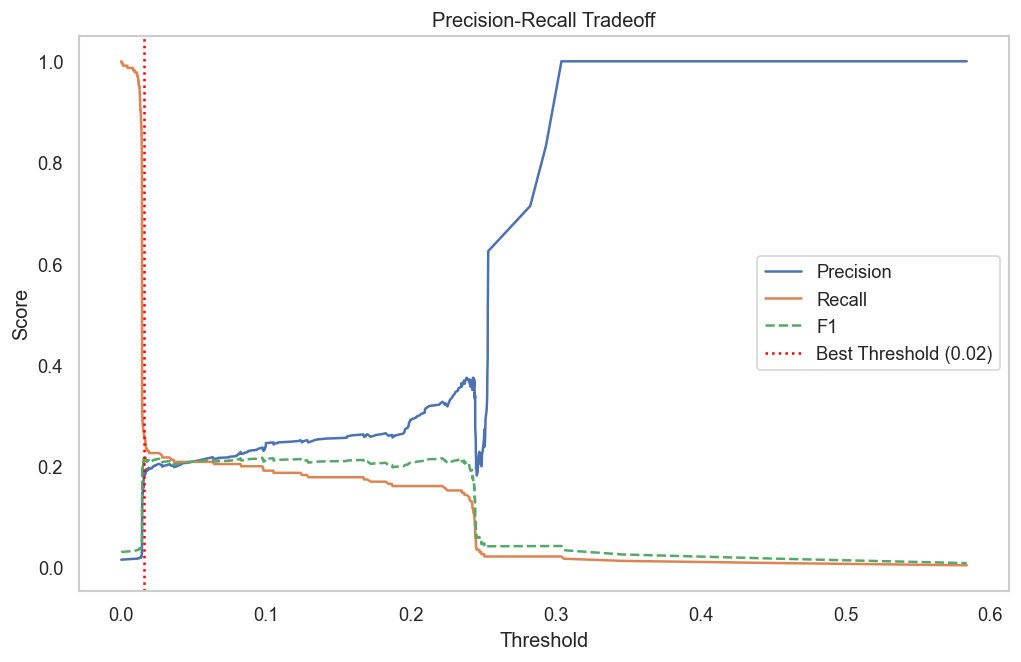

['best_svc_model.pkl']

In [ ]:
# SVC c подбором суперпараметров + оптимизация порога 500 минут
X = df.drop('getFunds', axis=1).copy()
y = df['getFunds']
numeric_features = ['nkoAge_days']
ordinal_features = ['addOkvedCount']
categorical_features = ['regionCode', 'minjustForm', 'mainOkvedCode']
binary_features = ['hasRegionalSupport', 'egrulStatus']

# 1. Общий препроцессор для обычных моделей
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('ord', OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
            categories='auto'), ordinal_features),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(
                handle_unknown='ignore',
                sparse=False,
                drop='if_binary')),
            ('variance', VarianceThreshold(threshold=0.05))
        ]), categorical_features),
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'
)
# 4. Создание пайплайна SVC
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

# 5. Определение сетки гиперпараметров
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Параметр регуляризации
    'classifier__kernel': ['rbf'],  # Тип ядра
    'classifier__gamma': ['scale', 'auto'],  # Коэффициент для ядра
    'classifier__class_weight': ['balanced', {0: 1, 1: 5}, {0: 1, 1: 10}]  # Веса классов
}

# 6. Настройка кросс-валидации
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 7. Поиск по сетке
grid_search = GridSearchCV(
    estimator=svc_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='f1',  # Оптимизируем по F1-score
    n_jobs=1,  # Используем все ядра процессора
    verbose=3
)

# 8. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 9. Запуск подбора параметров
print("Начинаем подбор гиперпараметров...")
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)

# 10. Оценка лучшей модели
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)
y_proba = best_svc.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

# 11. Оптимизация порога
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_threshold = thresholds[np.argmax(f1_scores)]
y_pred_optimized = (y_proba >= best_threshold).astype(int)

print(f"\nOptimized Threshold ({best_threshold:.4f}) Report:")
print(classification_report(y_test, y_pred_optimized))

# 12. Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1', linestyle='--')
plt.axvline(best_threshold, color='red', linestyle=':', label=f'Best Threshold ({best_threshold:.2f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.grid()
plt.show()

# 13. Сохранение модели
import joblib
joblib.dump(best_svc, './pkl/best_svc_model.pkl')
#loaded_model = joblib.load('./pkl/best_svc_model.pkl') # инструкция для загрузки

In [165]:
# RandomForestClassifier + SMOTE (сэмплирование, борьба с дисбалансом)
# from sklearn.utils import validation  # Добавляем для устранения FutureWarning
from imblearn.pipeline import Pipeline as ImbPipeline  # Четкое разделение пайплайнов
from sklearn.utils.validation import check_is_fitted
# 2. Разделение данных (стратифицированное).
# X = df.drop('getFunds', axis=1) # Уже в начале ML
# y = df['getFunds']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    stratify=y, 
    random_state=42
)


# 3. Создание полного пайплайна с SMOTE и RandomForest
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),  # Используем ваш существующий препроцессор
    ('smote', SMOTE(
        random_state=42,
        sampling_strategy='auto',  # Автоматический баланс классов
        k_neighbors=5,            # Количество соседей для синтеза
        n_jobs=-1                 # Используем все ядра
    )),
    ('classifier', RandomForestClassifier(
        class_weight='balanced_subsample',
        random_state=42,
        n_estimators=200,         # Увеличение числа деревьев
        max_depth=10,             # Оптимальная глубина
        min_samples_split=10,     # Защита от переобучения
        min_samples_leaf=5,
        max_features='sqrt',      # Оптимально для больших наборов признаков
        n_jobs=-1,               # Параллельные вычисления
        verbose=1                # Прогресс обучения
    ))
])

# 4. Обучение и оценка
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

# 5. Анализ важности признаков (с учетом VarianceThreshold)

# 5.1. Получаем уже обученный препроцессор из пайплайна
preprocessor_fitted = pipeline.named_steps['preprocessor']

# 5.2. Получаем имена признаков после трансформаций
numeric_names = preprocessor_fitted.named_transformers_['num'].get_feature_names_out(numeric_features)
ordinal_names = ordinal_features  # OrdinalEncoder doesn't change names

# 5.3. Для категориальных признаков после OneHotEncoder
cat_encoder = preprocessor_fitted.named_transformers_['cat'].named_steps['onehot']
cat_names = cat_encoder.get_feature_names_out(categorical_features)

# 5.4. Учитываем признаки, отброшенные VarianceThreshold
variance_selector = preprocessor_fitted.named_transformers_['cat'].named_steps['variance']
variance_mask = variance_selector.get_support()
cat_names_filtered = cat_names[variance_mask]

# 5.5. Бинарные признаки — прошли как есть
binary_names = binary_features

# 5.6. Финальный список признаков
feature_names = list(numeric_names) + list(ordinal_names) + list(cat_names_filtered) + list(binary_names)

# 5.7. Получаем важности из модели
importances = pipeline.named_steps['classifier'].feature_importances_

# 5.8. Проверка на совпадение длины
print(f"Feature names: {len(feature_names)}, Importances: {len(importances)}")
assert len(feature_names) == len(importances), "Mismatch between importances and features"

# 5.9. Создаем DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False).head(15)

print("\nTop 15 Important Features:")
print(importance_df)


c:\Users\dlokt\VSProjects\Python\SkFactMaterials\TestsPractics\final_HKO\myenv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning:

The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     14636
           1       0.07      0.69      0.13       230

    accuracy                           0.86     14866
   macro avg       0.53      0.78      0.53     14866
weighted avg       0.98      0.86      0.91     14866


ROC-AUC Score: 0.8648016504865905
Feature names: 16, Importances: 16

Top 15 Important Features:
                                              Feature  Importance
7        minjustForm_Товарищество собственников жилья    0.256492
0                                         nkoAge_days    0.214089
1                                       addOkvedCount    0.078929
15                                        egrulStatus    0.059407
4                minjustForm_Общественная организация    0.051017
8                              minjustForm_Учреждение    0.050657
13                                mainOkvedCode_94.99    0.042863
10                      

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


Сводный аналитический отчет по результатам различных методов машинного обучения, использованных для задачи классификации организаций с целью предсказания получения финансирования.

---

### **Первое приближение**
**Модели: Logistic Regression, Random Forest, Gradient Boosting, SVM**  
Метрики на кросс-валидации:

| Модель                | Accuracy | Precision | Recall | F1    | ROC-AUC |
|----------------------|----------|-----------|--------|-------|---------|
| Logistic Regression  | 0.8137   | 0.0615    | 0.774  | 0.114 | 0.847   |
| Random Forest        | 0.9746   | 0.1442    | 0.130  | 0.137 | 0.709   |
| Gradient Boosting    | 0.9843   | 0.3636    | 0.017  | 0.033 | 0.883   |
| SVM                  | 0.8082   | 0.0607    | 0.787  | 0.113 | 0.864   |

 **Вывод:**  
- Gradient Boosting и Random Forest показали высокий accuracy, но сильно страдают по метрике recall — они не "ловят" редкий класс.
- SVM и Logistic Regression, наоборот, показывают высокий recall, но при этом низкий precision — много ложных срабатываний.

---

###  **CatBoost: базовое обучение**
**Метрики:**
- F1-score для класса 1: **0.17**
- ROC-AUC: **0.857**
- precision: **0.10**, recall: **0.55**

**Вывод:**  
Модель находит редкий класс в 55% случаев, но делает это за счёт большого числа ложных срабатываний (низкий precision).

---

Конечно, Даниил. Ниже — формальный отчет **на русском языке**, сравнивающий две модели CatBoost с оптимизированным порогом, с четкими выводами и рекомендациями по внедрению:

---

## **Отдельно остановимся на результатах сравнения двух самых перспективных CatBoost**

Сравним эффективность двух моделей CatBoost:

- **Модель 1:** GridSearchCV + оптимизация порога  
- **Модель 2:** Кросс-валидация (StratifiedKFold) + оптимизация порога  

---

## Метрики сравнения:

Оценка моделей проводилась на отложенной выборке по следующим метрикам:

- `F1-score` — сбалансированная метрика между precision и recall для класса `1`
- `Precision` — точность положительных предсказаний
- `Recall` — полнота (насколько хорошо модель обнаруживает класс `1`)
- `ROC-AUC` — способность модели ранжировать классы
- `PR-AUC` — площадь под PR-кривой (важна при дисбалансе классов)
- `Accuracy` — общая точность классификации

---

## Сравнительная таблица:

| Модель                                     | F1 (класс 1) | Precision | Recall | ROC-AUC | PR-AUC | Accuracy |
|--------------------------------------------|--------------|-----------|--------|---------|--------|----------|
| **CatBoost + GridSearch + Threshold 0.7265** | 0.30         | 0.34      | 0.27   | 0.8183  | 0.2259 | 0.98     |
| **CatBoost + CV + Threshold 0.9248**         | **0.33**     | **0.51**  | 0.24   | **0.8696** | —      | **0.98** |

---

## Выводы:

1. **Модель 2 показывает лучший F1-score (0.33)** по сравнению с Моделью 1 (0.30), что указывает на более сбалансированное поведение между precision и recall.

2. **Precision у Модели 2 значительно выше (0.51 против 0.34)**. Это означает, что она реже ошибается, когда предсказывает класс `1`.

3. Хотя **Recall** у Модели 2 немного ниже (0.24 против 0.27), **общий выигрыш в точности и F1** делает ее более предпочтительной.

4. **ROC-AUC у Модели 2 выше (0.8696)**, что говорит о более устойчивом разделении классов.

5. Обе модели обеспечивают **высокую Accuracy (0.98)** — признак стабильности в предсказаниях по основному классу `0`.

---

Она включает в себя:
- Обученную модель CatBoost с препроцессором (`Pipeline`)
- Оптимальный порог вероятности (`threshold = 0.9248`)

---

###  **SVC с подбором гиперпараметров и оптимизацией порога**  
- F1-score после оптимизации: **0.22**
- ROC-AUC: **0.782**
- Время обучения: **~500 минут (!)**

 **Вывод:**  
SVC крайне затратен по времени при сравнительно скромных результатах. Не рекомендуется к использованию при ограниченных ресурсах.

---

###  **RandomForest + SMOTE**
- F1-score для класса 1: **0.13**, recall: **0.69**, precision: **0.07**
- ROC-AUC: **0.865**

 **Вывод:**  
SMOTE сильно увеличивает recall, но за счёт резкого снижения precision. Использовать в задачах, где важно **не пропустить** редкий класс (например, в медицине, фрод-аналитике).

---

###  **Анализ важности признаков (по CatBoost и RandomForest)**
Наиболее значимые признаки:

1. **nkoAge_days** — возраст организации
2. **regionCode** — регион регистрации
3. **minjustForm** — организационно-правовая форма
4. **mainOkvedCode** — основной код ОКВЭД
5. **addOkvedCount** — количество дополнительных ОКВЭД

 **Вывод:**  
Финансирование наиболее вероятно получают зрелые организации с определённой ОПФ и отраслевой принадлежностью.

---

##  Рекомендации

- **Для внедрения в production** рекомендуется использовать **Модель 2 (CatBoost + кросс-валидация + оптимизированный порог 0.9248)**, как наиболее сбалансированную по качеству предсказаний. Модель 2 **предпочтительна в условиях дисбаланса классов**, так как обеспечивает более **надежное выявление "настоящих" положительных случаев** при минимизации ложноположительных ошибок.

- **Для чувствительных задач**: можно применять **RandomForest с SMOTE**, если критично не упустить редкие случаи.
- **SVC** — избегать при больших данных и ограничениях по времени.
- **Gradient Boosting** — высокоточный, но слаб в обнаружении целевого класса.
- При необходимости интерпретации — использовать **Logistic Regression** с логарифмическими коэффициентами.

---